<a href="https://colab.research.google.com/github/Bonnieliu-bon/Instacart_Grocery_Analysis/blob/main/Instacart_(IC)_Final_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instacart (IC) Final Visualizations

## Index
## I. Import libraries and dataframe
#### - Create a subset aggregated by total price
##   II.Customer Profiling
  ### **1.** Income : low-income/ middle-income/ high-income customer

## I. Import libraries and dataframe

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

In [ ]:
# Create path
path = r'/content/drive/MyDrive/Careerfoundry/Instacart Basket Analysis Project (IC)'

In [ ]:
# Import data
df = pd.read_pickle(os.path.join(path , '02 Data' , 'Prepared Data' , 'ready_ords_prods_cus_depts.pkl'))

In [ ]:
df.shape

(30959687, 39)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30959687 entries, 0 to 30959686
Data columns (total 39 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               int32  
 1   user_id                object 
 2   order_number           int16  
 3   order_day_of_the_week  int16  
 4   order_hour_of_day      int16  
 5   days_since_last_order  float64
 6   first_order            bool   
 7   product_id             int32  
 8   add_to_cart_order      int32  
 9   reordered              int32  
 10  product_name           object 
 11  aisle_id               int16  
 12  department_id          int16  
 13  prices                 float64
 14  first_name             object 
 15  surname                object 
 16  gender                 object 
 17  state                  object 
 18  age                    int64  
 19  date_joined            object 
 20  n_dependants           int32  
 21  marital_status         object 
 22  income               

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head(0)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_day_of_the_week, order_hour_of_day, days_since_last_order, first_order, product_id, add_to_cart_order, reordered, product_name, aisle_id, department_id, prices, first_name, surname, gender, state, age, date_joined, n_dependants, marital_status, income, region, department, max_order, median_of_regularity, avg_order_price, price_range, busiest_day, busiest_period_of_day, consumer_type, spender_type, order_volume_flag, activity_flag, loyalty_flag, income_group, age_group, dependants_flag]
Index: []

#### - Create a subset aggregated by total price




In [ ]:
# Convert the 'days_since_last_order' column to float64 before the groupby operation
df['days_since_last_order'] = df['days_since_last_order'].astype('float64')

# Create an aggregated subset with the sum of each order
cus_profile = df.groupby(['user_id','order_volume_flag','price_range','loyalty_flag','spender_type','consumer_type','region','gender','age_group','income_group','marital_status','dependants_flag','days_since_last_order'],as_index=False)['prices'].sum(numeric_only=True)
cus_profile

user_id order_volume_flag        price_range loyalty_flag  \
0             1    regular volume  low-range product    Not Loyal   
1             1    regular volume  low-range product    Not Loyal   
2             1    regular volume  low-range product    Not Loyal   
3             1    regular volume  low-range product    Not Loyal   
4             1    regular volume  low-range product    Not Loyal   
...         ...               ...                ...          ...   
2914146   99999       high volume  mid-range product    Not Loyal   
2914147   99999       high volume  mid-range product    Not Loyal   
2914148   99999       high volume  mid-range product    Not Loyal   
2914149   99999       high volume  mid-range product    Not Loyal   
2914150   99999       high volume  mid-range product    Not Loyal   

        spender_type        consumer_type     region  gender    age_group  \
0        low spender  infrequent consumer      South  Female        adult   
1        low spender  infrequent consumer      South  Female        adult   
2        low spender  infrequent consumer      South  Female        adult   
3        low spender  infrequent consumer      South  Female        adult   
4        low spender  infrequent consumer      South  Female        adult   
...              ...                  ...        ...     ...          ...   
2914146  low spender   recurring consumer  Northeast    Male  middle-aged   
2914147  low spender   recurring consumer  Northeast    Male  middle-aged   
2914148  low spender   recurring consumer  Northeast    Male  middle-aged   
2914149  low spender   recurring consumer  Northeast    Male  middle-aged   
2914150  low spender   recurring consumer  Northeast    Male  middle-aged   

          income_group marital_status  dependants_flag  days_since_last_order  \
0           low-income        married  With dependants                    0.0   
1           low-income        married  With dependants                   14.0   
2           low-income        married  With dependants                   15.0   
3           low-income        married  With dependants                   19.0   
4           low-income        married  With dependants                   20.0   
...                ...            ...              ...                    ...   
2914146  middle-income        married  With dependants                    9.0   
2914147  middle-income        married  With dependants                   12.0   
2914148  middle-income        married  With dependants                   14.0   
2914149  middle-income        married  With dependants                   15.0   
2914150  middle-income        married  With dependants                   24.0   

             prices  
0          9.198242  
1          9.198242  
2         16.097656  
3          7.398438  
4         11.398438  
...             ...  
2914146  135.203125  
2914147   71.601562  
2914148   56.507812  
2914149   69.500000  
2914150   77.710938  

[2914151 rows x 14 columns]

In [ ]:
cus_profile.shape

(2914151, 14)

In [ ]:
cus_profile.rename(columns={'prices':'payment_per_order'},inplace=True)

##   II.Customer Profiling

### **1.** Income : low-income/ middle-income/ high-income customer

#### *1a. Income group distribution - Bar*

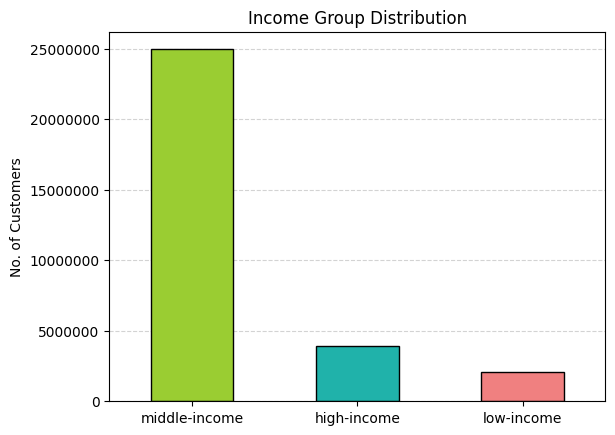

In [ ]:
# Set up color palette
colors = ['yellowgreen','lightseagreen','lightcoral','cornflowerblue','peachpuff']

# Create a dataframe contains only the count of each income groups
income_group_counts = df['income_group'].value_counts(dropna=False)

# Plot a bar chart
income_group_distribution_bar = income_group_counts.plot.bar(
    edgecolor='black',color=colors)

# Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Formatting
plt.title('Income Group Distribution')
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0,30000000,5000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,30000000,5000000)])
plt.xlabel('',weight='black')
plt.xticks(rotation=0)

# Export the bar chart
income_group_distribution_bar.figure.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '1a_income_group_distribution_bar.png' ), dpi=300 , bbox_inches='tight')

#### *1b. Income group distritution - Pie*

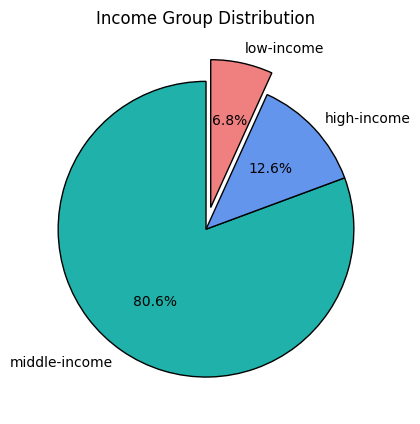

In [ ]:
# Set up color palette
explode = [0 , 0 ,0.15]
colors = ['lightseagreen','cornflowerblue','lightcoral','yellowgreen','peachpuff']

# Plot a pie chart
income_group_counts_pie= df['income_group'].value_counts()

# Plot a pie
income_group_counts_pie=income_group_counts_pie.plot.pie(
    autopct='%1.1f%%',explode=explode,startangle=90,
    wedgeprops={'edgecolor':'black'},colors=colors)

# Formatting
plt.title('Income Group Distribution', pad=15)
plt.ylabel('')

# Export the figure
plt.savefig(os.path.join(
    path,'04 Analysis' , 'Visualizations' , '4.10', '1b_income_group_counts_pie.png'), dpi=300, bbox_inches='tight')

####*1c. Order frequency and average expenditure by income status*

In [ ]:
cus_profile.groupby('income_group').agg({'days_since_last_order': ['min' , 'max' , 'mean'] , 'payment_per_order': ['min', 'max', 'mean']})

days_since_last_order                  payment_per_order  \
                                min   max       mean               min   
income_group                                                             
high-income                     0.0  30.0  12.398427               1.0   
low-income                      0.0  30.0  13.031404               1.0   
middle-income                   0.0  30.0  12.514834               1.0   

                                       
                       max       mean  
income_group                           
high-income    6584.210938  82.615058  
low-income     4617.273438  53.758415  
middle-income  8335.015625  80.237347

#### *1d. Income groups vs order frequency - Bar*

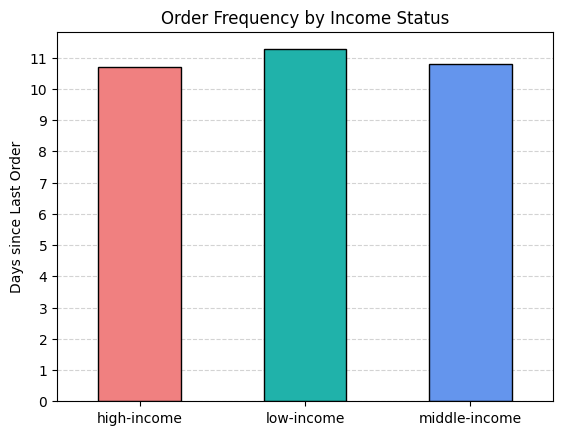

In [ ]:
# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Aggregate by usage frequency for income group
income_group_avg_usage =df.groupby('income_group')['days_since_last_order'].mean()

# Plot a bar
income_group_avg_usage.plot.bar(edgecolor='black',legend=False,width=0.5,
                                 color=colors)

# Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Formatting
plt.title('Order Frequency by Income Status')
plt.xlabel('',weight='black')
plt.xticks(rotation=0)
plt.yticks(np.arange(0,12,1),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,12,1)])
plt.ylabel('Days since Last Order')

# Export the bar
plt.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , '4.10', '1d_order_frenquency_by_income.png') , dpi=300, bbox_inches='tight')

#### *1e. Income groups average expenditure - Bar*

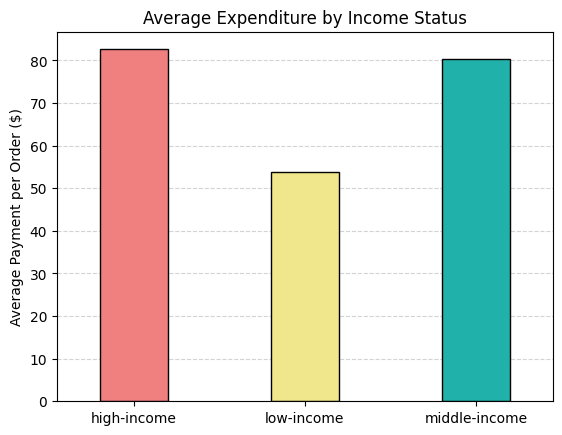

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
income_avg_expense = cus_profile.groupby(['income_group'])['payment_per_order'].mean()
income_avg_expense.plot.bar(edgecolor='black',width=0.4, color=colors)


# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Formatting
plt.title('Average Expenditure by Income Status')
plt.ylabel('Average Payment per Order ($)')
plt.xlabel('',weight='black')
plt.xticks(rotation=0)
plt.yticks(fontsize=10)

# Export the bar chart

plt.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , '4.10', '1e_avg_expense_by_income.png') , dpi=300, bbox_inches='tight')

#### *1f. Income status vs order volume - Bar*

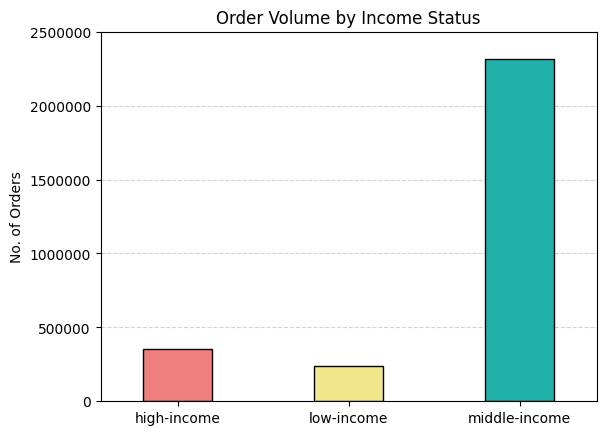

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
total_orders_by_income = cus_profile['income_group'].value_counts(dropna=False).sort_index().plot.bar(width=0.4,edgecolor='black',color=colors)

# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Formatting
plt.yticks(np.arange(0,3000000,500000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,3000000,500000)])
plt.xticks(rotation=0)
plt.title('Order Volume by Income Status')
plt.ylabel('No. of Orders')
plt.xlabel('',weight='black')

# Export the bar chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '1f_order_volume_by_income_bar.png' ), dpi=300, bbox_inches='tight')

#### *1g. Income status vs product price range - Bar*

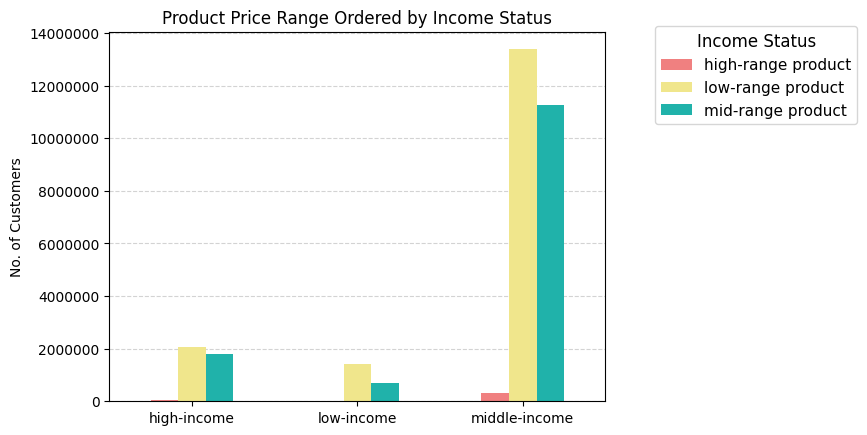

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
range_income_bar = pd.crosstab(df['income_group'],df['price_range'], dropna = False).plot.bar(color=colors)

# Legend setting
leg = plt.legend(loc=(1.1,0.75),title='Income Status',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Product Price Range Ordered by Income Status')
plt.ylabel('No. of Customers')
plt.xlabel('',weight='black')
plt.xticks(rotation=0)
plt.yticks(np.arange(0,15000000,2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,2000000)])
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Export the bar chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '1g_range_income_bar.png' ), dpi=300 , bbox_inches='tight')

#### *1h. Income status v.s. products ordered by department - Stacked Bar*

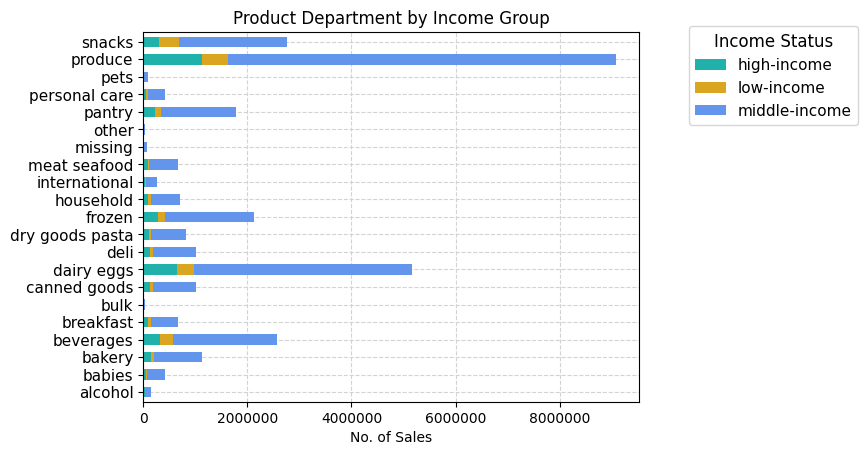

In [ ]:
# Create a crosstab with department and income group
dept_income_cross = pd.crosstab(df['department'],df['income_group'], dropna=False)

# Set color palette
colors = ['lightseagreen','goldenrod','cornflowerblue','lightcoral','yellowgreen','peachpuff']

# Plot bar chart
dept_income_bar = dept_income_cross.plot.barh(color=colors, stacked =True, width = 0.6)

# Adjust legend
leg = plt.legend(loc=(1.1,0.75),title='Income Status' , title_fontsize= 12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')

# Formatting
plt.title('Product Department by Income Group')
plt.ylabel('',weight='black')
plt.xlabel('No. of Sales')
plt.xticks(np.arange(0,10000000,2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,10000000,2000000)])
plt.yticks(fontsize=11)

# Export the bar chart

dept_income_bar.figure.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '1h_income_vs_dept_bar.png' ), dpi=300, bbox_inches='tight')

#### *1i. Income status vs consumer profile - Bar*

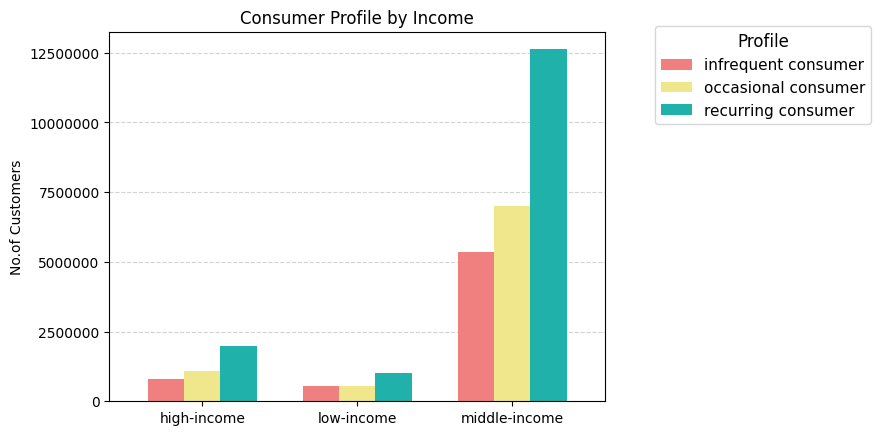

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
order_frequency_by_income_bar = pd.crosstab(df['income_group'] , df['consumer_type'], dropna=False).plot.bar(
    width=0.7,color=colors)

# Setting up legend
leg = plt.legend(loc=(1.1,0.75),title='Profile',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

#Formatting
plt.title('Consumer Profile by Income')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('No.of Customers')
plt.yticks(np.arange(0,15000000,2500000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,2500000)])
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'lightgray', linestyle = 'dashed')

# Export the bar
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '1i_consumer_type_by_income_bar.png'), dpi=300 , bbox_inches='tight')

#### *1j. Income Status by brand loyalty - Bar*

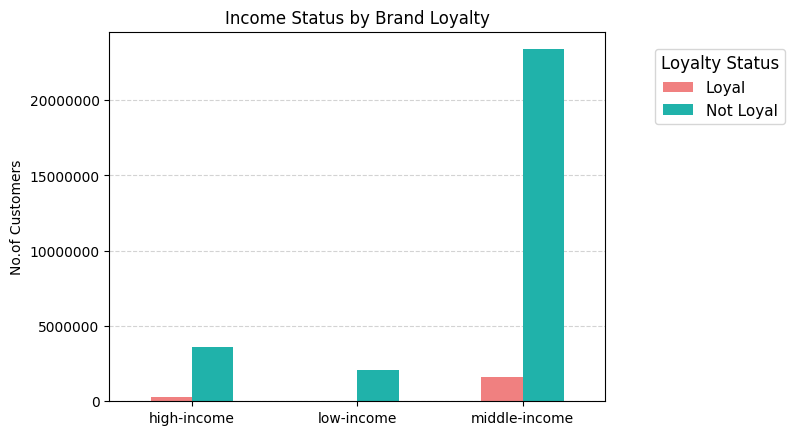

In [ ]:
# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']


# Create a crosstab with income_group and loyalty_flag
income_loyalty_cross = pd.crosstab(df['income_group'],df['loyalty_flag'], dropna=False)

# Plot a bar
income_loyalty_bar = income_loyalty_cross.plot.bar(color=colors)

# Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Loyalty Status', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.title('Income Status by Brand Loyalty')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('No.of Customers')
plt.yticks(np.arange(0,25000000,5000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,25000000,5000000)])

# Export the figure
plt.savefig(os.path.join(
    path,'04 Analysis' , 'Visualizations' , '4.10', '1j_income_group_by_loyalty_bar.png'), dpi=300 , bbox_inches='tight')

#### *1k. Income Status by regions - Bar & Pie*

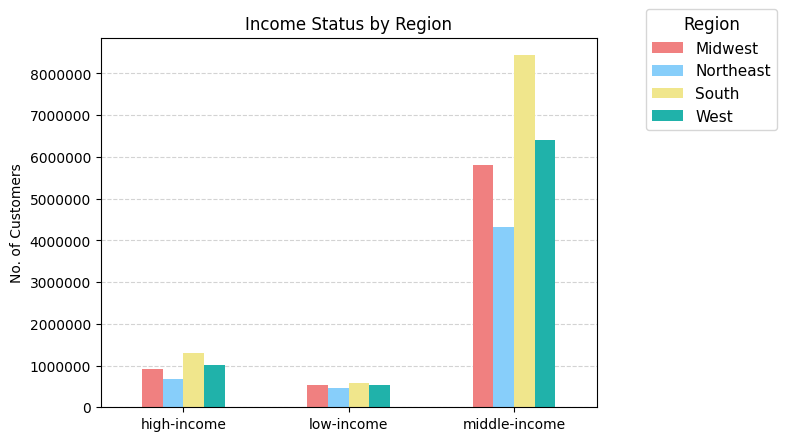

In [ ]:
# Set up color palette
colors = ['lightcoral','lightskyblue','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar with crosstab
income_region_cross_bar = pd.crosstab(df['income_group'] , df['region'] , dropna = False).plot.bar(color=colors)

# Legend setting
leg = plt.legend(loc=(1.1,0.75),title='Region',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.title('Income Status by Region')
plt.ylabel('No. of Customers')
plt.xlabel('',weight='black')
plt.xticks(rotation=0)
plt.yticks(np.arange(0,9000000,1000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,9000000,1000000)])
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Export the bar
plt.savefig(os.path.join(
    path, '04 Analysis','Visualizations','4.10', '1k_income_by_region_bar.png'), dpi=300 , bbox_inches='tight')

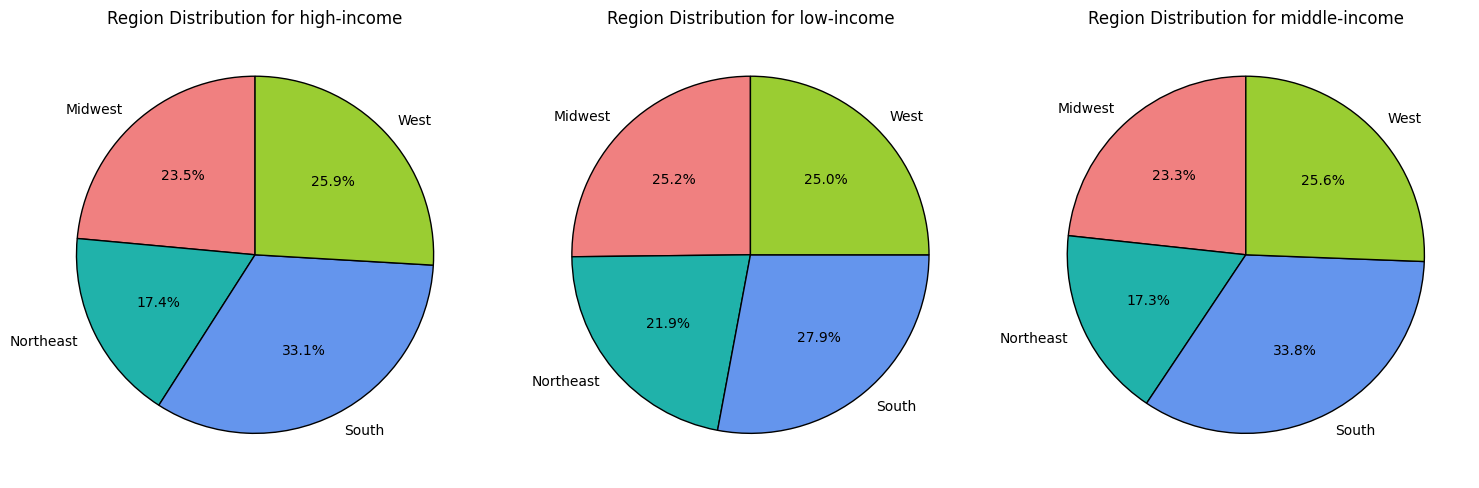

In [ ]:
# Create a crosstab to get the data for the pie charts
income_region_cross_pies = pd.crosstab(df['income_group'], df['region'], dropna=False)

# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Get unique income groups for plotting
income_groups = income_region_cross_pies.index

# Iterate through income groups and plot pie charts
for i, income_group in enumerate(income_groups):
    ax = axes[i]  # Get the current subplot
    # Plot pie chart for the current income group
    income_region_cross_pies.loc[income_group].plot.pie(
        ax=ax,
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightcoral', 'lightseagreen', 'cornflowerblue', 'yellowgreen'],
        wedgeprops={'edgecolor': 'black'}
    )
    ax.set_title(f'Region Distribution for {income_group}')
    ax.set_ylabel('')  # Remove y-axis label

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.savefig(os.path.join(
    path, '04 Analysis','Visualizations','4.10', '1k-1_income_by_region_3pie.png'), dpi=300 , bbox_inches='tight')

#### *1L. Income by family status - Bar*

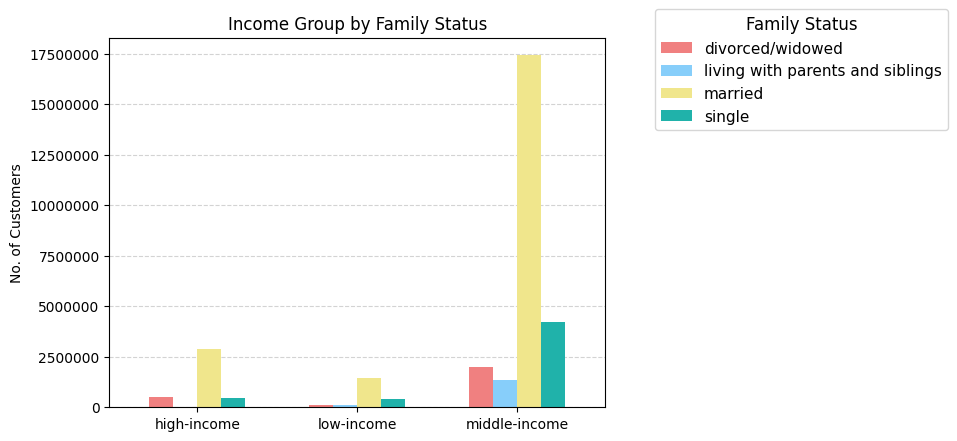

In [ ]:
# Set up color palette
colors = ['lightcoral','lightskyblue','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar with crosstab
income_marital_cross_bar = pd.crosstab(
    df['income_group'] , df['marital_status'] , dropna = False).plot.bar(width=0.6, color=colors)

# Legend setting
leg = plt.legend(loc=(1.1,0.75),title='Family Status',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Income Group by Family Status')
plt.ylabel('No. of Customers')
plt.xlabel('',weight='black')
plt.xticks(rotation=0)
plt.yticks(np.arange(0,20000000,2500000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,20000000,2500000)])
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Export the bar
plt.savefig(os.path.join
            (path, '04 Analysis','Visualizations','4.10', '1L_income_by_marital_bar.png'), dpi=300 , bbox_inches='tight')

#### *1m. Income by dependent status - Bar*

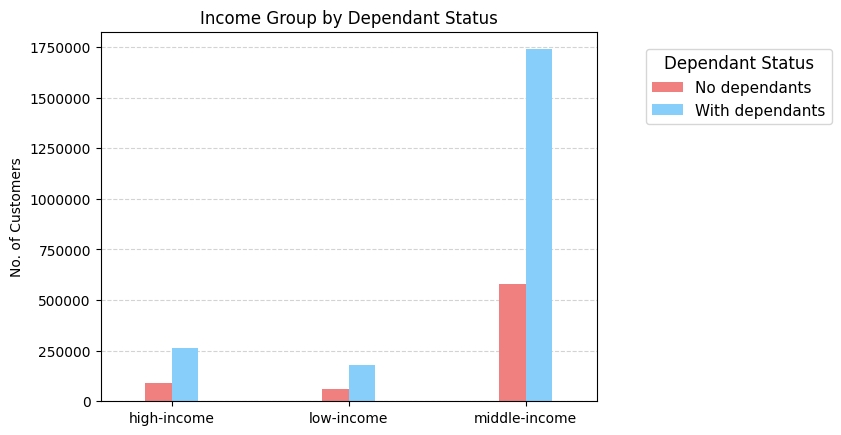

In [ ]:
 # Plot a bar with crosstab
colors = ['lightcoral','lightskyblue','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']
income_dependant_cross_bar = pd.crosstab(
    cus_profile['income_group'] , cus_profile['dependants_flag'] , dropna = False).plot.bar(width=0.3,color=colors)

# Legend setting
leg = plt.legend(loc=(1.1,0.75),title='Dependant Status',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Income Group by Dependant Status')
plt.ylabel('No. of Customers')
plt.xlabel('',weight='black')
plt.xticks(rotation=0)
plt.yticks(np.arange(0,2000000,250000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,2000000,250000)])
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Export the bar
plt.savefig(os.path.join(
    path, '04 Analysis','Visualizations','4.10', '1m_income_by_dependant_bar.png'), dpi=300, bbox_inches='tight')

#### *1n. Income by gender*

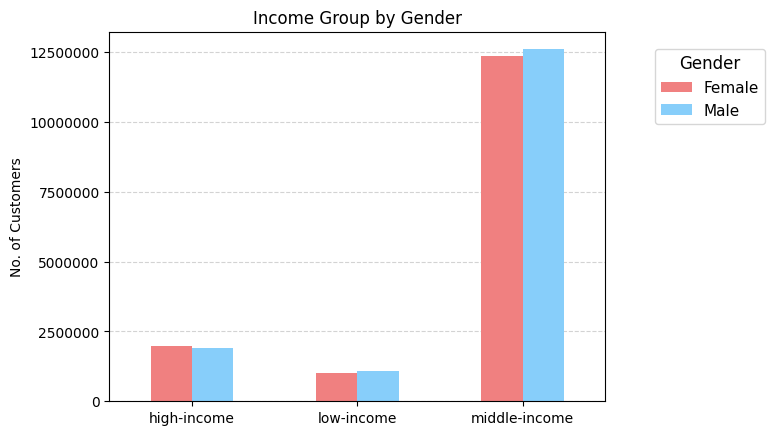

In [ ]:
# Set up color palette
colors = ['lightcoral','lightskyblue','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar with crosstab
income_gender_cross_bar = pd.crosstab(
    df['income_group'] , df['gender'] , dropna = False).plot.bar(color=colors)

# Legend setting
leg = plt.legend(loc=(1.1,0.75),title='Gender',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Income Group by Gender')
plt.ylabel('No. of Customers')
plt.xlabel('',weight='black')
plt.xticks(rotation=0)
plt.yticks(np.arange(0,15000000,2500000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,2500000)])
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Export the bar
plt.savefig(os.path.join(
    path, '04 Analysis','Visualizations','4.10', '1n_income_by_gender_bar.png'), dpi=300 , bbox_inches='tight')

#### *1o. Order volume by income - Pie*

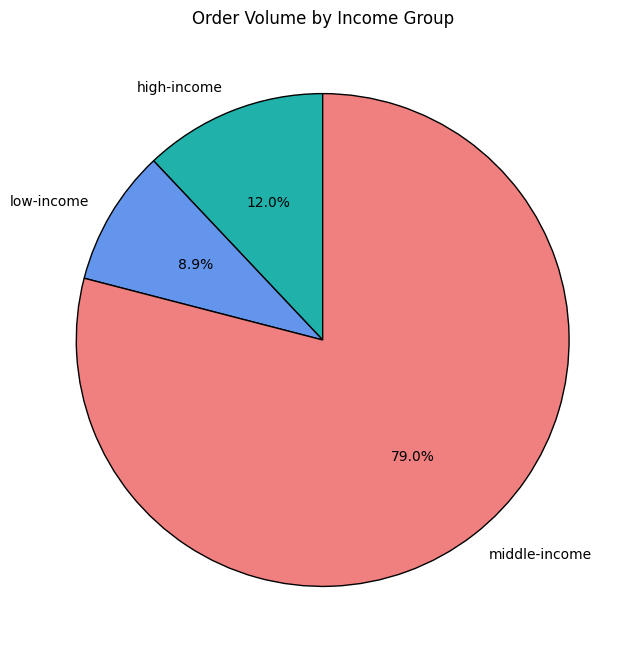

In [ ]:
# Set up color palette
colors = ['lightseagreen','cornflowerblue','lightcoral','yellowgreen','peachpuff']

# Calculate order volume for each income group
income_order_volume = df.groupby('income_group')['order_id'].nunique().reset_index()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(income_order_volume['order_id'],
        labels=income_order_volume['income_group'],
        autopct='%1.1f%%', startangle=90,wedgeprops={'edgecolor':'black'},colors=colors)

# Customize the chart
plt.title('Order Volume by Income Group')

# Export the pie
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '1o_order_volume_by_income_pie.png' ), dpi=300 , bbox_inches='tight')

#### *1p. Revenue by income group - Pie*

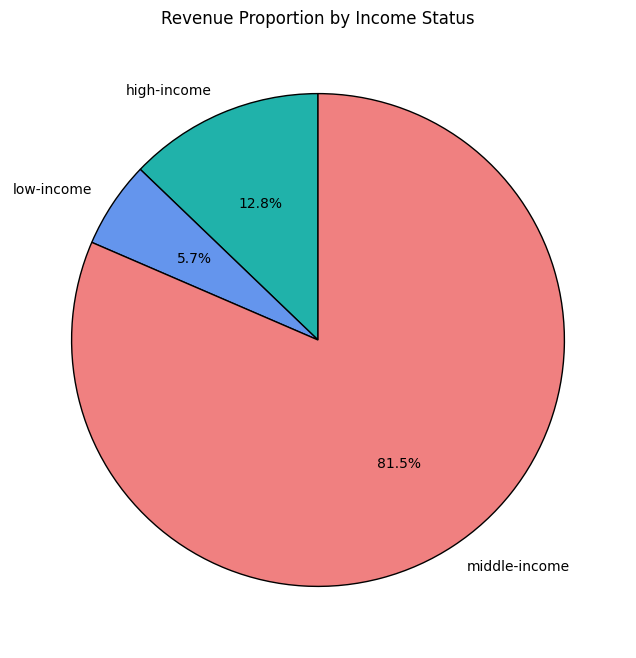

In [ ]:
# Set up color palette
colors = ['lightseagreen','cornflowerblue','lightcoral','yellowgreen','peachpuff']

# Calculate order volume for each income group
total_revenue_by_income = cus_profile.groupby('income_group')['payment_per_order'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))

# Access the values of the series using .values instead of indexing with a column name
plt.pie(total_revenue_by_income.values,
        labels=total_revenue_by_income.index, # Use .index to get the income groups
        autopct='%1.1f%%', startangle=90,wedgeprops={'edgecolor':'black'},colors=colors)

# Customize the chart
plt.title('Revenue Proportion by Income Status')

# Export the pie
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '1p_revenue_by_income_pie.png' ), dpi=300 , bbox_inches='tight')

### **2.** Age group : young adult/ adult/ middle-aged/ senior

#### *2a. Age group distribution - Pie*

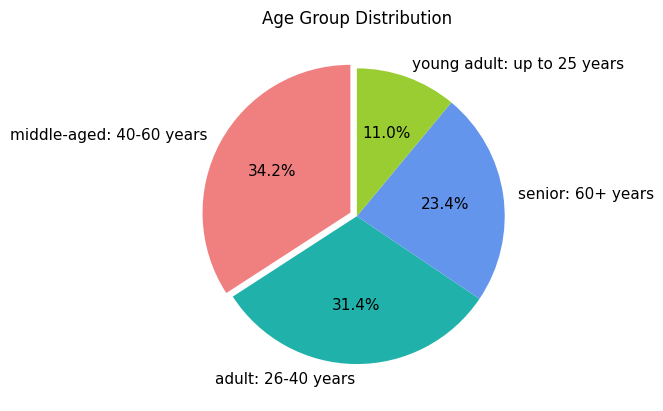

In [ ]:
# Set up color palette
explode = [0.05 , 0 , 0, 0]
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Create a pie chart shows the distribution of each age groups
age_group_counts_pie = df['age_group'].value_counts().plot.pie(
    autopct='%1.1f%%',labels= ['middle-aged: 40-60 years', 'adult: 26-40 years', 'senior: 60+ years', 'young adult: up to 25 years'],
    explode=explode, startangle=90,fontsize=11, colors=colors)

# Formatting
plt.title('Age Group Distribution')
plt.ylabel('')

# Export the figure
plt.savefig(os.path.join(
    path,'04 Analysis', 'Visualizations' , '4.10' , '2a_age_group_distribution_pie.png'), dpi=300, bbox_inches='tight')

#### *2b.Usage frequency and expenditure by age group*

In [ ]:
cus_profile.groupby('age_group').agg({'days_since_last_order': ['min', 'max','mean'] , 'payment_per_order': ['min','max','mean']})

days_since_last_order                  payment_per_order  \
                              min   max       mean               min   
age_group                                                              
adult                         0.0  30.0  12.565276               1.0   
middle-aged                   0.0  30.0  12.547291               1.0   
senior                        0.0  30.0  12.536356               1.0   
young_adult                   0.0  30.0  12.508729               1.0   

                                     
                     max       mean  
age_group                            
adult        7807.835938  78.526098  
middle-aged  6823.304688  78.250769  
senior       8335.015625  78.105663  
young_adult  5415.375000  78.847644

#### *2c. Age group vs order frequency - Bar*

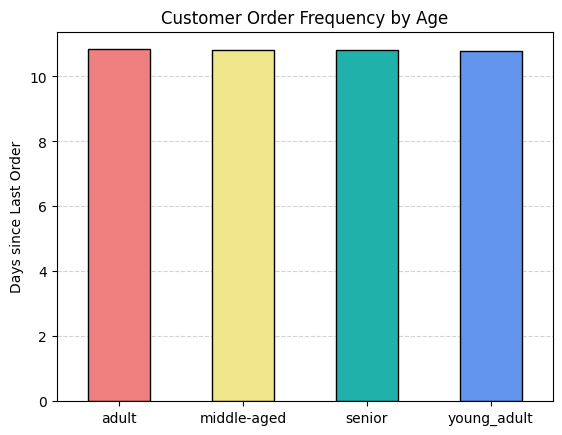

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
age_avg_usage_bar =df.groupby('age_group')['days_since_last_order'].mean().plot.bar(
    edgecolor='black',legend=False,width=0.5,color=colors)

# Formatting
plt.title('Customer Order Frequency by Age')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Days since Last Order')

plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'lightgray', linestyle = 'dashed')

# Export the bar
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '2c_order_frequency_by_age_bar.png'), dpi=300 , bbox_inches='tight')

#### *2d. Age group vs average expenditure - Bar*

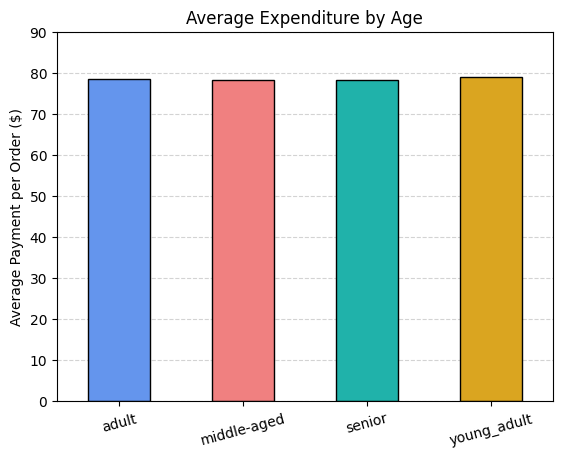

In [ ]:
# Set up color palette
colors = ['cornflowerblue','lightcoral','lightseagreen','goldenrod','yellowgreen','peachpuff']

# Plot a bar
avg_expense_income_marital = cus_profile.groupby(['age_group'])['payment_per_order'].mean()
avg_expense_income_marital.plot.bar(edgecolor='black',color=colors)

# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Formatting
plt.title('Average Expenditure by Age')
plt.ylabel('Average Payment per Order ($)')
plt.xlabel('',weight='black')
plt.xticks(rotation=15)
plt.yticks(np.arange(0,100,10),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,100,10)])

# Export the figure
plt.savefig(os.path.join(
    path,'04 Analysis' , 'Visualizations' ,'4.10' , '2d_avg_expense_by_age_bar.png') , dpi=300, bbox_inches='tight')

#### *2e. Age group vs order volume - Bar*

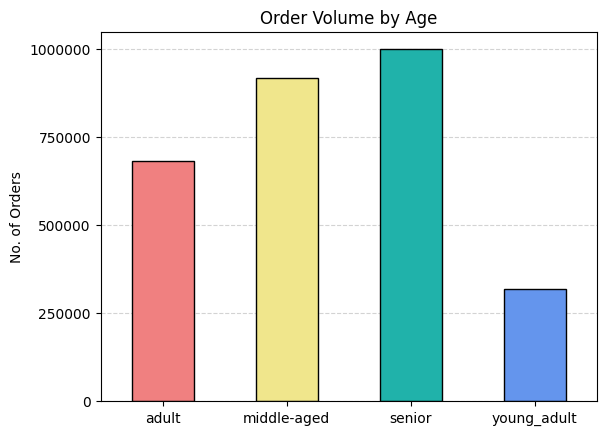

In [ ]:
# Plot a bar
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']
order_vol_by_age = cus_profile['age_group'].value_counts(dropna=False).sort_index().plot.bar(edgecolor='black',color=colors)

# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Formatting
plt.yticks(np.arange(0,1200000,250000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,1200000,250000)])
plt.xticks(rotation=0)
plt.title('Order Volume by Age')
plt.ylabel('No. of Orders')
plt.xlabel('',weight='black')

# Export the bar chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '2e_order_vol_by_age_bar.png' ), dpi=300 , bbox_inches='tight')

#### *2f. Age group vs product price range - Bar*

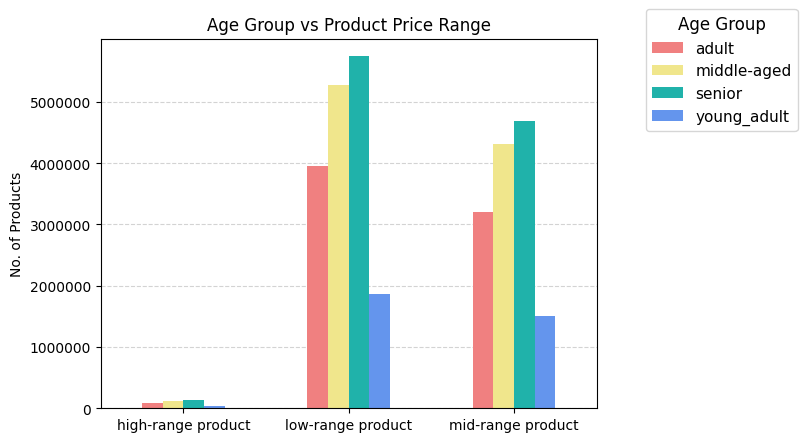

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
range_age_bar = pd.crosstab(df['price_range'],df['age_group'], dropna = False).plot.bar(color=colors)

# Legend setting
leg = plt.legend(loc=(1.1,0.75),title='Age Group',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Age Group vs Product Price Range')
plt.ylabel('No. of Products')
plt.xlabel('',weight='black')
plt.xticks(rotation=0)
plt.yticks(np.arange(0,6000000,1000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,6000000,1000000)])
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Export the bar chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '2f_price_range_age_bar.png' ), dpi=300 , bbox_inches='tight')

#### *2g. Age group v.s. products ordered by department - Stacked Bar*

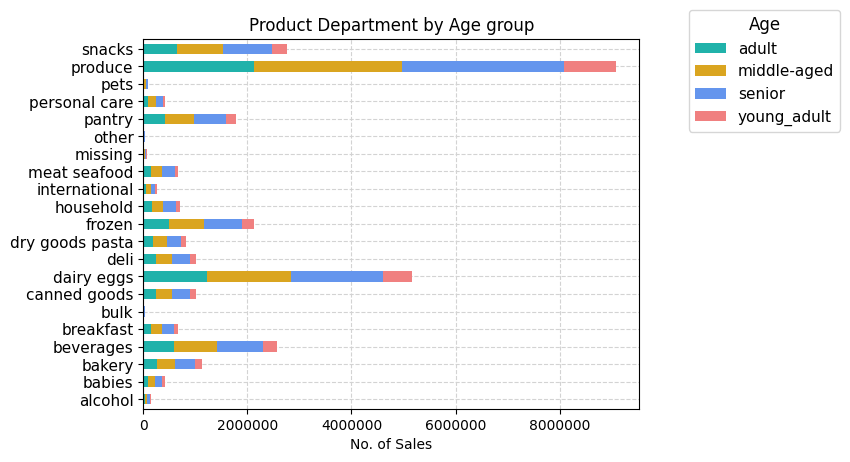

In [ ]:
# Create a crosstab with department and age group
dept_age_cross = pd.crosstab(df['department'],df['age_group'], dropna=False)

# Region_department Bar Chart
colors = ['lightseagreen','goldenrod','cornflowerblue','lightcoral','yellowgreen','peachpuff']
dept_age_bar = dept_age_cross.plot.barh(color=colors, stacked =True, width = 0.6)

# Adjust legend
leg = plt.legend(loc=(1.1,0.75),title='Age', title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')

# Formatting
plt.title('Product Department by Age group')
plt.ylabel('')
plt.yticks(fontsize=11)
plt.xlabel('No. of Sales')
plt.xticks(np.arange(0,10000000,2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,10000000,2000000)])

# Export bar chart
dept_age_bar.figure.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10', '2g_dept_by_age_bar.png'), dpi=300, bbox_inches='tight')

#### *2h. Age vs consumer profile - Bar*

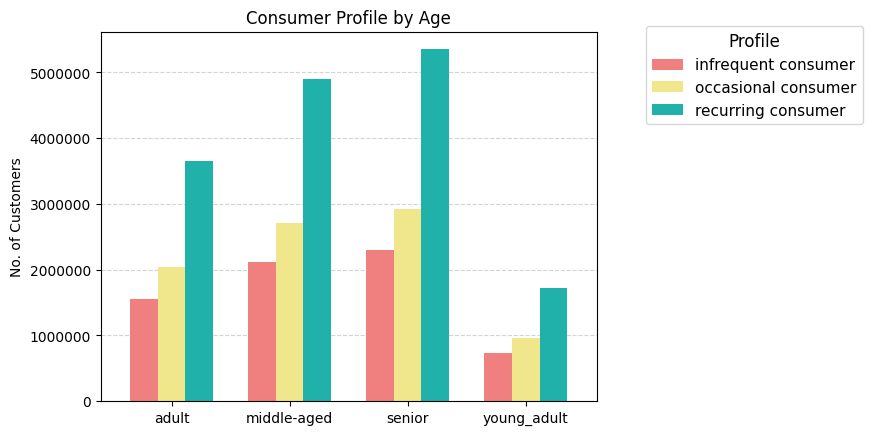

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
order_frequency_by_age_bar = pd.crosstab(df['age_group'] , df['consumer_type'], dropna=False).plot.bar(
    width=0.7,color=colors)

# Setting up legend
leg = plt.legend(loc=(1.1,0.75),title='Profile',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.title('Consumer Profile by Age')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0,6000000,1000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,6000000,1000000)])
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'lightgray', linestyle = 'dashed')

# Export the bar
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '2h_consumer_type_by_age_bar.png'), dpi=300 , bbox_inches='tight')

#### *2i. Age group vs brand loyalty - Bar*

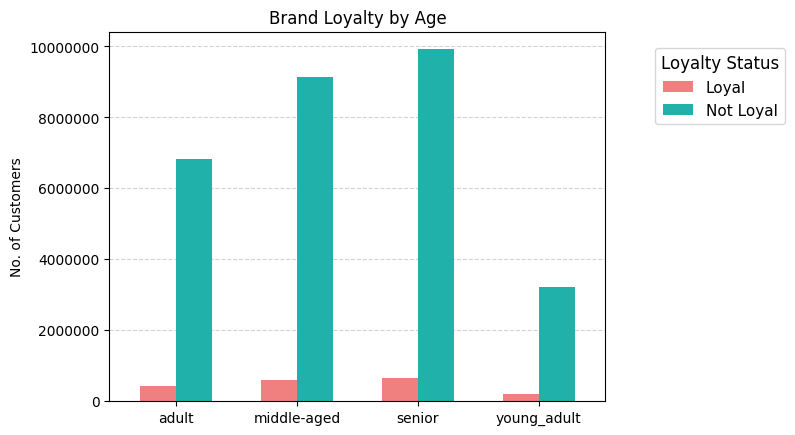

In [ ]:
# Create crosstab: loyalty with age group
loyalty_age_cross = pd.crosstab(df['age_group'],df['loyalty_flag'], dropna = False)

# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
loyalty_age_bar = loyalty_age_cross.plot.bar(width=0.6,color=colors)

# Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Loyalty Status', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Brand Loyalty by Age')
plt.xlabel('', weight='black')
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0,12000000,2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,12000000,2000000)])
plt.xticks(rotation=0)

# Export the figure

plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10','2i_age_by_loyalty_bar.png'), dpi=300, bbox_inches= 'tight')

#### *2j. Age group vs spending habit - Bar*

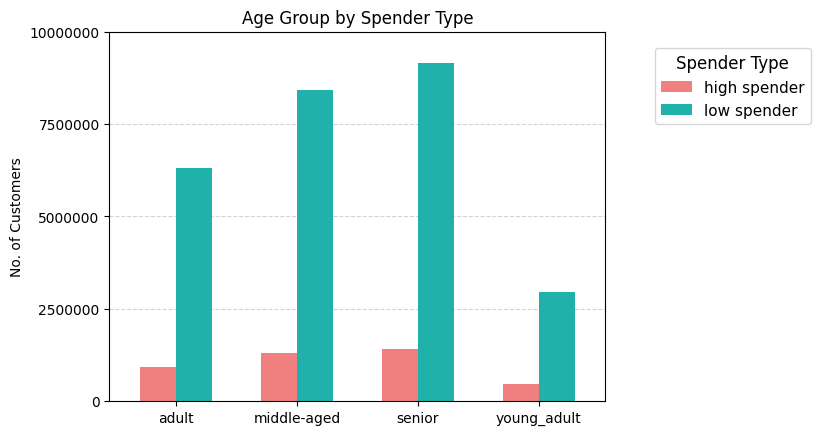

In [ ]:
# Create a crosstab for age group and spending flag
age_spending_cross = pd.crosstab(df['age_group'], df['spender_type'], dropna= False)

# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
age_spending_bar = age_spending_cross.plot.bar(width=0.6,color=colors)

# Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Spender Type', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.title('Age Group by Spender Type')
plt.xlabel('', weight='black')
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0,12000000,2500000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,12000000,2500000)])
plt.xticks(rotation=0)

# Export the figure
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10','2j_age_by_spending_bar.png'), dpi=300, bbox_inches='tight')

#### *2k. Age group vs income status - Bar*

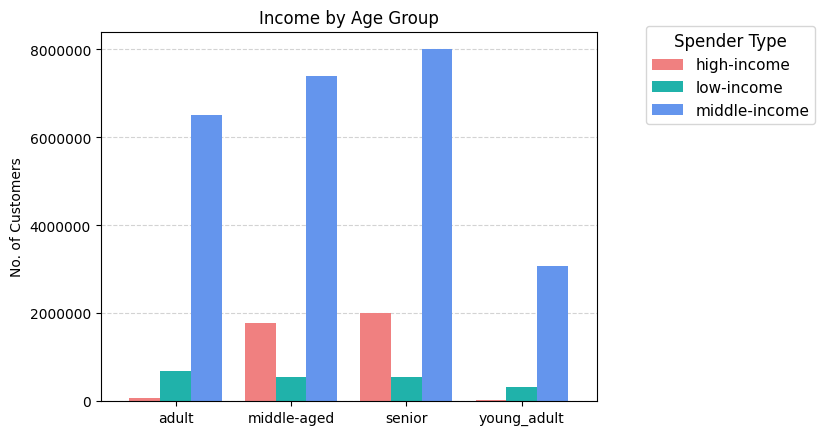

In [ ]:
# Create a crosstab for age group and income group
age_income_cross = pd.crosstab(df['age_group'], df['income_group'], dropna= False)

# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
age_income_bar = age_income_cross.plot.bar(width=0.8,color=colors)

#Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Spender Type', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.title('Income by Age Group')
plt.xlabel('', weight='black')
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0,10000000,2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,10000000,2000000)])
plt.xticks(rotation=0)


# Export the figure
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10','2k_age_by_income_bar.png'), dpi=300 , bbox_inches='tight')

#### *2L. Age vs income - Scatterplot*

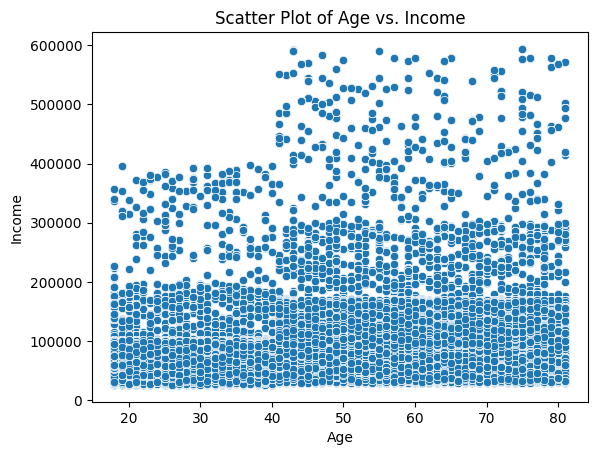

In [ ]:
# Create the scatter plot using seaborn
scatter_plot = sns.scatterplot(x='age', y='income', data=df)

# Set plot title and labels
plt.title('Scatter Plot of Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')

# Export the plot
plt.savefig(os.path.join(
    path, '04 Analysis','Visualizations','4.10', '2L_age_income_scatter.png'), dpi=300 , bbox_inches='tight')

#### *2m. Age group distrution by region - Pie*

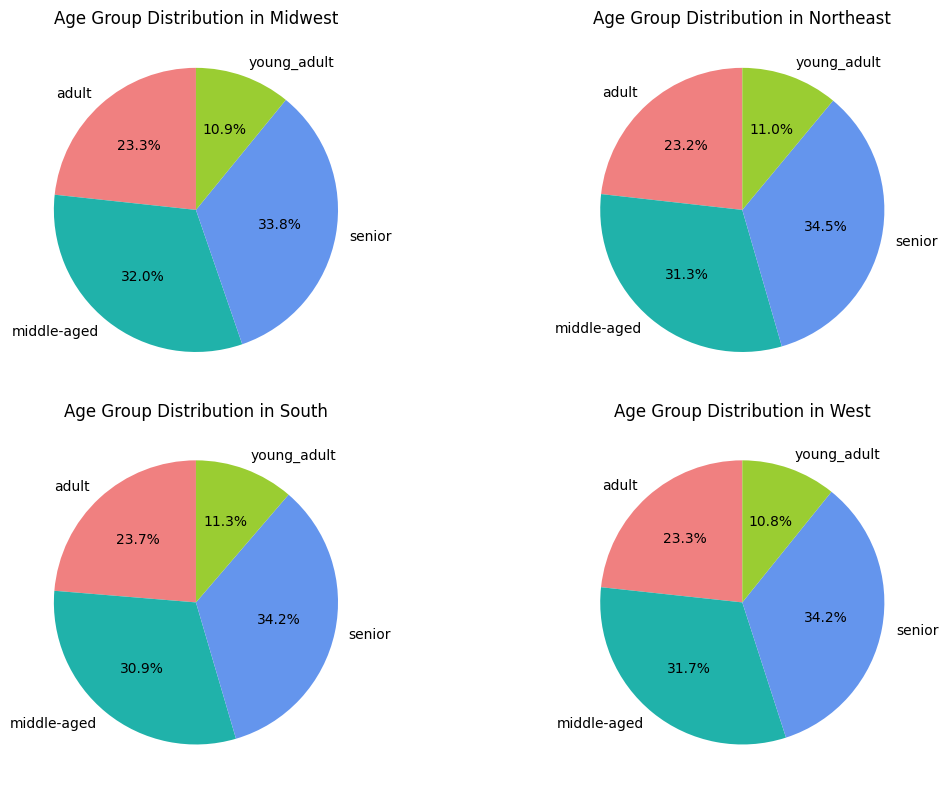

In [ ]:
# Create a crosstab
age_region_cross = pd.crosstab(df['age_group'], df['region'], dropna=False)

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the data in each subplot
regions = age_region_cross.columns

# Iterate through regions and plot pie charts
for i, region in enumerate(regions):
    row = i // 2  # Calculate row index
    col = i % 2   # Calculate column index
    ax = axes[row, col]  # Get the current subplot

    # Plot pie chart for the current region
    age_region_cross[region].plot.pie(ax=ax, autopct='%1.1f%%', startangle=90,
                                      colors=['lightcoral', 'lightseagreen', 'cornflowerblue', 'yellowgreen'])

    # Set subplot title
    ax.set_title(f'Age Group Distribution in {region}')
    ax.set_ylabel('')  # Remove y-axis label

# Adjust spacing between subplots
plt.tight_layout()

# Export the plot
plt.savefig(os.path.join(
    path, '04 Analysis','Visualizations','4.10', '2m_age_by_region_4pies.png'), dpi=300 , bbox_inches='tight')

#### *2n. Revenue by age - Pie*

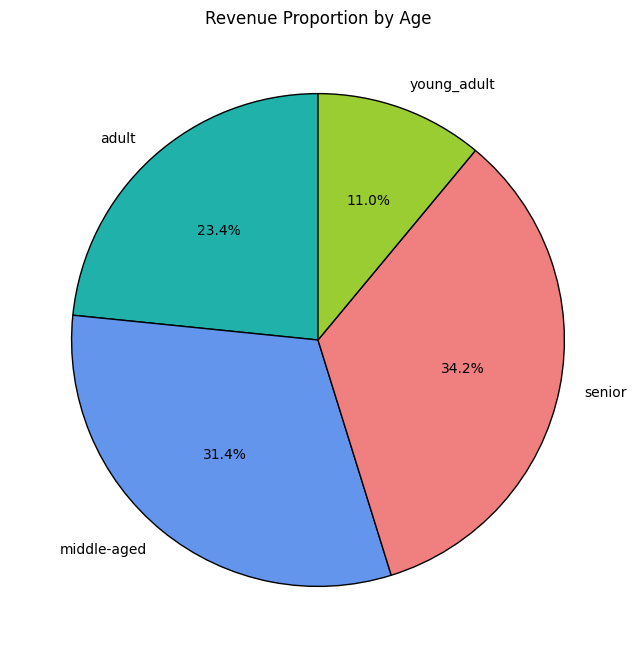

In [ ]:
# Set up color palette
colors = ['lightseagreen','cornflowerblue','lightcoral','yellowgreen','peachpuff']

# Calculate order volume for each income group
total_revenue_by_age = cus_profile.groupby('age_group')['payment_per_order'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))

# Access the values of the series using .values instead of indexing with a column name
plt.pie(total_revenue_by_age.values,
        labels=total_revenue_by_age.index, # Use .index to get the income groups
        autopct='%1.1f%%', startangle=90,wedgeprops={'edgecolor':'black'},colors=colors)

# Customize the chart
plt.title('Revenue Proportion by Age')

# Export the pie
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '2n_revenue_by_age_pie.png' ), dpi=300 , bbox_inches='tight')

### 3.Family status: married/ single/ divorced/ widowed/ living with parents and siblings

#### *3a. Family status distribution - Pie*

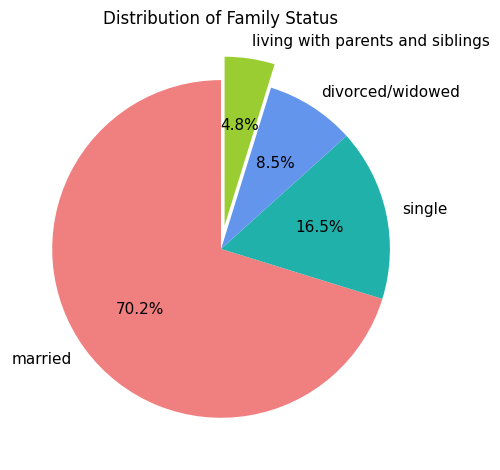

In [ ]:
# Create a dataframe with value counts in marital_status colomn
fam_status = df['marital_status'].value_counts(dropna = False)

# Set up color palette
explode = [0 , 0 , 0, 0.14]
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a pie
fam_status_distribution_pie = fam_status.plot.pie(
    autopct='%1.1f%%', labels= ['married', 'single', 'divorced/widowed', 'living with parents and siblings'],
    explode=explode, startangle=90,fontsize=11, colors=colors)

# Formatting
plt.ylabel('')
plt.title('Distribution of Family Status', size=12, pad=10)
plt.tight_layout()

# Export the figure

fam_status_distribution_pie.figure.savefig(os.path.join(
    path, '04 Analysis','Visualizations', '4.10', '3a_marital_distribution_pie.png'), dpi=300, bbox_inches='tight')

#### *3b. Usage frequency and expenditure by Family status*

In [ ]:
cus_profile.groupby('marital_status').agg({'days_since_last_order': ['min' , 'max' , 'mean'] , 'payment_per_order': ['min', 'max', 'mean']})

days_since_last_order                   \
                                                   min   max       mean   
marital_status                                                            
divorced/widowed                                   0.0  30.0  12.502928   
living with parents and siblings                   0.0  30.0  12.487432   
married                                            0.0  30.0  12.546396   
single                                             0.0  30.0  12.568355   

                                 payment_per_order                          
                                               min          max       mean  
marital_status                                                              
divorced/widowed                               1.0  8335.015625  78.472980  
living with parents and siblings               1.0  5356.460938  79.623699  
married                                        1.0  7807.835938  78.246991  
single                                         1.0  6352.250000  78.243958

#### *3c. Family status vs order frequency - Bar*

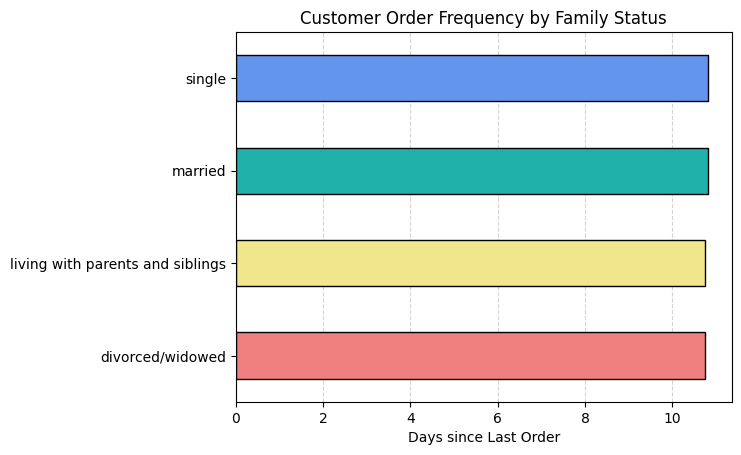

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
age_avg_usage_bar =df.groupby('marital_status')['days_since_last_order'].mean().plot.barh(
    edgecolor='black',legend=False,width=0.5,color=colors)

# Formatting
plt.title('Customer Order Frequency by Family Status')
plt.ylabel('')
plt.xticks(rotation=0)
plt.xlabel('Days since Last Order')

plt.gca().set_axisbelow(True)
plt.grid(axis = 'x', color = 'lightgray', linestyle = 'dashed')

# Export the bar
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '3c_order_frequency_by_family_status_bar.png'), dpi=300 , bbox_inches='tight')

#### *3d. Family status vs average expenditure - Bar*

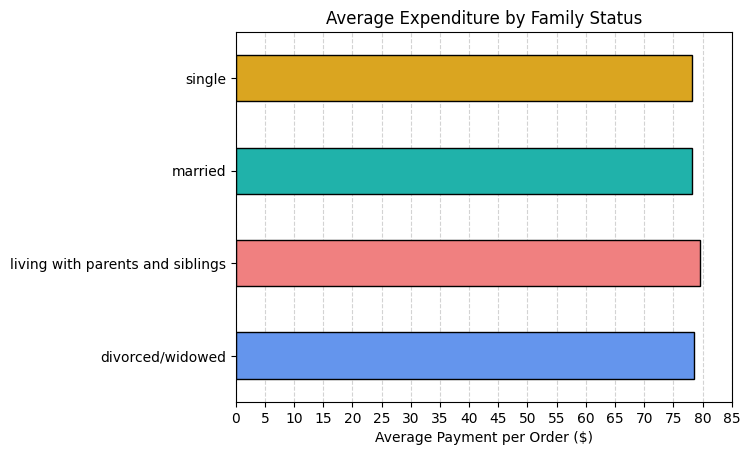

In [ ]:
# Set up color palette
colors = ['cornflowerblue','lightcoral','lightseagreen','goldenrod','yellowgreen','peachpuff']

# Plot a bar
marital_avg_expense = cus_profile.groupby(['marital_status'])['payment_per_order'].mean()
marital_avg_expense.plot.barh(edgecolor='black',color=colors)

# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='x', color='lightgray', linestyle='dashed')

# Formatting
plt.title('Average Expenditure by Family Status')
plt.xlabel('Average Payment per Order ($)')
plt.ylabel('')
plt.yticks(rotation=0)
plt.xticks(np.arange(0,90,5),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,90,5)])

# Export the bar chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '3d_family_status_avg_expense_bar.png'),dpi=300, bbox_inches='tight')

#### *3e. Family status vs order volume - Bar*

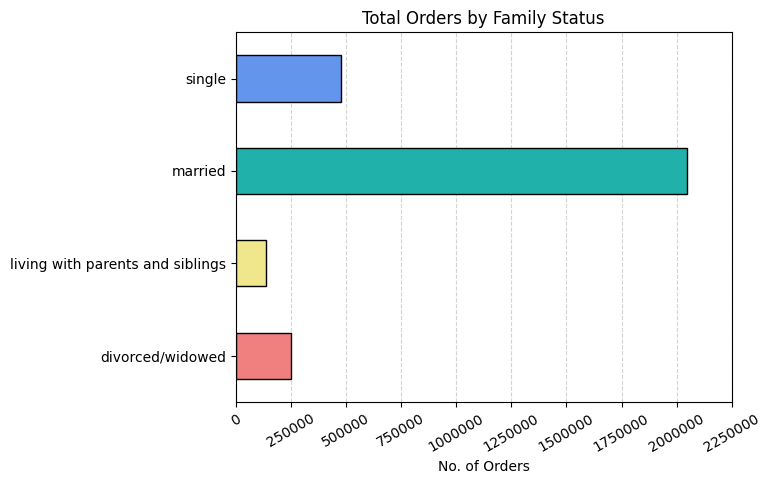

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
total_orders_by_marital = cus_profile['marital_status'].value_counts(dropna=False).sort_index().plot.barh(
    edgecolor='black',color=colors)

# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='x', color='lightgray', linestyle='dashed')

# Formatting
plt.xticks(np.arange(0,2500000,250000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,2500000,250000)])
plt.xticks(rotation=30)
plt.title('Total Orders by Family Status')
plt.xlabel('No. of Orders')
plt.ylabel('')

# Export the bar chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '3e_order_volume_by_marital_bar.png' ), dpi=300 , bbox_inches='tight')

#### *3f. Family status vs product price range - Bar*

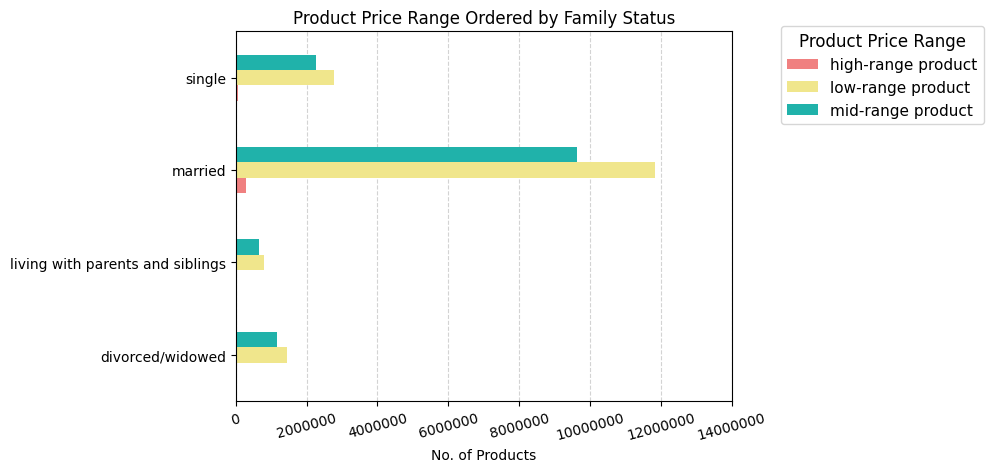

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
range_marital_bar = pd.crosstab(df['marital_status'],df['price_range'], dropna = False).plot.barh(color=colors)

# Legend setting
leg = plt.legend(loc=(1.1,0.75),title='Product Price Range',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Product Price Range Ordered by Family Status')
plt.xlabel('No. of Products')
plt.ylabel('')
plt.xticks(rotation=15)
plt.xticks(np.arange(0,16000000,2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,16000000,2000000)])
plt.gca().set_axisbelow(True)
plt.grid(axis='x', color='lightgray', linestyle='dashed')

# Export the bar chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '3f_marital_by_price_range_bar.png' ), dpi=300 , bbox_inches='tight')

#### *3g. Marital status v.s. products ordered by department - Stacked Bar*

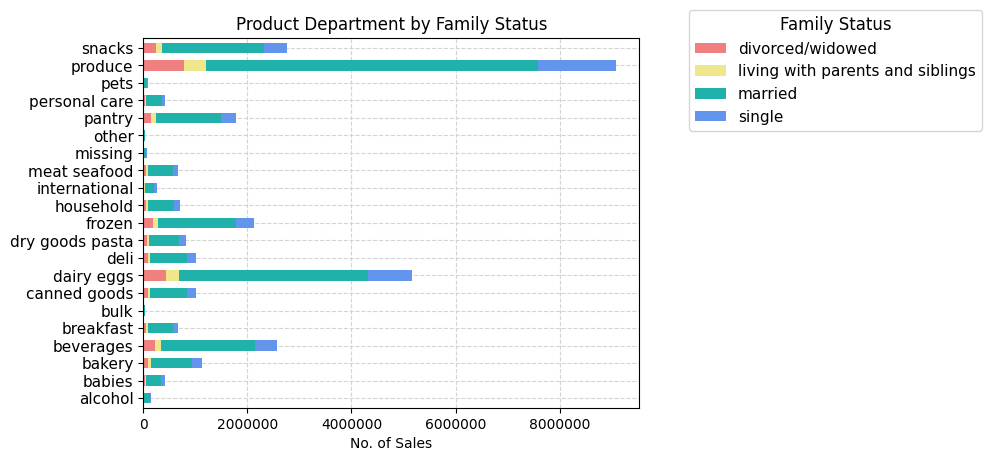

In [ ]:
# create a crosstab with department and marital status group

dept_marital_cross = pd.crosstab(df['department'] , df['marital_status'] , dropna = False)

# Create color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot bar chart
dept_marital_bar = dept_marital_cross.plot.barh(color=colors, stacked =True, width = 0.6)

# Adjust legend
leg = plt.legend(loc=(1.1,0.75),title='Family Status', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgrey', linestyle='dashed')

plt.title('Product Department by Family Status')
plt.ylabel('',weight='black')
plt.xlabel('No. of Sales')
plt.xticks(np.arange(0,10000000,2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,10000000,2000000)])
plt.yticks(fontsize=11)

# Export the bar chart

dept_marital_bar.figure.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '3g_dept_by_marital_bar.png' ), dpi=300, bbox_inches='tight')

#### *3h. Marital status vs consumer profile - Bar*

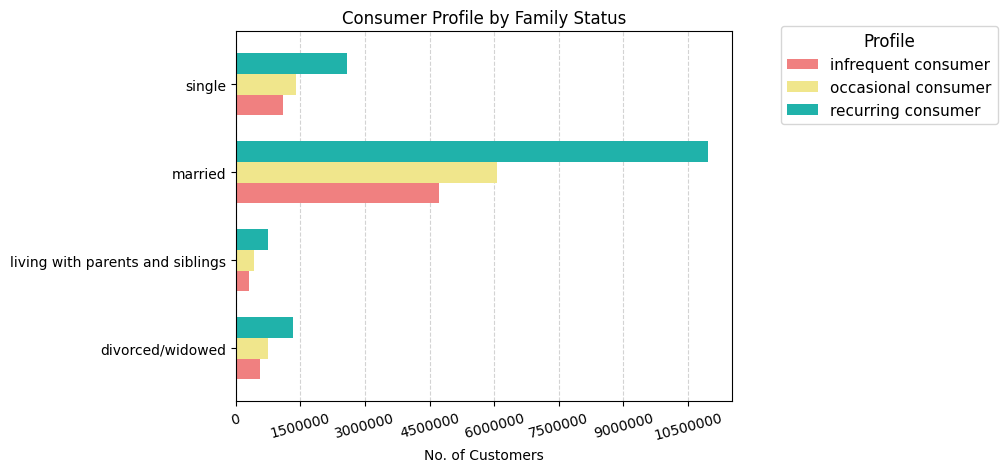

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
order_frequency_by_marital_bar = pd.crosstab(df['marital_status'] , df['consumer_type'], dropna=False).plot.barh(
    width=0.7,color=colors)

# Setting up legend
leg = plt.legend(loc=(1.1,0.75),title='Profile',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.title('Consumer Profile by Family Status')
plt.ylabel('')
plt.xticks(rotation=15)
plt.xlabel('No. of Customers')
plt.xticks(np.arange(0,12000000,1500000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,12000000,1500000)])
plt.gca().set_axisbelow(True)
plt.grid(axis = 'x', color = 'lightgray', linestyle = 'dashed')

# Export the bar
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '3h_consumer_type_by_marital_bar.png'), dpi=300 , bbox_inches='tight')

#### *3i. Family status vs brand loyalty - Bar*

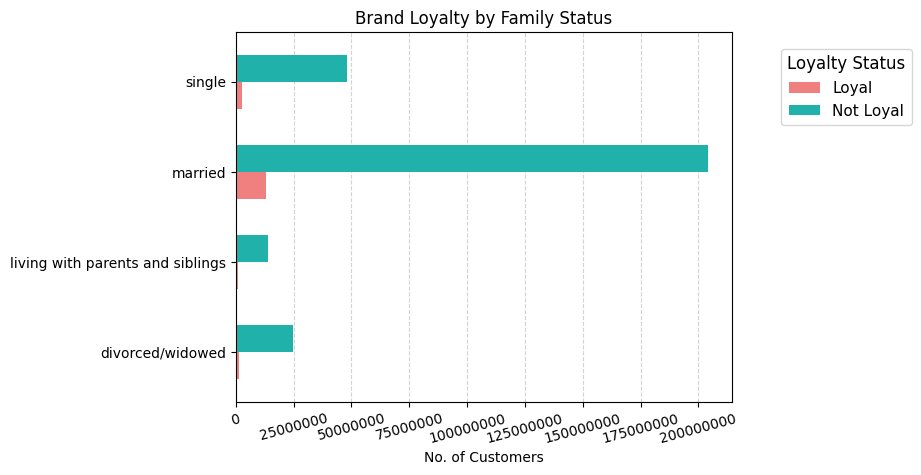

In [ ]:
# Create crosstab: loyalty with age group
loyalty_family_cross = pd.crosstab(df['marital_status'],df['loyalty_flag'], dropna = False)

# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
loyalty_family_bar = loyalty_family_cross.plot.barh(width=0.6,color=colors)

# Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='x', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Loyalty Status', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Brand Loyalty by Family Status')
plt.ylabel('')
plt.xlabel('No. of Customers')
plt.xticks(np.arange(0,22000000,2500000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,220000000,25000000)])
plt.xticks(rotation=15)

# Export the figure

plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10','3i_marital_by_loyalty_bar.png'), dpi=300, bbox_inches= 'tight')

#### *3j. Family status vs spending habit - Bar*

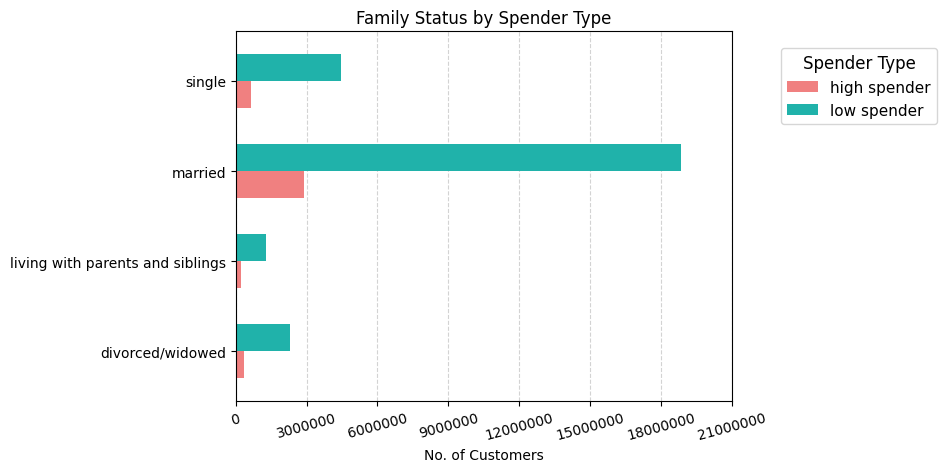

In [ ]:
# Create a crosstab for age group and spending flag
marital_spending_cross = pd.crosstab(df['marital_status'], df['spender_type'], dropna= False)

# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
marital_spending_bar = marital_spending_cross.plot.barh(width=0.6,color=colors)

# Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='x', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Spender Type', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.title('Family Status by Spender Type')
plt.ylabel('')
plt.xlabel('No. of Customers')
plt.xticks(np.arange(0,22000000,3000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,22000000,3000000)])
plt.xticks(rotation=15)

# Export the figure
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10','3j_marital_by_spending_bar.png'), dpi=300, bbox_inches='tight')

#### *3k. Family status vs income status - Bar*

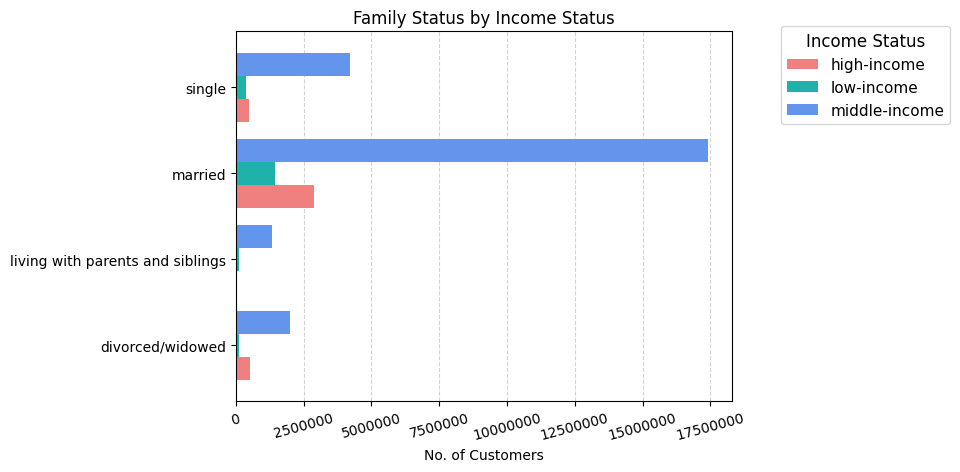

In [ ]:
# Create a crosstab for age group and income group
marital_income_cross = pd.crosstab(df['marital_status'], df['income_group'], dropna= False)

# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
marital_income_bar = marital_income_cross.plot.barh(width=0.8,color=colors)

#Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='x', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Income Status', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.title('Family Status by Income Status')
plt.ylabel('', weight='black')
plt.xlabel('No. of Customers')
plt.xticks(np.arange(0,20000000,2500000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,20000000,2500000)])
plt.xticks(rotation=15)


# Export the figure
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10','3k_marital_by_income_bar.png'), dpi=300 , bbox_inches='tight')

#### *3L. Family status vs age group - Bar*

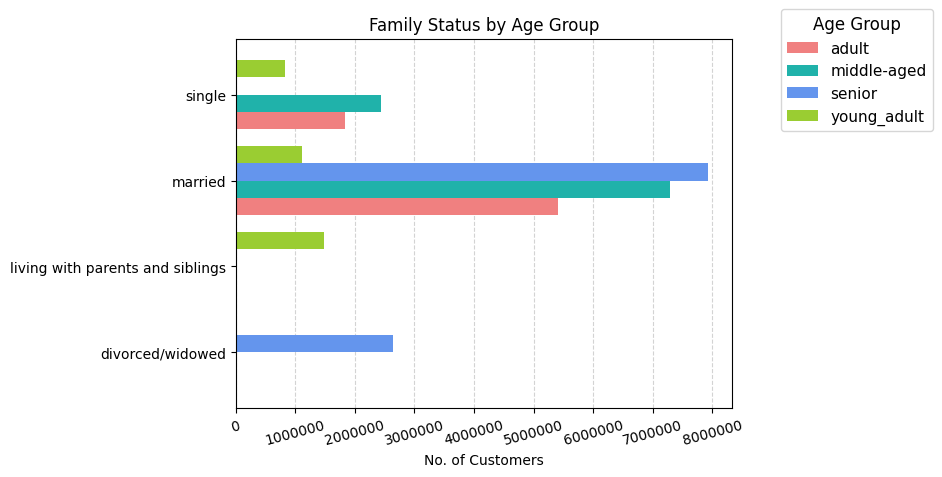

In [ ]:
# Create a crosstab for age group and income group
marital_age_cross = pd.crosstab(df['marital_status'], df['age_group'], dropna= False)

# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
marital_age_bar = marital_age_cross.plot.barh(width=0.8,color=colors)

#Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='x', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Age Group', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.title('Family Status by Age Group')
plt.ylabel('', weight='black')
plt.xlabel('No. of Customers')
plt.xticks(np.arange(0,9000000,1000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,9000000,1000000)])
plt.xticks(rotation=15)


# Export the figure
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10','3L_marital_by_age_bar.png'), dpi=300 , bbox_inches='tight')

#### *3m. Family vs income - Scatterplot*

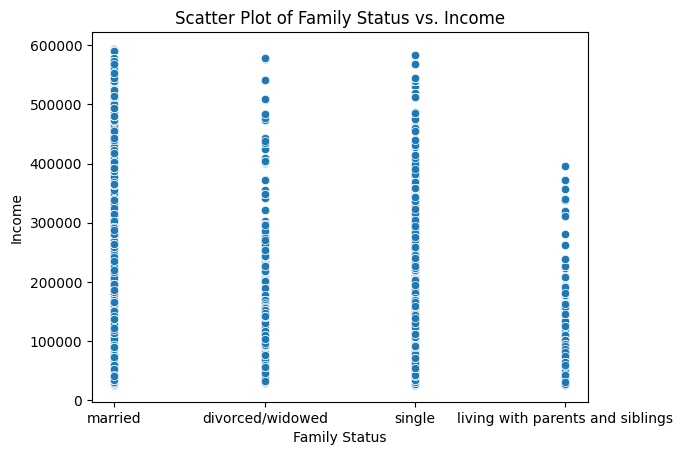

In [ ]:
# Create the scatter plot using seaborn
scatter_plot = sns.scatterplot(x='marital_status', y='income', data=df)

# Set plot title and labels
plt.title('Scatter Plot of Family Status vs. Income')
plt.xlabel('Family Status')
plt.ylabel('Income')

# Export the plot
plt.savefig(os.path.join(
    path, '04 Analysis','Visualizations','4.10', '3m_marital_income_scatter.png'), dpi=300 , bbox_inches='tight')

#### *3n. Family status distrution by region - Pie*

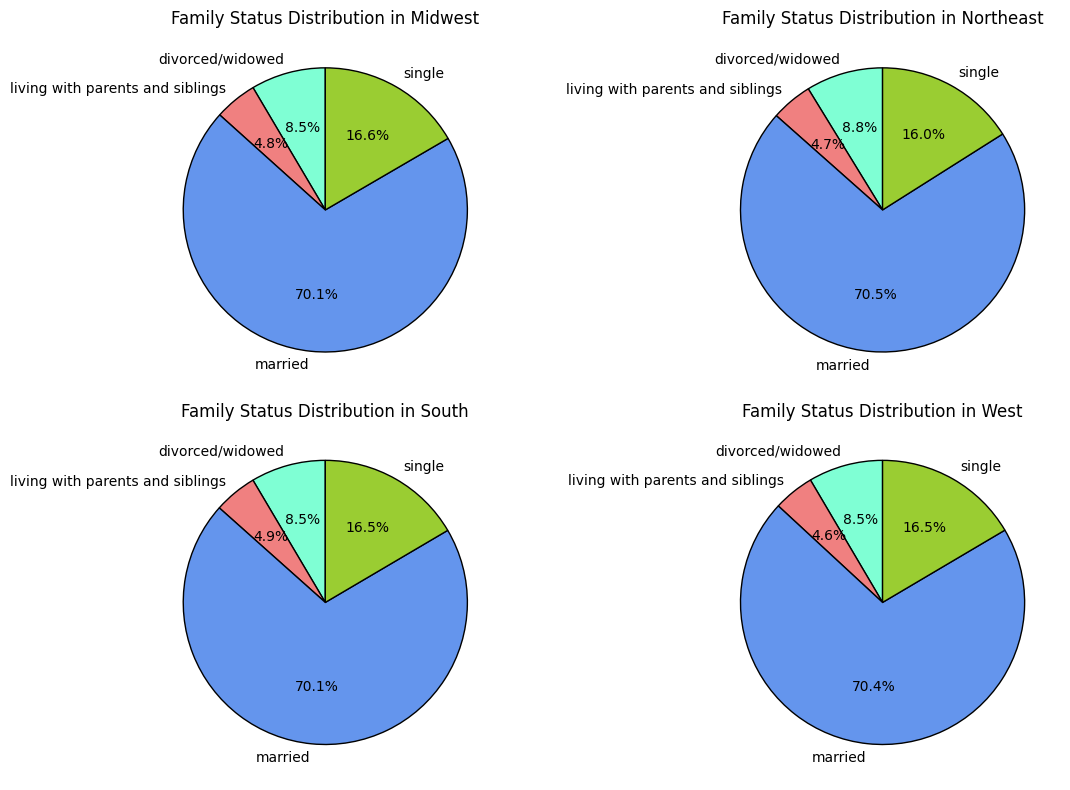

In [ ]:
# Create a crosstab
marital_region_cross = pd.crosstab(df['marital_status'], df['region'], dropna=False)

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the data in each subplot
regions = marital_region_cross.columns

# Set up explode
explode = [0,0,0,0]

# Iterate through regions and plot pie charts
for i, region in enumerate(regions):
    row = i // 2  # Calculate row index
    col = i % 2   # Calculate column index
    ax = axes[row, col]  # Get the current subplot

    # Plot pie chart for the current region
    marital_region_cross[region].plot.pie(ax=ax, autopct='%1.1f%%', startangle=90,
                                      colors=['aquamarine', 'lightcoral', 'cornflowerblue', 'yellowgreen'],
                                          explode=explode, wedgeprops={'edgecolor': 'black'})

    # Set subplot title
    ax.set_title(f'Family Status Distribution in {region}')
    ax.set_ylabel('')  # Remove y-axis label

# Adjust spacing between subplots
plt.tight_layout()

# Export the plot
plt.savefig(os.path.join(
    path, '04 Analysis','Visualizations','4.10', '3n_marital_by_region_4pies.png'), dpi=300 , bbox_inches='tight')

#### *3o. Revenue by family status - Pie*

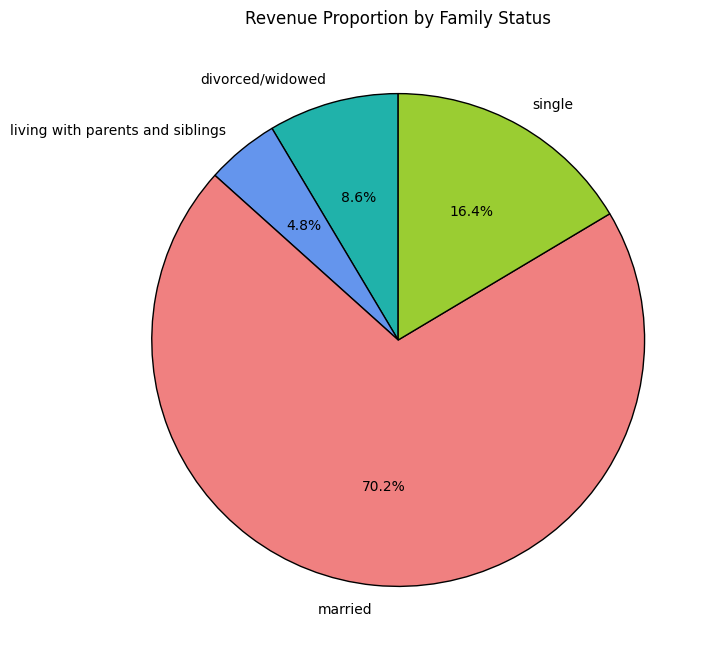

In [ ]:
# Set up color palette
colors = ['lightseagreen','cornflowerblue','lightcoral','yellowgreen','peachpuff']

# Calculate order volume for each income group
total_revenue_by_family = cus_profile.groupby('marital_status')['payment_per_order'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))

# Access the values of the series using .values instead of indexing with a column name
plt.pie(total_revenue_by_family.values,
        labels=total_revenue_by_family.index, # Use .index to get the income groups
        autopct='%1.1f%%', startangle=90,wedgeprops={'edgecolor':'black'},colors=colors)

# Customize the chart
plt.title('Revenue Proportion by Family Status')

# Export the pie
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '3o_revenue_by_marital_pie.png' ), dpi=300 , bbox_inches='tight')

### 4.Dependants Flag: with dependant /no dependant

#### *4a. Dependant status distribution - Pie*

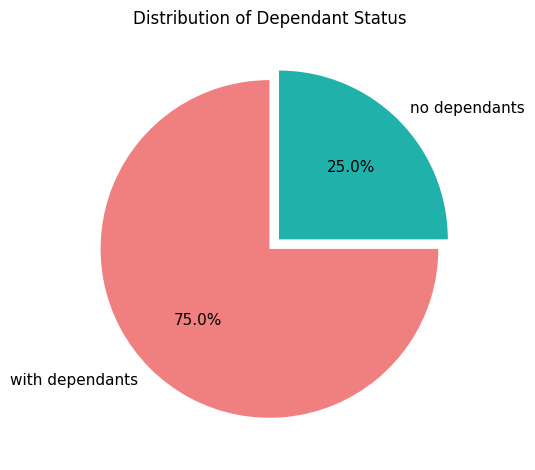

In [ ]:
# Create a dataframe with value counts in dependants_flag colomn
dependant_status = df['dependants_flag'].value_counts(dropna = False)

# Set up color palette
explode = [0 , 0.08]
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a pie
dependant_status_distribution_pie = dependant_status.plot.pie(
    autopct='%1.1f%%', labels= ['with dependants','no dependants'],
    explode=explode, startangle=90,fontsize=11, colors=colors)

# Formatting
plt.ylabel('')
plt.title('Distribution of Dependant Status', size=12, pad=10)
plt.tight_layout()

# Export the figure

dependant_status_distribution_pie.figure.savefig(os.path.join(
    path, '04 Analysis','Visualizations', '4.10', '4a_dependant_distribution_pie.png'), dpi=300, bbox_inches='tight')

#### *4b. Usage frequency and expenditure by Dependant status*

In [ ]:
cus_profile.groupby('dependants_flag').agg({'days_since_last_order': ['min' , 'max' , 'mean'] , 'payment_per_order': ['min', 'max', 'mean']})

days_since_last_order                  payment_per_order  \
                                  min   max       mean               min   
dependants_flag                                                            
No dependants                     0.0  30.0  12.545997               1.0   
With dependants                   0.0  30.0  12.542689               1.0   

                                         
                         max       mean  
dependants_flag                          
No dependants    8335.015625  78.322222  
With dependants  7807.835938  78.333543

#### *4c. Dependant status vs order frequency - Bar*


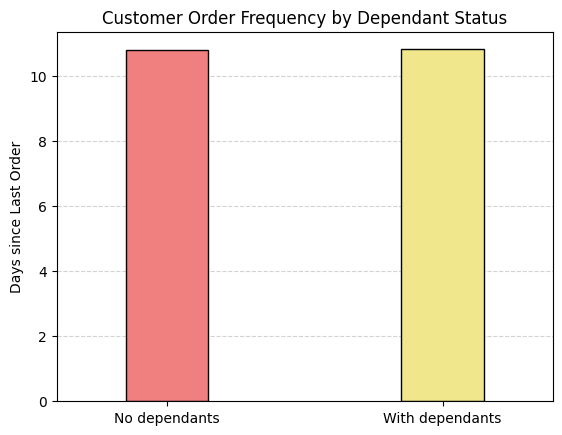

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
dependant_avg_usage_bar =df.groupby('dependants_flag')['days_since_last_order'].mean().plot.bar(
    edgecolor='black',legend=False,width=0.3,color=colors)

# Formatting
plt.title('Customer Order Frequency by Dependant Status')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Days since Last Order')

plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'lightgray', linestyle = 'dashed')

# Export the bar
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '4c_order_frequency_by_dependant_status_bar.png'), dpi=300 , bbox_inches='tight')

#### *4d. Dependant status vs average expenditure - Bar*

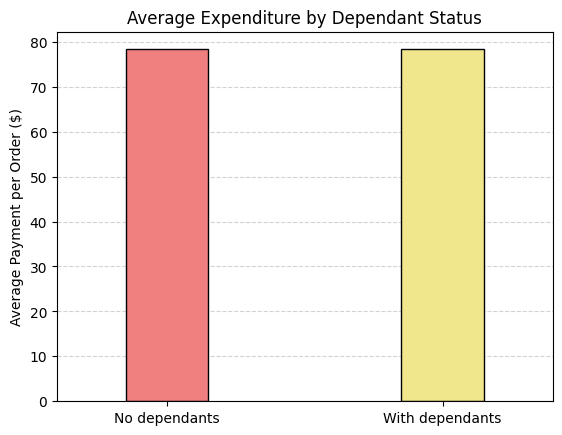

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
depend_avg_expense = cus_profile.groupby(['dependants_flag'])['payment_per_order'].mean()
depend_avg_expense.plot.bar(edgecolor='black',width=0.3, color=colors)


# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Formatting
plt.title('Average Expenditure by Dependant Status')
plt.ylabel('Average Payment per Order ($)')
plt.xlabel('',weight='black')
plt.xticks(rotation=0)
plt.yticks(fontsize=10)

# Export the bar chart

plt.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , '4.10', '4d_avg_expense_by_income.png') , dpi=300, bbox_inches='tight')

#### *4e. Dependant status vs order volume - Bar*

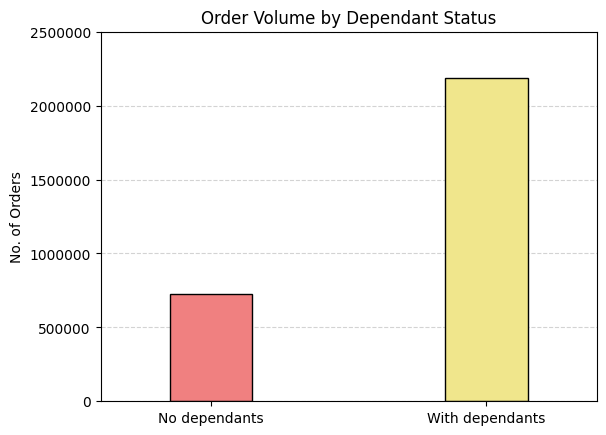

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
total_orders_by_depend_status = cus_profile['dependants_flag'].value_counts(
    dropna=False).sort_index().plot.bar(width=0.3,edgecolor='black',color=colors)

# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Formatting
plt.yticks(np.arange(0,3000000,500000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,3000000,500000)])
plt.xticks(rotation=0)
plt.title('Order Volume by Dependant Status')
plt.ylabel('No. of Orders')
plt.xlabel('',weight='black')

# Export the bar chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '4e_order_volume_by_depend_bar.png' ), dpi=300, bbox_inches='tight')

#### *4f. Dependant status vs product price range - Bar*

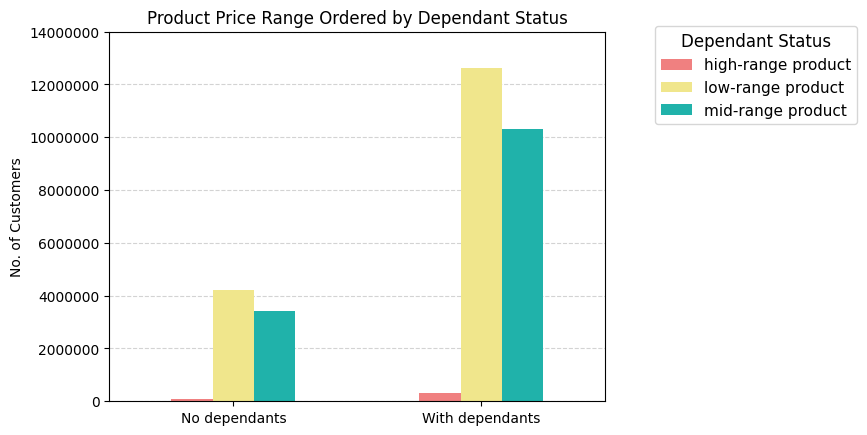

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
range_depend_bar = pd.crosstab(df['dependants_flag'],df['price_range'], dropna = False).plot.bar(color=colors)

# Legend setting
leg = plt.legend(loc=(1.1,0.75),title='Dependant Status',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Product Price Range Ordered by Dependant Status')
plt.ylabel('No. of Customers')
plt.xlabel('',weight='black')
plt.xticks(rotation=0)
plt.yticks(np.arange(0,15000000,2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,2000000)])
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Export the bar chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '4f_range_depend_bar.png' ), dpi=300 , bbox_inches='tight')

#### 4g. Dependant status vs products ordered by department - Stacked Bar*

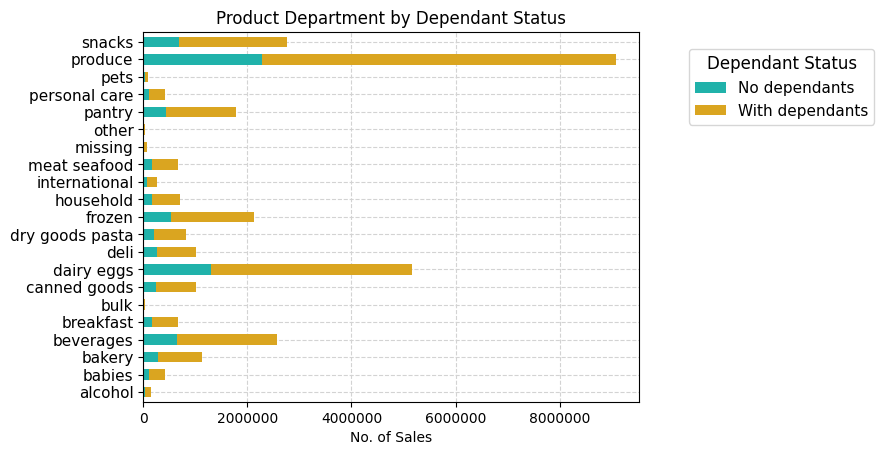

In [ ]:
# Create a crosstab with department and income group
depend_depart_cross = pd.crosstab(df['department'],df['dependants_flag'], dropna=False)

# Set color palette
colors = ['lightseagreen','goldenrod','cornflowerblue','lightcoral','yellowgreen','peachpuff']

# Plot bar chart
depend_depart_bar = depend_depart_cross.plot.barh(color=colors, stacked =True, width = 0.6)

# Adjust legend
leg = plt.legend(loc=(1.1,0.75),title='Dependant Status' , title_fontsize= 12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')

# Formatting
plt.title('Product Department by Dependant Status')
plt.ylabel('',weight='black')
plt.xlabel('No. of Sales')
plt.xticks(np.arange(0,10000000,2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,10000000,2000000)])
plt.yticks(fontsize=11)

# Export the bar chart
depend_depart_bar.figure.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '4g_depend_vs_dept_bar.png' ), dpi=300, bbox_inches='tight')

#### *4h. Dependant status vs consumer profile - Bar*

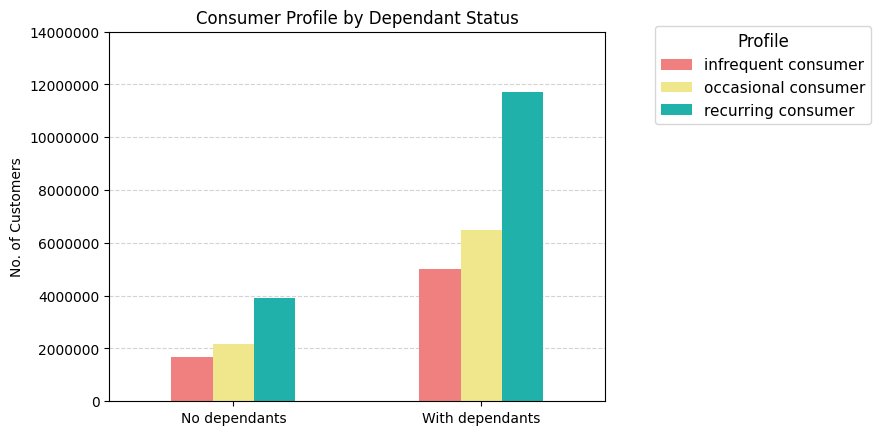

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
order_frequency_by_depend_bar = pd.crosstab(df['dependants_flag'] , df['consumer_type'], dropna=False).plot.bar(
    width=0.5,color=colors)

# Setting up legend
leg = plt.legend(loc=(1.1,0.75),title='Profile',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.title('Consumer Profile by Dependant Status')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0,15000000,2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,2000000)])
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'lightgray', linestyle = 'dashed')

# Export the bar
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '4h_consumer_type_by_depend_bar.png'), dpi=300 , bbox_inches='tight')

#### 4i. Depedant status vs brand loyalty - 2 Pie*

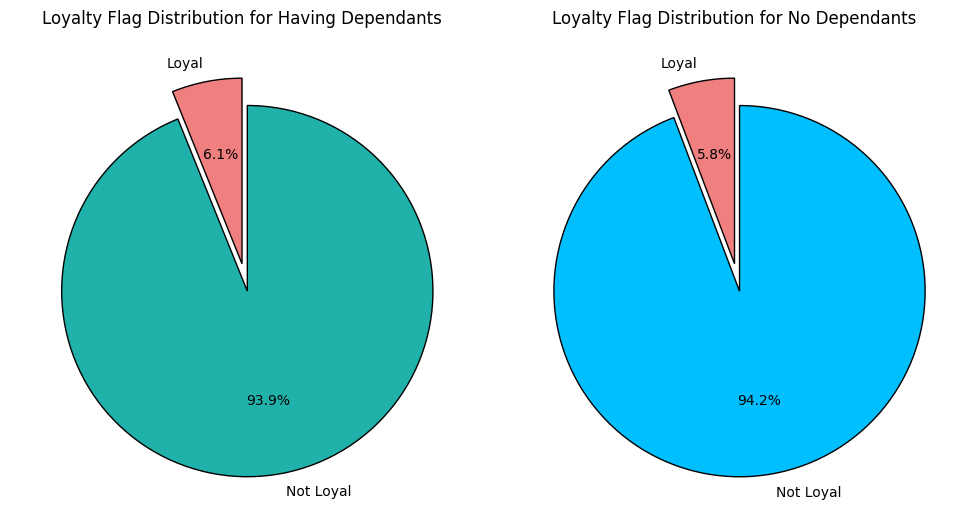

In [ ]:
# Create a crosstab to get the data
loyalty_dependants_cross = pd.crosstab(df['dependants_flag'], df['loyalty_flag'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Set up expolode
explode = [0,0.15]

# Pie chart for dependants_flag == 'With dependants'
loyalty_dependants_cross.loc['With dependants'].plot.pie(autopct='%1.1f%%', ax=axes[0],
                                                         explode=explode, startangle=90,
                                           colors=['lightcoral', 'lightseagreen'],
                                           wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Loyalty Flag Distribution for Having Dependants')
axes[0].set_ylabel('')

# Pie chart for dependants_flag == 'No dependants'
loyalty_dependants_cross.loc['No dependants'].plot.pie(autopct='%1.1f%%', ax=axes[1],
                                                       explode=explode, startangle=90,
                                          colors=['lightcoral' , 'deepskyblue'],
                                          wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Loyalty Flag Distribution for No Dependants')
axes[1].set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

# Export the plot
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '4i_depend_by_loyalty_pie.png'), dpi=300 , bbox_inches='tight')

#### *4j. Dependant status vs spending habit - Pie*

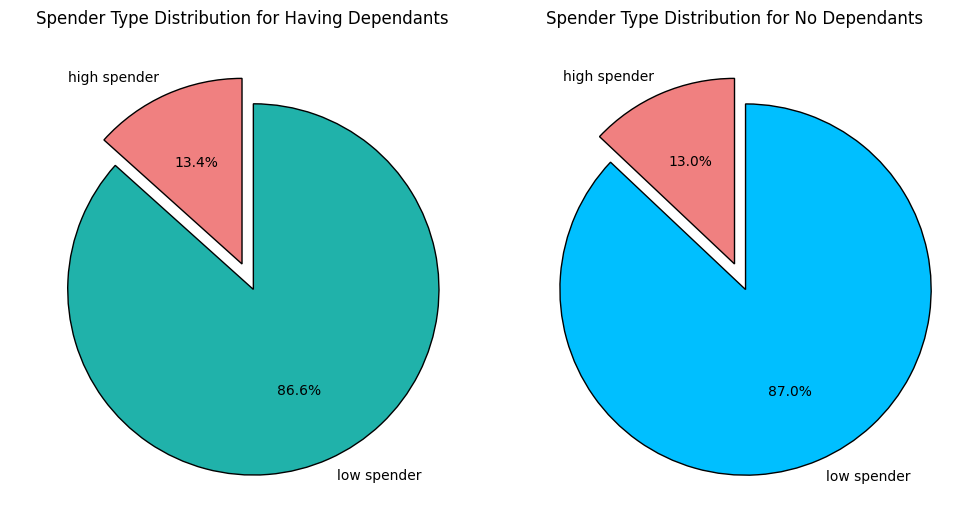

In [ ]:
# Create a crosstab to get the data
spender_dependants_cross = pd.crosstab(df['dependants_flag'], df['spender_type'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Set up expolode
explode = [0,0.15]

# Pie chart for dependants_flag == 'With dependants'
spender_dependants_cross.loc['With dependants'].plot.pie(autopct='%1.1f%%', ax=axes[0],
                                                         explode=explode, startangle=90,
                                           colors=['lightcoral', 'lightseagreen'],
                                           wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Spender Type Distribution for Having Dependants')
axes[0].set_ylabel('')

# Pie chart for dependants_flag == 'No dependants'
spender_dependants_cross.loc['No dependants'].plot.pie(autopct='%1.1f%%', ax=axes[1],
                                                       explode=explode, startangle=90,
                                          colors=['lightcoral' , 'deepskyblue'],
                                          wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Spender Type Distribution for No Dependants')
axes[1].set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

# Export the plot
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '4j_depend_by_spender_type_pie.png'), dpi=300 , bbox_inches='tight')

#### *4k. Dependant Status vs income status -Pie*

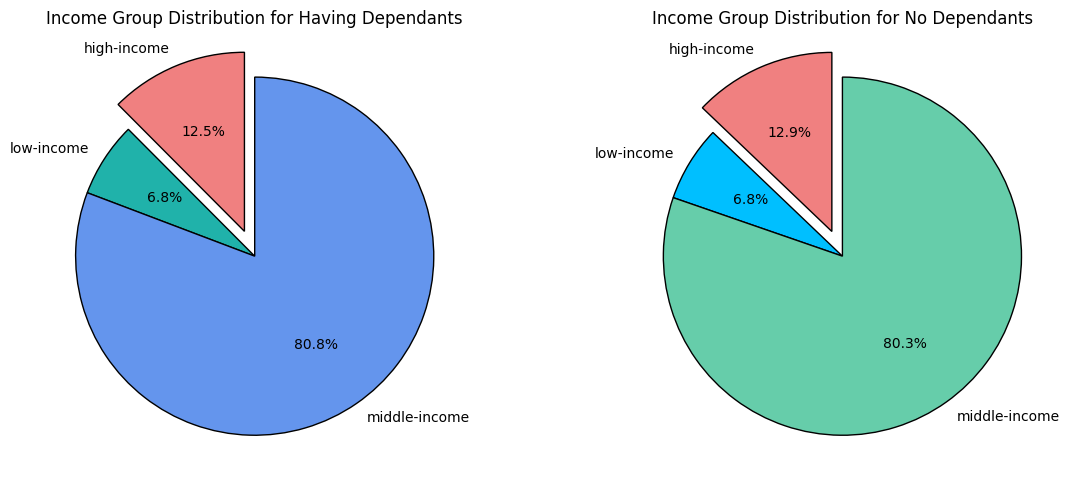

In [ ]:
# Create a crosstab to get the data
income_dependants_cross = pd.crosstab(df['dependants_flag'], df['income_group'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Set up expolode
explode = [0.15 ,0, 0]

# Pie chart for dependants_flag == 'With dependants'
income_dependants_cross.loc['With dependants'].plot.pie(autopct='%1.1f%%', ax=axes[0],
                                                         explode=explode, startangle=90,
                                           colors=['lightcoral', 'lightseagreen','cornflowerblue'],
                                           wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Income Group Distribution for Having Dependants')
axes[0].set_ylabel('')

# Pie chart for dependants_flag == 'No dependants'
income_dependants_cross.loc['No dependants'].plot.pie(autopct='%1.1f%%', ax=axes[1],
                                          colors=['lightcoral','deepskyblue','mediumaquamarine'],
                                                       explode=explode, startangle=90,
                                          wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Income Group Distribution for No Dependants')
axes[1].set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

# Export the plot
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '4k_depend_by_income_group_pie.png'), dpi=300 , bbox_inches='tight')

#### *4L. Dependant status vs age group - Pie*

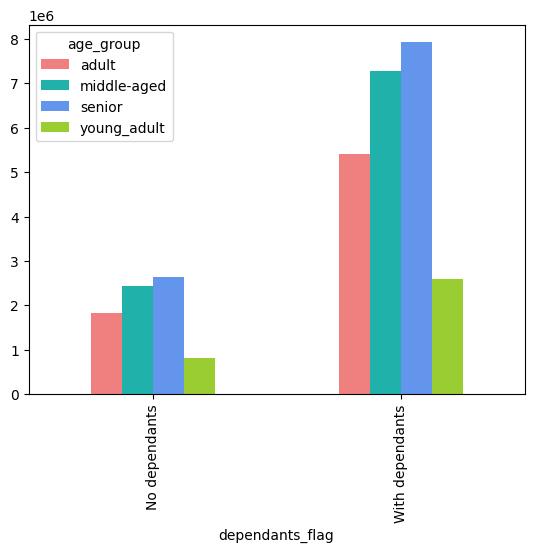

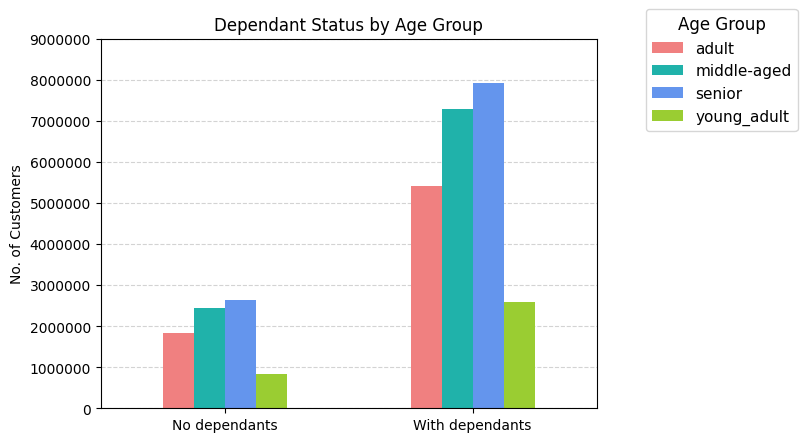

In [ ]:
# Create a crosstab for age group and income group
depend_age_cross = pd.crosstab(df['dependants_flag'], df['age_group'], dropna= False)

# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
depend_age_bar = depend_age_cross.plot.bar(width=0.5,color=colors)

#Set up grid line
plt.gca().set_axisbelow(True)# Create a crosstab for age group and income group
depend_age_cross = pd.crosstab(df['dependants_flag'], df['age_group'], dropna= False)

# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
depend_age_bar = depend_age_cross.plot.bar(width=0.5,color=colors)

#Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Age Group', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.title('Dependant Status by Age Group')
plt.xlabel('', weight='black')
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0,10000000,1000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,10000000,1000000)])
plt.xticks(rotation=0)


# Export the figure
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10','4L_depend_by_age_bar.png'), dpi=300 , bbox_inches='tight')
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Age Group', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.title('Dependant Status by Age Group')
plt.xlabel('', weight='black')
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0,10000000,1000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,10000000,1000000)])
plt.xticks(rotation=0)


# Export the figure
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10','4L_depend_by_age_bar.png'), dpi=300 , bbox_inches='tight')

#### *4m. Dependant status vs family status - Bar*

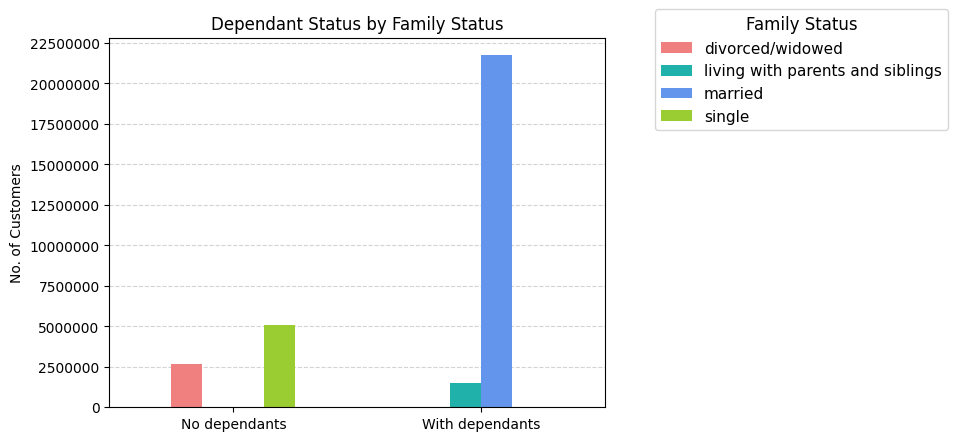

In [ ]:
# Create a crosstab for age group and income group
depend_marital_cross = pd.crosstab(df['dependants_flag'], df['marital_status'], dropna= False)

# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
depend_marital_bar = depend_marital_cross.plot.bar(width=0.5,color=colors)

#Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Family Status', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.title('Dependant Status by Family Status')
plt.xlabel('', weight='black')
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0,25000000,2500000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,25000000,2500000)])
plt.xticks(rotation=0)


# Export the figure
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10','4m_depend_by_marital_bar.png'), dpi=300 , bbox_inches='tight')

#### *4n. Dependant status vs region - Pie*

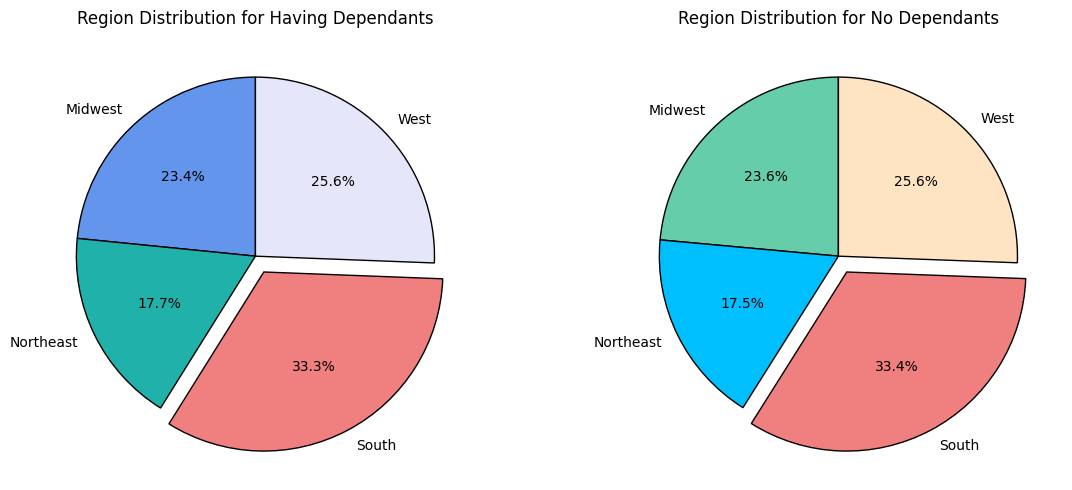

In [ ]:
# Create a crosstab to get the data
region_dependants_cross = pd.crosstab(df['dependants_flag'], df['region'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Set up expolode
explode = [0, 0 ,0.1, 0]

# Pie chart for dependants_flag == 'With dependants'
region_dependants_cross.loc['With dependants'].plot.pie(autopct='%1.1f%%', ax=axes[0],
                                                        labels=['Midwest', 'Northeast', 'South', 'West'],
                                                         explode=explode, startangle=90,
                                           colors=['cornflowerblue', 'lightseagreen','lightcoral','lavender'],
                                           wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Region Distribution for Having Dependants')
axes[0].set_ylabel('')

# Pie chart for dependants_flag == 'No dependants'
region_dependants_cross.loc['No dependants'].plot.pie(autopct='%1.1f%%', ax=axes[1],
                                          colors=['mediumaquamarine','deepskyblue','lightcoral','bisque'],
                                                       explode=explode, startangle=90,
                                          wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Region Distribution for No Dependants')
axes[1].set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

# Export the plot
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '4n_depend_by_region_pie.png'), dpi=300 , bbox_inches='tight')

### 5.Region: northeast/ midwest/ west/ south

#### *5a. Region distribution -Pie*

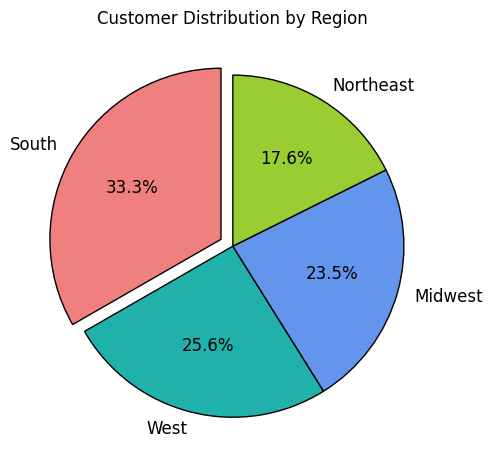

In [ ]:
# Set up color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']
explode = [0.08 , 0, 0 , 0]

# Plot a pie
region_distribution_pie = df['region'].value_counts(dropna=False).plot.pie(
    autopct='%1.1f%%', wedgeprops={'edgecolor':'black'},
    explode = explode,
    startangle=90,fontsize=12, colors=colors)

# Formatting
plt.ylabel('')
plt.title('Customer Distribution by Region')
plt.tight_layout()

# Export the chart
region_distribution_pie.figure.savefig(os.path.join(
    path, '04 Analysis','Visualizations', '4.10', '5a_region_distribution_pie.png'), dpi=300 , bbox_inches='tight')

#### *5b. Usage frequency and expenditure by regions*

In [ ]:
cus_profile.groupby('region').agg({'days_since_last_order': ['min' , 'max' , 'mean'] , 'payment_per_order': ['min', 'max', 'mean']})

days_since_last_order                  payment_per_order  \
                            min   max       mean               min   
region                                                               
Midwest                     0.0  30.0  12.571390               1.0   
Northeast                   0.0  30.0  12.531648               1.0   
South                       0.0  30.0  12.554254               1.0   
West                        0.0  30.0  12.511946               1.0   

                                   
                   max       mean  
region                             
Midwest    8335.015625  77.882137  
Northeast  6584.210938  78.481158  
South      7971.203125  78.370007  
West       7743.304688  78.590059

#### *5c. Region vs order frequency - Bar*

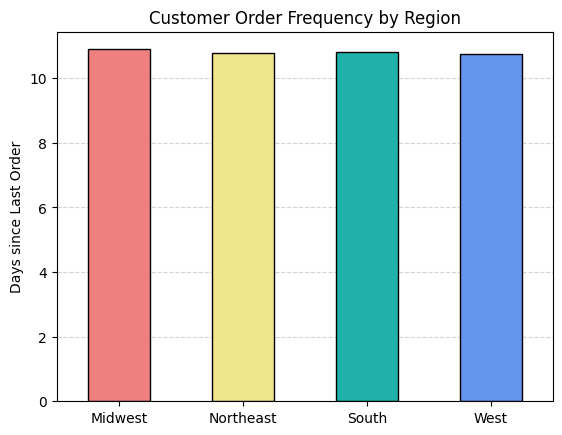

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
region_avg_usage_bar =df.groupby('region')['days_since_last_order'].mean().plot.bar(
    edgecolor='black',legend=False,width=0.5,color=colors)

# Formatting
plt.title('Customer Order Frequency by Region')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Days since Last Order')

plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'lightgray', linestyle = 'dashed')

# Export the bar
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '5c_order_frequency_by_region_bar.png'), dpi=300 , bbox_inches='tight')

#### *5d. Region vs average expenditure - Bar*

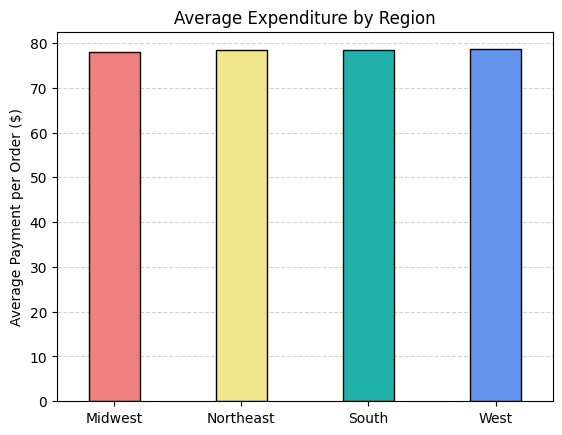

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
region_avg_expense = cus_profile.groupby(['region'])['payment_per_order'].mean()
region_avg_expense.plot.bar(edgecolor='black',width=0.4, color=colors)


# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Formatting
plt.title('Average Expenditure by Region')
plt.ylabel('Average Payment per Order ($)')
plt.xlabel('',weight='black')
plt.xticks(rotation=0)
plt.yticks(fontsize=10)

# Export the bar chart

plt.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , '4.10', '5d_avg_expense_by_region.png') , dpi=300, bbox_inches='tight')

#### *5e. Region vs order volume - Bar*

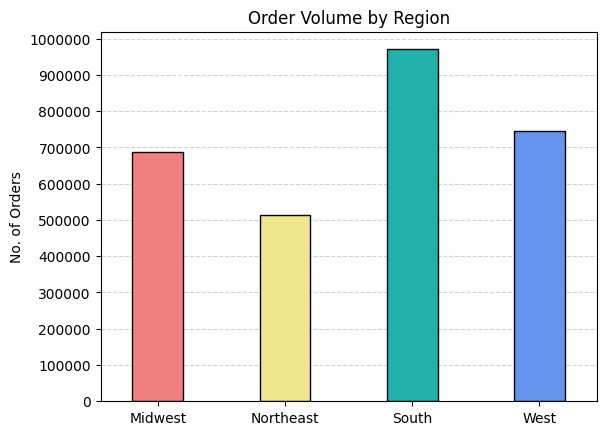

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
total_orders_by_region = cus_profile['region'].value_counts(
    dropna=False).sort_index().plot.bar(width=0.4,edgecolor='black',color=colors)

# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Formatting
plt.yticks(np.arange(0,1100000,100000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,1100000,100000)])
plt.xticks(rotation=0)
plt.title('Order Volume by Region')
plt.ylabel('No. of Orders')
plt.xlabel('',weight='black')

# Export the bar chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '5e_order_volume_by_region.png' ), dpi=300, bbox_inches='tight')

#### *5f. Region vs product price range - Bar/ Pie*

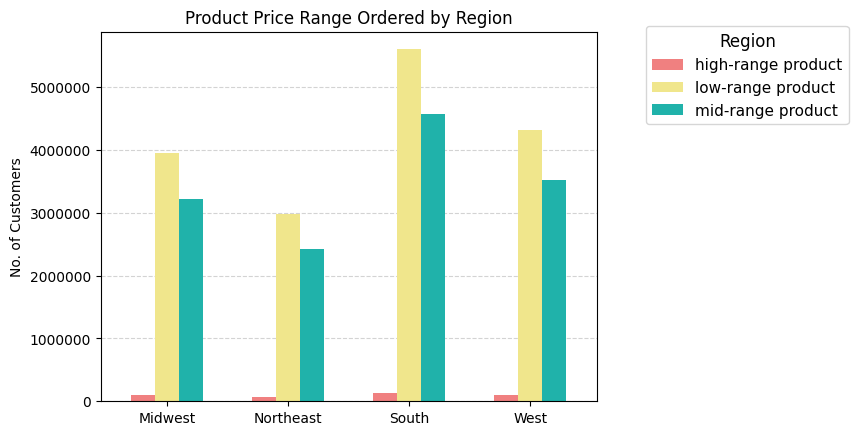

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
range_reigon_bar = pd.crosstab(df['region'],df['price_range'], dropna = False).plot.bar(width=0.6, color=colors)

# Legend setting
leg = plt.legend(loc=(1.1,0.75),title='Region',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Product Price Range Ordered by Region')
plt.ylabel('No. of Customers')
plt.xlabel('',weight='black')
plt.xticks(rotation=0)
plt.yticks(np.arange(0,6000000,1000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,6000000,1000000)])
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Export the bar chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '5f_range_region_bar.png' ), dpi=300 , bbox_inches='tight')

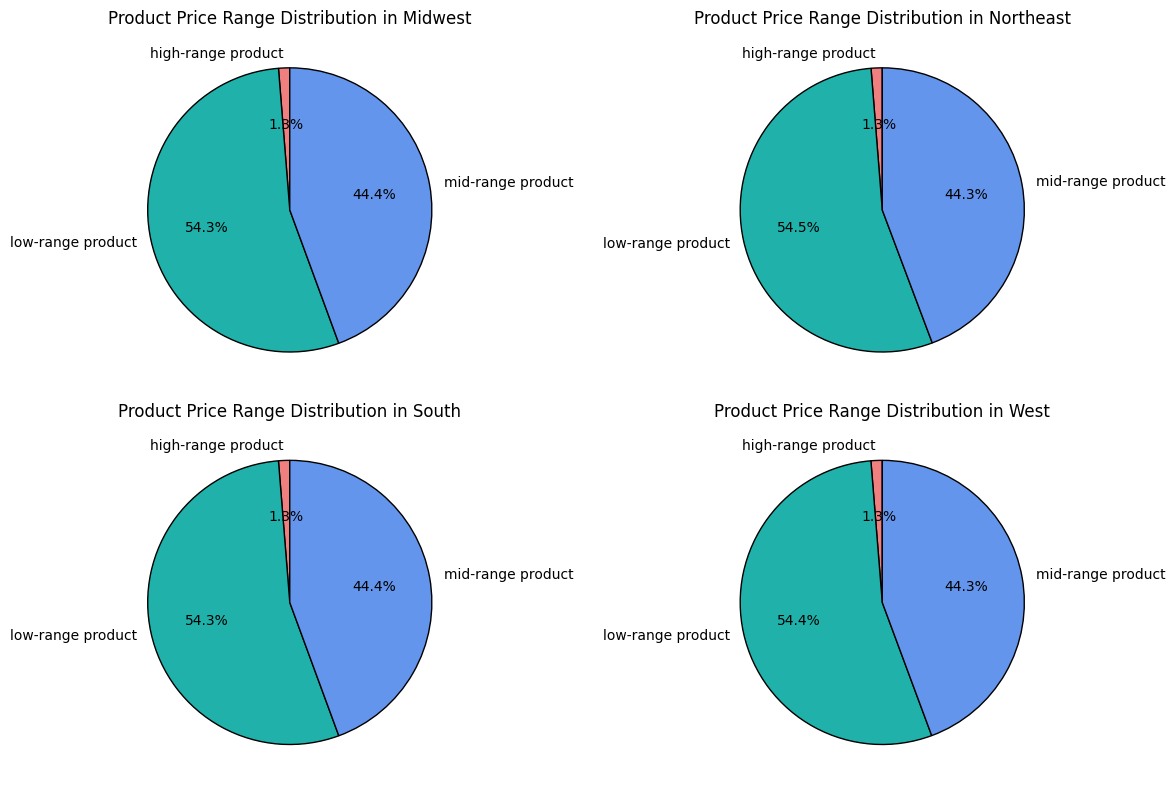

In [ ]:
# Create a crosstab to count price range occurrences in each region
price_range_by_region = pd.crosstab(df['region'], df['price_range'], dropna=False)

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Define regions for the subplots
regions = price_range_by_region.index

# Define color palette for pie charts
colors = ['lightcoral', 'lightseagreen', 'cornflowerblue', 'yellowgreen']

# Iterate through regions and plot pie charts
for i, region in enumerate(regions):
    row = i // 2  # Calculate row index
    col = i % 2   # Calculate column index
    ax = axes[row, col]  # Get the current subplot

    # Plot pie chart for the current region
    price_range_by_region.loc[region].plot.pie(
        ax=ax, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

    # Set subplot title
    ax.set_title(f'Product Price Range Distribution in {region}')
    ax.set_ylabel('')  # Remove y-axis label

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '5f_range_region_pie.png' ), dpi=300 , bbox_inches='tight')

#### *5g. Region vs product ordered by department - Stacked Bar*

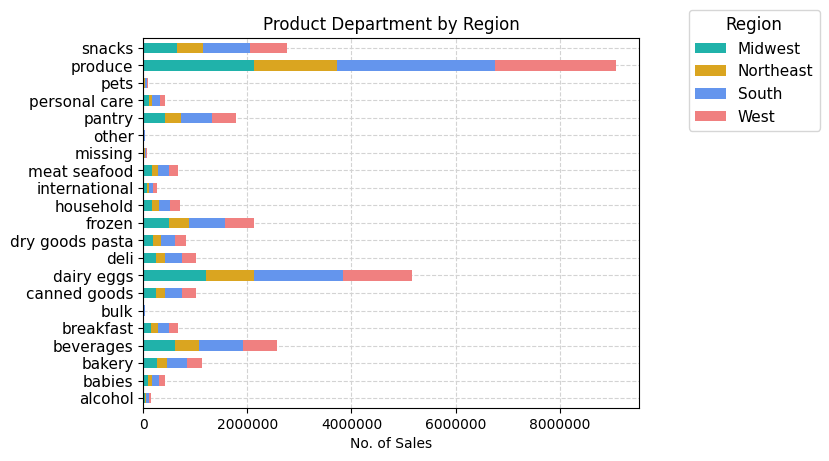

In [ ]:
# Create a crosstab with department and income group
region_depart_cross = pd.crosstab(df['department'],df['region'], dropna=False)

# Set color palette
colors = ['lightseagreen','goldenrod','cornflowerblue','lightcoral','yellowgreen','peachpuff']

# Plot bar chart
region_depart_bar = region_depart_cross.plot.barh(color=colors, stacked =True, width = 0.6)

# Adjust legend
leg = plt.legend(loc=(1.1,0.75),title='Region' , title_fontsize= 12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')

# Formatting
plt.title('Product Department by Region')
plt.ylabel('',weight='black')
plt.xlabel('No. of Sales')
plt.xticks(np.arange(0,10000000,2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,10000000,2000000)])
plt.yticks(fontsize=11)

# Export the bar chart
region_depart_bar.figure.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '5g_region_vs_dept_bar.png' ), dpi=300, bbox_inches='tight')

#### *5h. Region vs consumer profile - Bar*

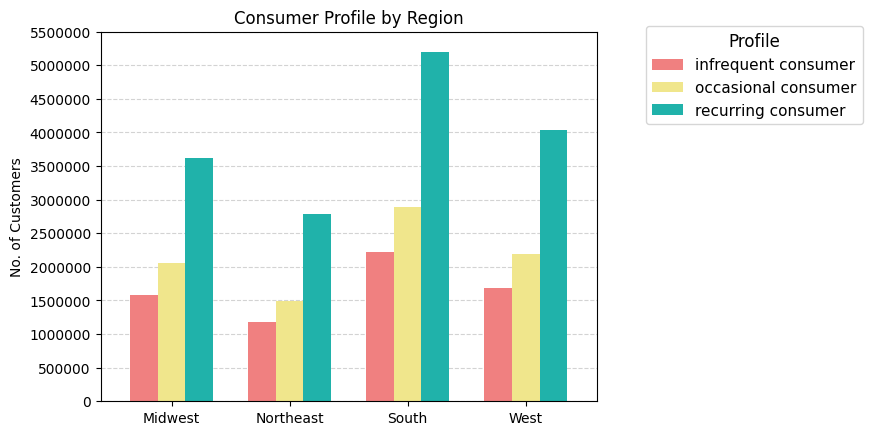

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
order_frequency_by_region_bar = pd.crosstab(df['region'] , df['consumer_type'], dropna=False).plot.bar(
    width=0.7,color=colors)

# Setting up legend
leg = plt.legend(loc=(1.1,0.75),title='Profile',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.title('Consumer Profile by Region')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0,6000000,500000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,6000000,500000)])
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'lightgray', linestyle = 'dashed')

# Export the bar
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '5h_consumer_type_by_region_bar.png'), dpi=300 , bbox_inches='tight')

#### *5i. Region vs brand loyalty - Bar*

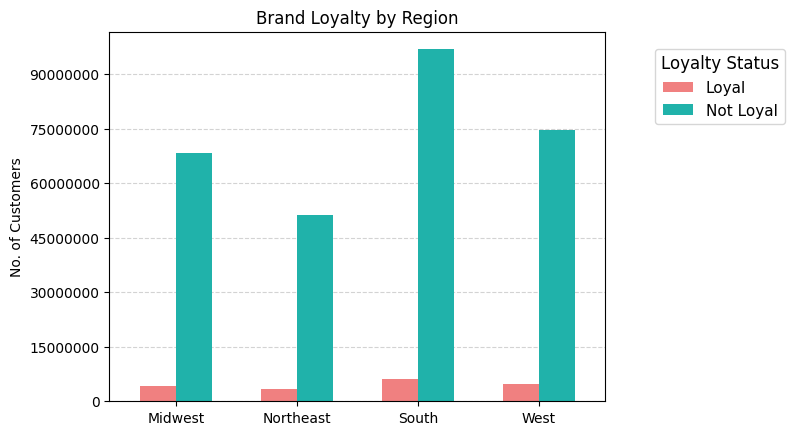

In [ ]:
# Create crosstab
loyalty_region_cross = pd.crosstab(df['region'],df['loyalty_flag'], dropna = False)

# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
loyalty_region_bar = loyalty_region_cross.plot.bar(width=0.6,color=colors)

# Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Loyalty Status', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Brand Loyalty by Region')
plt.xlabel('')
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0,10000000,1500000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,100000000,15000000)])
plt.xticks(rotation=0)

# Export the figure

plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10','5i_region_by_loyalty_bar.png'), dpi=400, bbox_inches= 'tight')

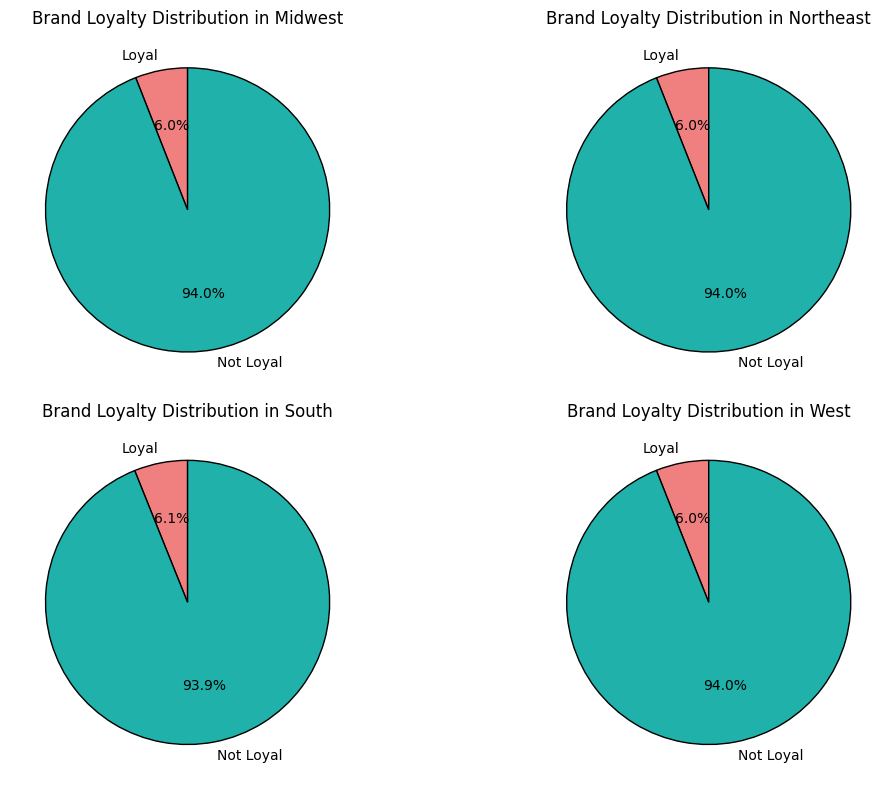

In [ ]:
# Create a crosstab to get the data for the pie charts
region_loyalty_cross = pd.crosstab(df['region'], df['loyalty_flag'], dropna=False)

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the data in each subplot
regions = region_loyalty_cross.index

# Iterate through regions and plot pie charts
for i, region in enumerate(regions):
    row = i // 2  # Calculate row index
    col = i % 2   # Calculate column index
    ax = axes[row, col]  # Get the current subplot

    # Plot pie chart for the current region
    region_loyalty_cross.loc[region].plot.pie(ax=ax, autopct='%1.1f%%', startangle=90,
                                              colors=['lightcoral', 'lightseagreen', 'cornflowerblue', 'yellowgreen'],
                                              wedgeprops={'edgecolor': 'black'})

    # Set subplot title
    ax.set_title(f'Brand Loyalty Distribution in {region}')
    ax.set_ylabel('')  # Remove y-axis label

# Adjust spacing between subplots
plt.tight_layout()


# Save the plot
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '5i_region_by_loyalty_pie.png' ), dpi=300 , bbox_inches='tight')

#### *5j. Region vs spending habits - Pie*

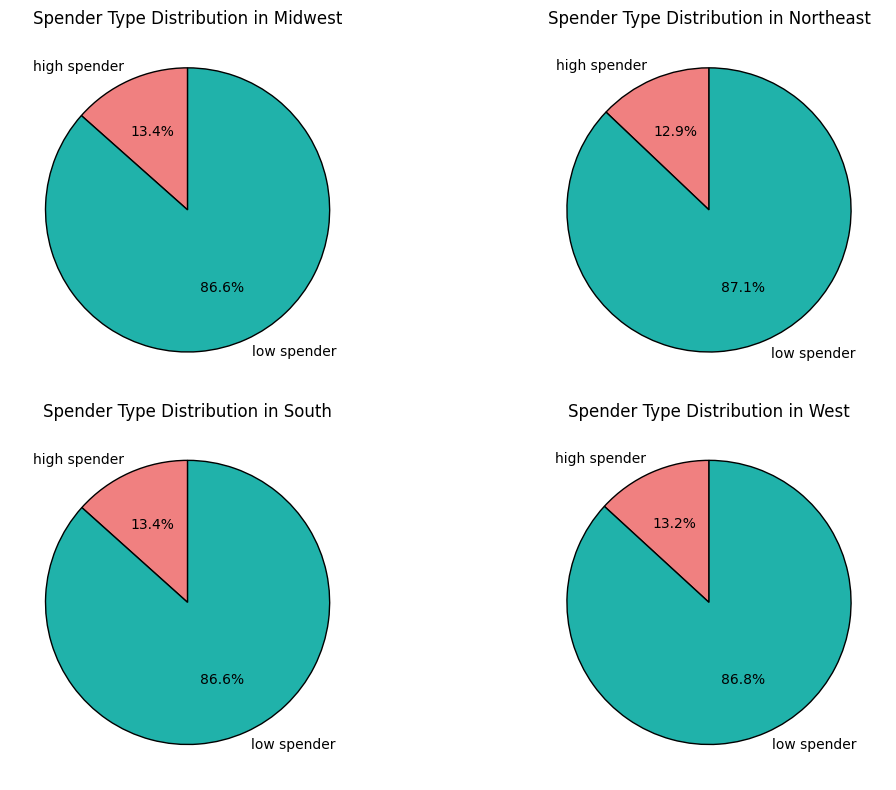

In [ ]:
# Create a crosstab to get the data for the pie charts
region_spender_cross = pd.crosstab(df['region'], df['spender_type'], dropna=False)

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the data in each subplot
regions = region_spender_cross.index

# Iterate through regions and plot pie charts
for i, region in enumerate(regions):
    row = i // 2  # Calculate row index
    col = i % 2   # Calculate column index
    ax = axes[row, col]  # Get the current subplot

    # Plot pie chart for the current region
    region_spender_cross.loc[region].plot.pie(ax=ax, autopct='%1.1f%%', startangle=90,
                                              colors=['lightcoral', 'lightseagreen', 'cornflowerblue', 'yellowgreen'],
                                              wedgeprops={'edgecolor': 'black'})

    # Set subplot title
    ax.set_title(f'Spender Type Distribution in {region}')
    ax.set_ylabel('')  # Remove y-axis label

# Adjust spacing between subplots
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '5j_region_by_spender_pie.png' ), dpi=500 , bbox_inches='tight')

#### *5k. Region vs income status - Bar*

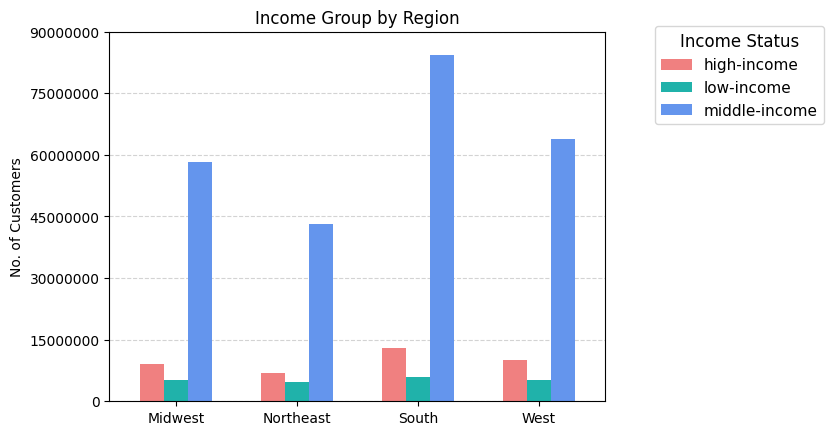

In [ ]:
# Create crosstab: loyalty with age group
income_region_cross_bar = pd.crosstab(df['region'],df['income_group'], dropna = False)

# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
income_region_bar = income_region_cross_bar.plot.bar(width=0.6,color=colors)

# Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Income Status', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Income Group by Region')
plt.xlabel('')
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0,10000000,1500000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,100000000,15000000)])
plt.xticks(rotation=0)

# Export the figure

plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10','5k_region_by_income_bar.png'), dpi=300, bbox_inches= 'tight')

#### *5h. Region vs age group - Pie & Bar*

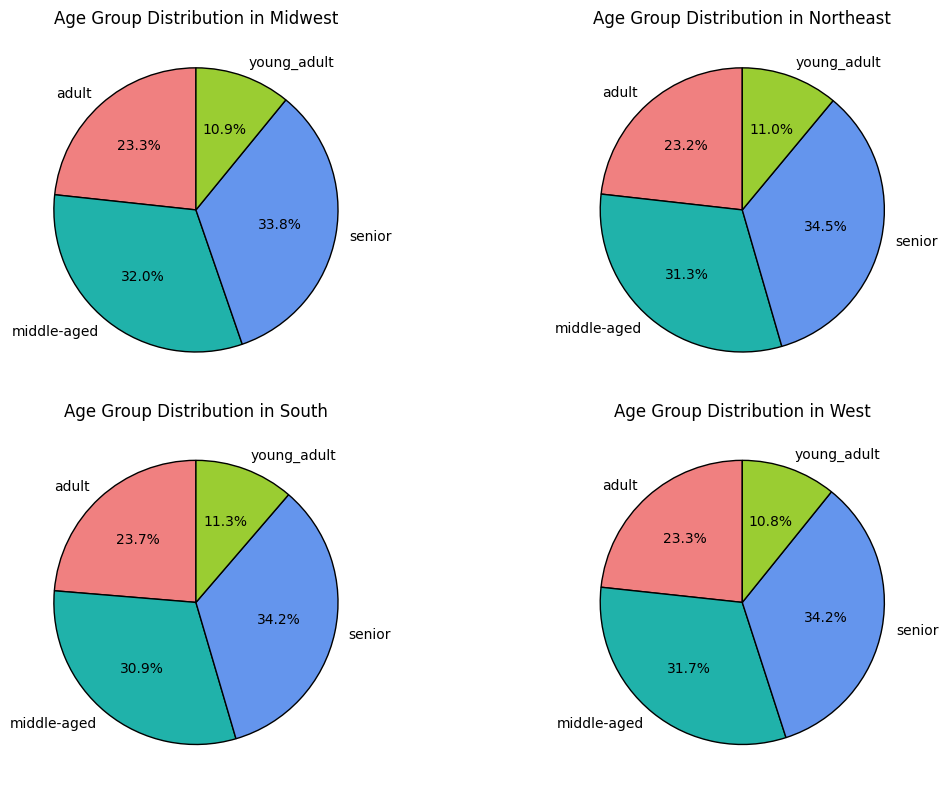

In [ ]:
# Create a crosstab to get the data for the pie charts
region_age_cross = pd.crosstab(df['region'], df['age_group'], dropna=False)

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the data in each subplot
regions = region_age_cross.index

# Iterate through regions and plot pie charts
for i, region in enumerate(regions):
    row = i // 2  # Calculate row index
    col = i % 2   # Calculate column index
    ax = axes[row, col]  # Get the current subplot

    # Plot pie chart for the current region
    region_age_cross.loc[region].plot.pie(ax=ax, autopct='%1.1f%%', startangle=90,
                                              colors=['lightcoral', 'lightseagreen', 'cornflowerblue', 'yellowgreen'],
                                              wedgeprops={'edgecolor': 'black'})

    # Set subplot title
    ax.set_title(f'Age Group Distribution in {region}')
    ax.set_ylabel('')  # Remove y-axis label

# Adjust spacing between subplots
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '5L_region_by_age_pie.png' ), dpi=500 , bbox_inches='tight')

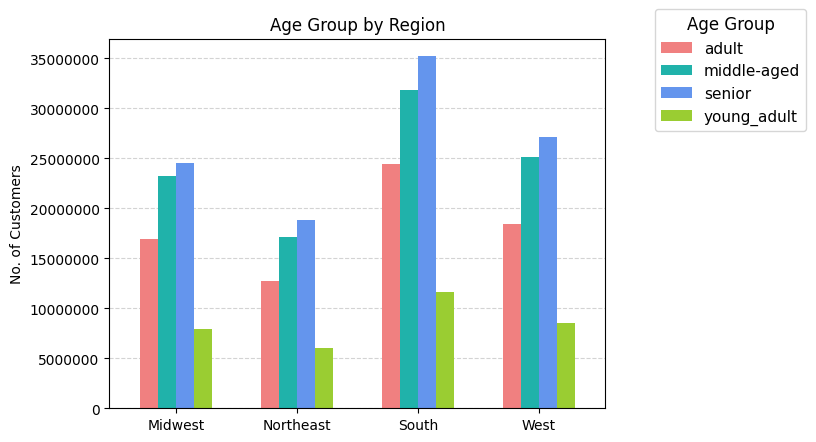

In [ ]:
# Create crosstab: loyalty with age group
age_region_cross_bar = pd.crosstab(df['region'],df['age_group'], dropna = False)

# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
age_region_bar = age_region_cross_bar.plot.bar(width=0.6,color=colors)

# Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Age Group', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Age Group by Region')
plt.xlabel('')
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0,4000000,500000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,40000000,5000000)])
plt.xticks(rotation=0)

# Export the figure

plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10','5L_region_by_age_bar.png'), dpi=300, bbox_inches= 'tight')

#### *5m. Region vs family status - Bar*

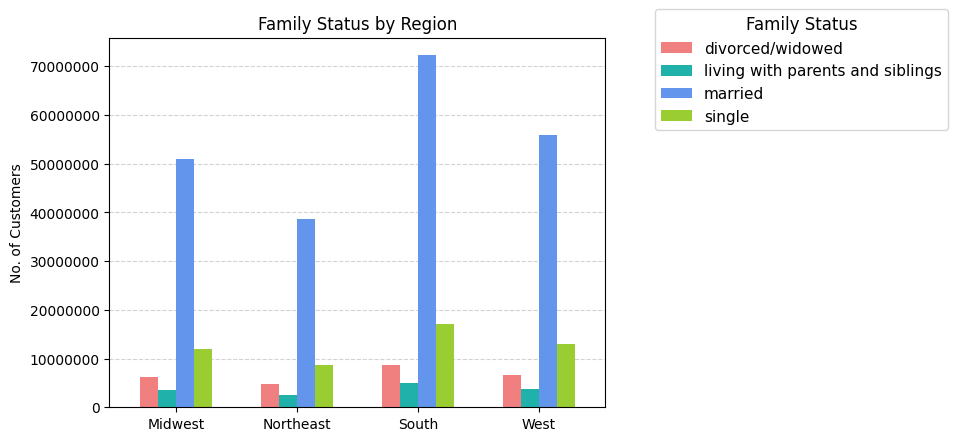

In [ ]:
# Create crosstab: loyalty with age group
region_family_cross_bar = pd.crosstab(df['region'],df['marital_status'], dropna = False)

# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
family_region_bar = region_family_cross_bar.plot.bar(width=0.6,color=colors)

# Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Family Status', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Family Status by Region')
plt.xlabel('')
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0,8000000,1000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,80000000,10000000)])
plt.xticks(rotation=0)

# Export the figure

plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10','5m_region_by_marital_bar.png'), dpi=300, bbox_inches= 'tight')

#### *5n. Region vs dependant status - Bar*

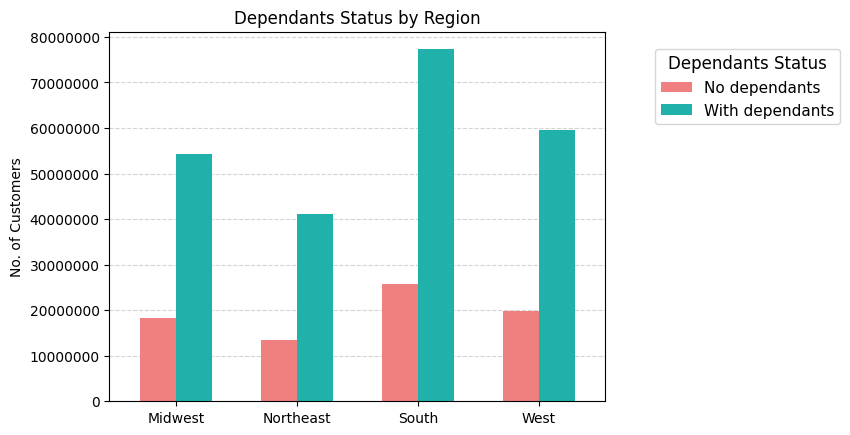

In [ ]:
# Create crosstab: loyalty with age group
region_depend_cross_bar = pd.crosstab(df['region'],df['dependants_flag'], dropna = False)

# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
region_depend_bar = region_depend_cross_bar.plot.bar(width=0.6,color=colors)

# Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Dependants Status', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Dependants Status by Region')
plt.xlabel('')
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0,9000000,1000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,90000000,10000000)])
plt.xticks(rotation=0)

# Export the figure

plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10','5n_region_by_depend_bar.png'), dpi=300, bbox_inches= 'tight')

#### *5o. Revenue by region - Pie*

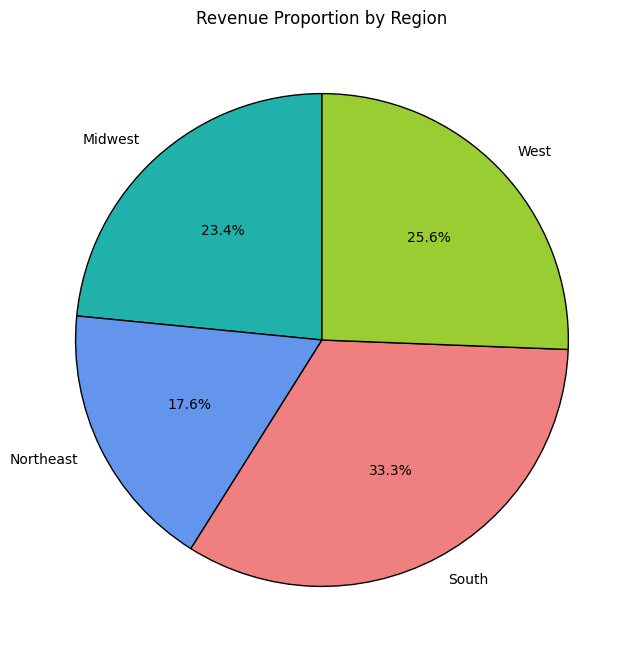

In [ ]:
# Set up color palette
colors = ['lightseagreen','cornflowerblue','lightcoral','yellowgreen','peachpuff']

# Calculate order volume for each income group
total_revenue_by_region = cus_profile.groupby('region')['payment_per_order'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))

# Access the values of the series using .values instead of indexing with a column name
plt.pie(total_revenue_by_region.values,
        labels=total_revenue_by_region.index, # Use .index to get the income groups
        autopct='%1.1f%%', startangle=90,wedgeprops={'edgecolor':'black'},colors=colors)

# Customize the chart
plt.title('Revenue Proportion by Region')

# Export the pie
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '5o_revenue_by_region_pie.png' ), dpi=300 , bbox_inches='tight')

### 6.Consumer Profile: infrequent/ occasional/ reucurring consumer

#### *6a. Consumer profile distribution - Pie*

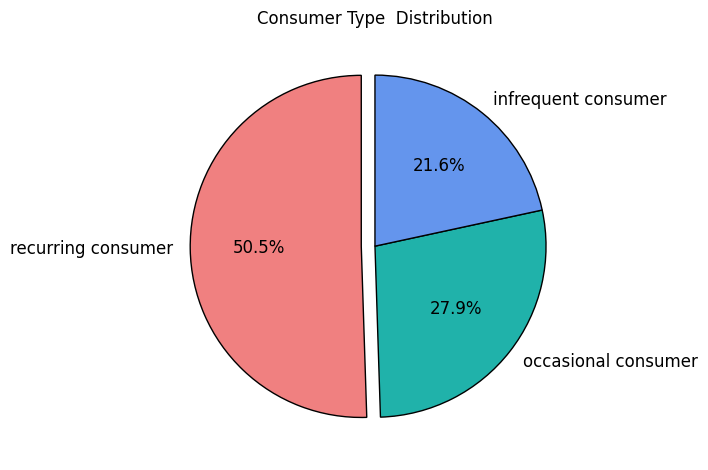

In [ ]:
# Set up color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']
explode = [0.08 , 0, 0 ]

# Plot a pie
consumer_distribution_pie = df['consumer_type'].value_counts(dropna=False).plot.pie(
    autopct='%1.1f%%', wedgeprops={'edgecolor':'black'},
    explode = explode,
    startangle=90,fontsize=12, colors=colors)

# Formatting
plt.ylabel('')
plt.title('Consumer Type  Distribution')
plt.tight_layout()

# Export the chart
consumer_distribution_pie.figure.savefig(os.path.join(
    path, '04 Analysis','Visualizations', '4.10', '6a_consumer_distribution_pie.png'), dpi=300 , bbox_inches='tight')

#### *6b. Usage frequency and average expenditure by consumer type*

In [ ]:
cus_profile.groupby('consumer_type').agg({'days_since_last_order': ['min' , 'max' , 'mean'] , 'payment_per_order': ['min', 'max', 'mean']})

days_since_last_order                  payment_per_order  \
                                      min   max       mean               min   
consumer_type                                                                  
infrequent consumer                   0.0  30.0  17.199536               1.0   
occasional consumer                   0.0  30.0  12.443921               1.0   
recurring consumer                    0.0  30.0   8.996214               1.0   

                                              
                             max        mean  
consumer_type                                 
infrequent consumer  1834.390625   55.383479  
occasional consumer  2332.757812   64.415706  
recurring consumer   8335.015625  108.966341

#### *6c. Consumer type vs average expenditure - Bar*

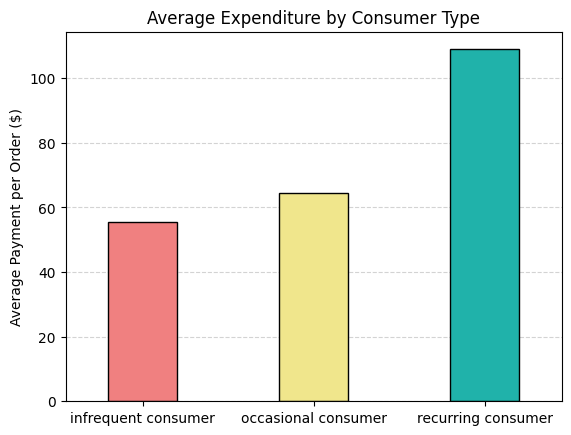

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
consumer_type_avg_expense = cus_profile.groupby(['consumer_type'])['payment_per_order'].mean()
consumer_type_avg_expense.plot.bar(edgecolor='black',width=0.4, color=colors)


# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Formatting
plt.title('Average Expenditure by Consumer Type')
plt.ylabel('Average Payment per Order ($)')
plt.xlabel('',weight='black')
plt.xticks(rotation=0)
plt.yticks(fontsize=10)

# Export the bar chart

plt.savefig(os.path.join(
    path,'04 Analysis' , 'Visualizations' , '4.10', '6c_avg_expense_by_consumer_type.png') , dpi=300, bbox_inches='tight')

#### *6d. Consumer type vs order volume - Bar*

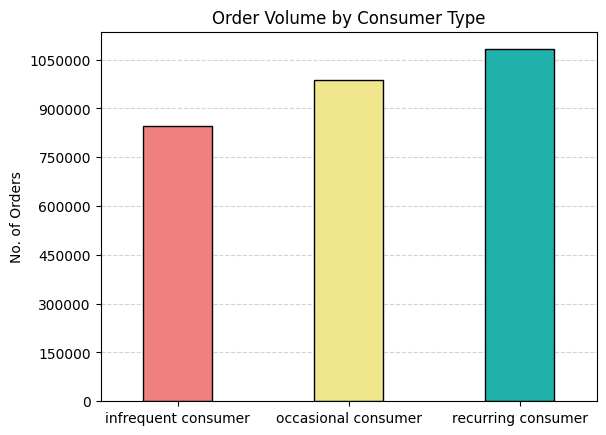

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
total_orders_by_consumer_type = cus_profile['consumer_type'].value_counts(
    dropna=False).sort_index().plot.bar(width=0.4,edgecolor='black',color=colors)

# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Formatting
plt.yticks(np.arange(0,1200000,150000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,1200000,150000)])
plt.xticks(rotation=0)
plt.title('Order Volume by Consumer Type')
plt.ylabel('No. of Orders')
plt.xlabel('',weight='black')

# Export the bar chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '6d_order_volume_by_consumer_type.png' ), dpi=300, bbox_inches='tight')

#### *6e. Consumer type vs product price range - Bar*

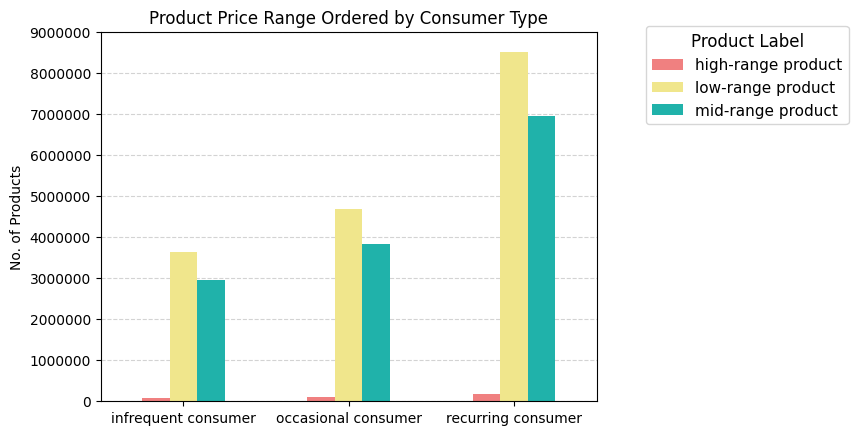

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
consumer_type_price_range_bar = pd.crosstab(df['consumer_type'],df['price_range'], dropna = False).plot.bar(color=colors)

# Legend setting
leg = plt.legend(loc=(1.1,0.75),title='Product Label',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Product Price Range Ordered by Consumer Type')
plt.ylabel('No. of Products')
plt.xlabel('')
plt.xticks(rotation=0)
plt.yticks(np.arange(0,10000000,1000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,10000000,1000000)])
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Export the bar chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '6e_consumer_type_price_range_bar.png' ), dpi=300 , bbox_inches='tight')

#### *6f. Consumer type vs region- Bar*

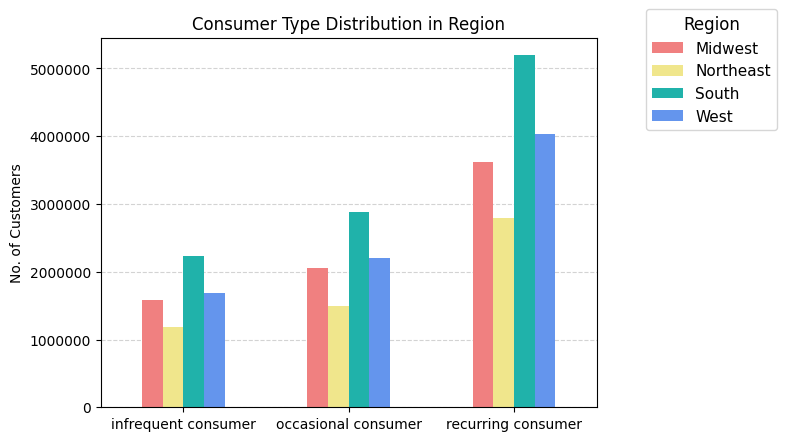

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
consumer_type_region_bar = pd.crosstab(df['consumer_type'],df['region'], dropna = False).plot.bar(color=colors)

# Legend setting
leg = plt.legend(loc=(1.1,0.75),title='Region',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Consumer Type Distribution in Region')
plt.ylabel('No. of Customers')
plt.xlabel('')
plt.xticks(rotation=0)
plt.yticks(np.arange(0,6000000,1000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,6000000,1000000)])
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Export the bar chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '6f_consumer_type_region_bar.png' ), dpi=300 , bbox_inches='tight')

#### *6g. Consumer type vs income status - Bar*

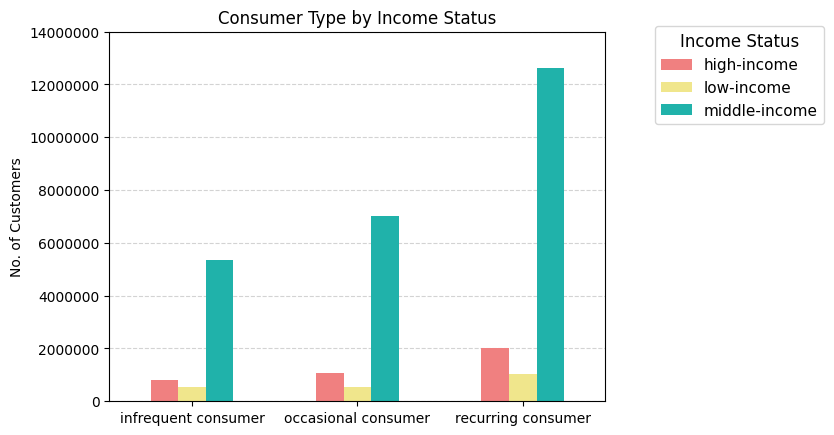

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
consumer_type_income_bar = pd.crosstab(df['consumer_type'],df['income_group'], dropna = False).plot.bar(color=colors)

# Legend setting
leg = plt.legend(loc=(1.1,0.75),title='Income Status',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Consumer Type by Income Status')
plt.ylabel('No. of Customers')
plt.xlabel('')
plt.xticks(rotation=0)
plt.yticks(np.arange(0,15000000,2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,2000000)])
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Export the bar chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10','6g_consumer_type_income_bar.png' ), dpi=300 , bbox_inches='tight')

#### *6h. Consumer type vs order frequency - Bar*

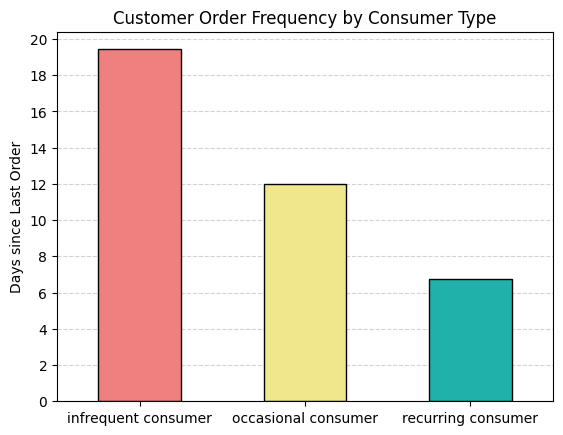

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
consumer_avg_usage_bar =df.groupby('consumer_type')['days_since_last_order'].mean().plot.bar(
    edgecolor='black',legend=False,width=0.5,color=colors)

# Formatting
plt.title('Customer Order Frequency by Consumer Type')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Days since Last Order')
plt.yticks(np.arange(0,21,2),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,21,2)])
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'lightgray', linestyle = 'dashed')

# Export the bar
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '6h_order_frequency_by_consumer_bar.png'), dpi=300 , bbox_inches='tight')

#### *6i. Revenue by consumer type - Pie*

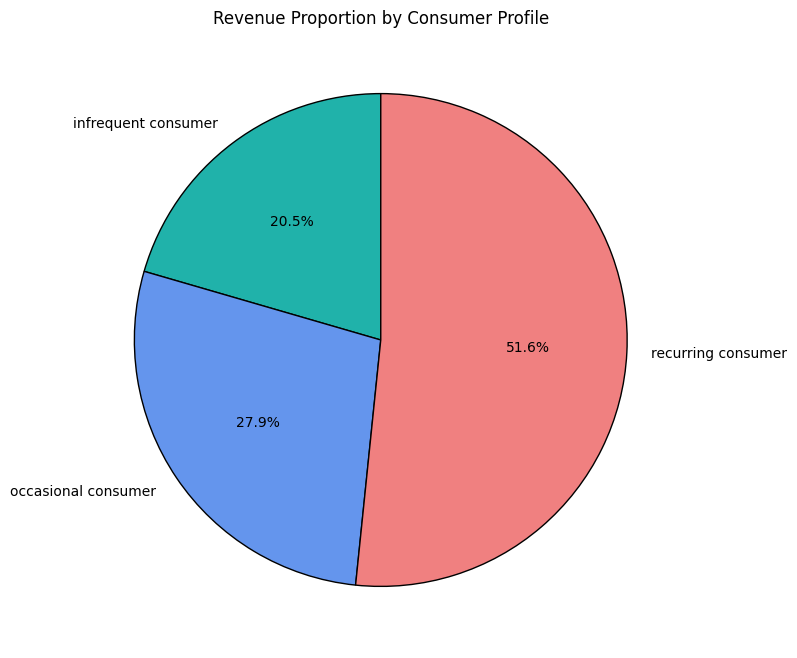

In [ ]:
# Set up color palette
colors = ['lightseagreen','cornflowerblue','lightcoral','yellowgreen','peachpuff']

# Calculate order volume for each income group
total_revenue_by_cons = cus_profile.groupby('consumer_type')['payment_per_order'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))

# Access the values of the series using .values instead of indexing with a column name
plt.pie(total_revenue_by_cons.values,
        labels=total_revenue_by_cons.index, # Use .index to get the income groups
        autopct='%1.1f%%', startangle=90,wedgeprops={'edgecolor':'black'},colors=colors)

# Customize the chart
plt.title('Revenue Proportion by Consumer Profile')

# Export the pie
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '6i_revenue_by_consumer_pie.png' ), dpi=300 , bbox_inches='tight')

### 7.Product price range: high-range/ mid-range/ low-range product

#### *7a. Price range distribution - Pie*

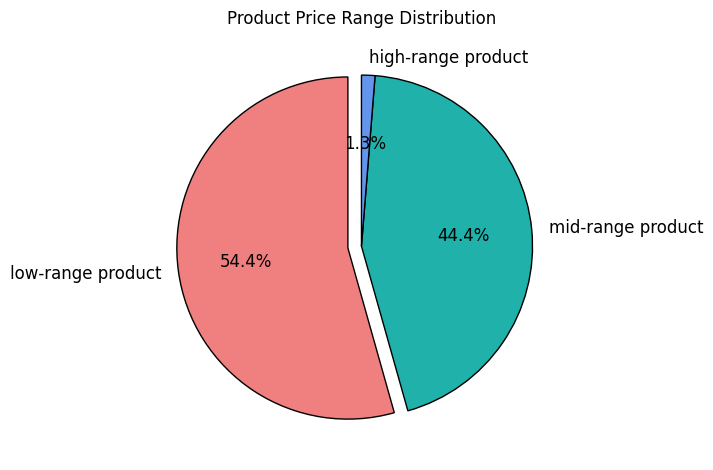

In [ ]:
# Set up color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']
explode = [0.08 , 0, 0 ]

# Plot a pie
price_range_distribution_pie = df['price_range'].value_counts(dropna=False).plot.pie(
    autopct='%1.1f%%', wedgeprops={'edgecolor':'black'},
    explode = explode,
    startangle=90,fontsize=12, colors=colors)

# Formatting
plt.ylabel('')
plt.title('Product Price Range Distribution')
plt.tight_layout()

# Export the chart
price_range_distribution_pie.figure.savefig(os.path.join(
    path, '04 Analysis','Visualizations', '4.10', '7a_price_range_distribution_pie.png'), dpi=300 , bbox_inches='tight')

#### *7b. Price range vs order frequency - Bar*

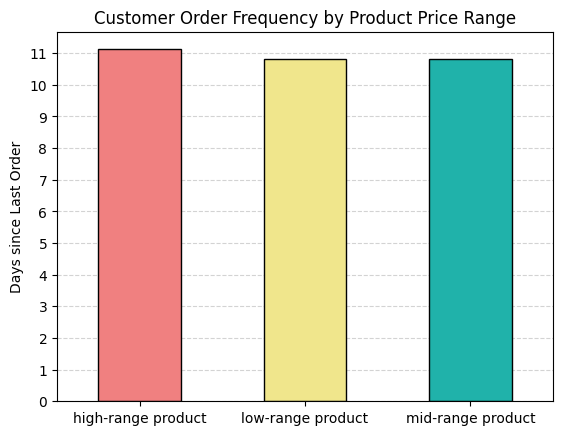

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
price_range_avg_usage_bar =df.groupby('price_range')['days_since_last_order'].mean().plot.bar(
    edgecolor='black',legend=False,width=0.5,color=colors)

# Formatting
plt.title('Customer Order Frequency by Product Price Range')
plt.xlabel('')
plt.xticks(rotation=0)
plt.yticks(np.arange(0,12,1),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,12,1)])
plt.ylabel('Days since Last Order')

plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'lightgray', linestyle = 'dashed')

# Export the bar
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '7b_order_frequency_by_price_range_bar.png'), dpi=300 , bbox_inches='tight')

#### *7c. Price range vs order volume - Bar*

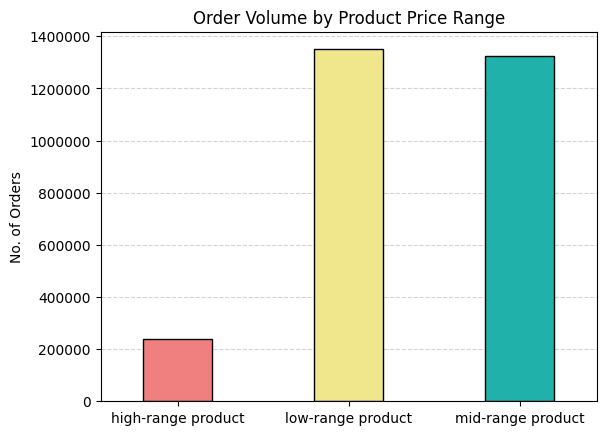

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
total_orders_by_price_range = cus_profile['price_range'].value_counts(
    dropna=False).sort_index().plot.bar(width=0.4,edgecolor='black',color=colors)

# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Formatting
plt.yticks(np.arange(0,1500000,200000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,1500000,200000)])
plt.xticks(rotation=0)
plt.title('Order Volume by Product Price Range')
plt.ylabel('No. of Orders')
plt.xlabel('',weight='black')

# Export the bar chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '7c_order_volume_by_price_range.png' ), dpi=300, bbox_inches='tight')

#### *7d. Order volume by product price range and consumer profile - Bar*

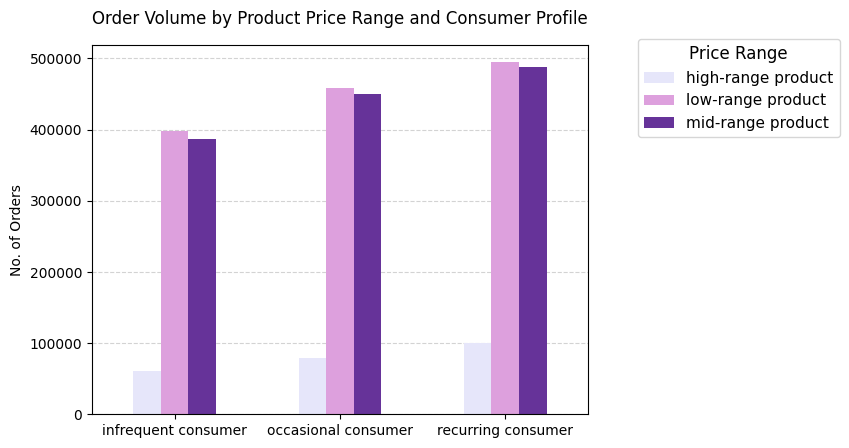

In [ ]:
# Set up color palette
colors = ['lavender','plum','rebeccapurple']

# Plot a bar
consumer_price_range_bar = cus_profile.groupby(['consumer_type', 'price_range']).size().unstack().plot.bar(color=colors)

# Legend setting
leg = plt.legend(loc=(1.1,0.75),title='Price Range',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.title('Order Volume by Product Price Range and Consumer Profile', pad=15)
plt.ylabel('No. of Orders')
plt.xlabel('',weight='black')
plt.xticks(rotation=0)
plt.yticks(np.arange(0,600000,100000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,600000,100000)])
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Export the bar
plt.savefig(os.path.join(
    path, '04 Analysis','Visualizations','4.10', '7d_order_volume_product_price_range_by_consumer_bar.png'), dpi=300 , bbox_inches='tight')

#### *7e. Price range vs age - Bar*

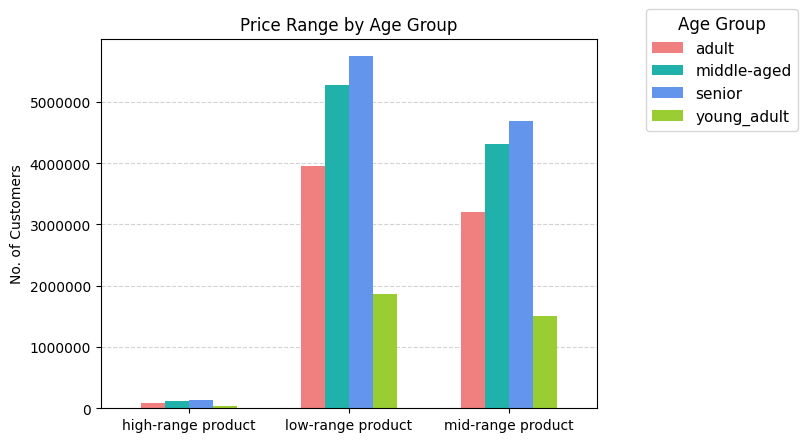

In [ ]:
# Create crosstab
price_range_age_cross = pd.crosstab(df['price_range'],df['age_group'], dropna = False)

# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
price_range_age_bar = price_range_age_cross.plot.bar(width=0.6,color=colors)

# Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Age Group', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Price Range by Age Group')
plt.xlabel('')
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0,6000000,1000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,6000000,1000000)])
plt.xticks(rotation=0)

# Export the figure

plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10','7e_price_range_age_bar.png'), dpi=300, bbox_inches= 'tight')

#### *7f. Price range vs brand loyalty - Bar*

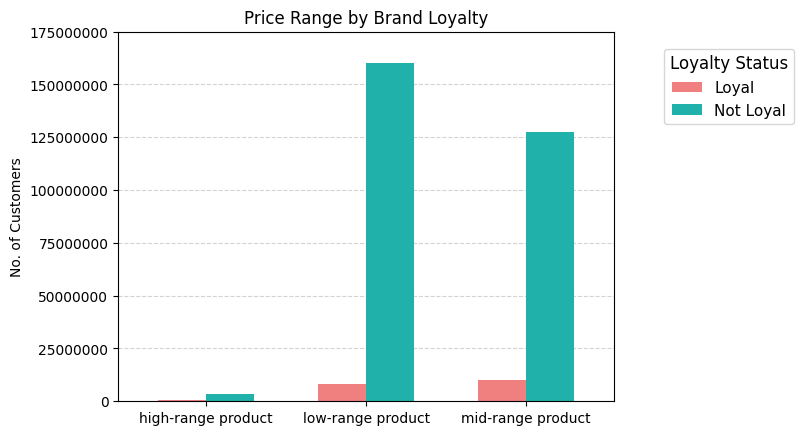

In [ ]:
# Create crosstab
price_range_loyalty_cross = pd.crosstab(df['price_range'],df['loyalty_flag'], dropna = False)

# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
price_range_loyalty_bar = price_range_loyalty_cross.plot.bar(width=0.6,color=colors)

# Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Loyalty Status', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Price Range by Brand Loyalty')
plt.xlabel('')
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0,20000000,2500000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,200000000,25000000)])
plt.xticks(rotation=0)

# Export the figure

plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10','7f_price_range_loyalty_bar.png'), dpi=300, bbox_inches= 'tight')

#### *7g. Price range vs income - Bar*

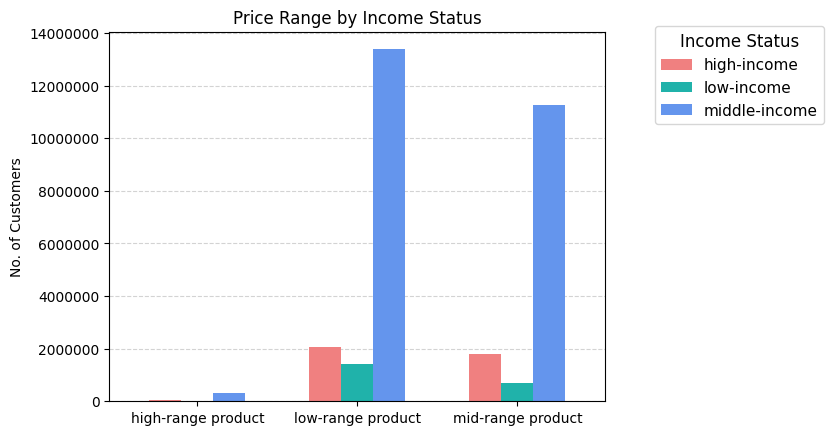

In [ ]:
# Create crosstab
price_range_income_cross = pd.crosstab(df['price_range'],df['income_group'], dropna = False)

# Set color palette
colors = ['lightcoral','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
price_range_income_bar = price_range_income_cross.plot.bar(width=0.6,color=colors)

# Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Setting legend
leg = plt.legend(loc=(1.1,0.75),title='Income Status', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')


# Formatting
plt.title('Price Range by Income Status')
plt.xlabel('')
plt.ylabel('No. of Customers')
plt.yticks(np.arange(0,15000000,2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,15000000,2000000)])
plt.xticks(rotation=0)

# Export the figure

plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10','7g_price_range_income_bar.png'), dpi=300, bbox_inches= 'tight')

#### *7h. Revenue by price range - Pie*

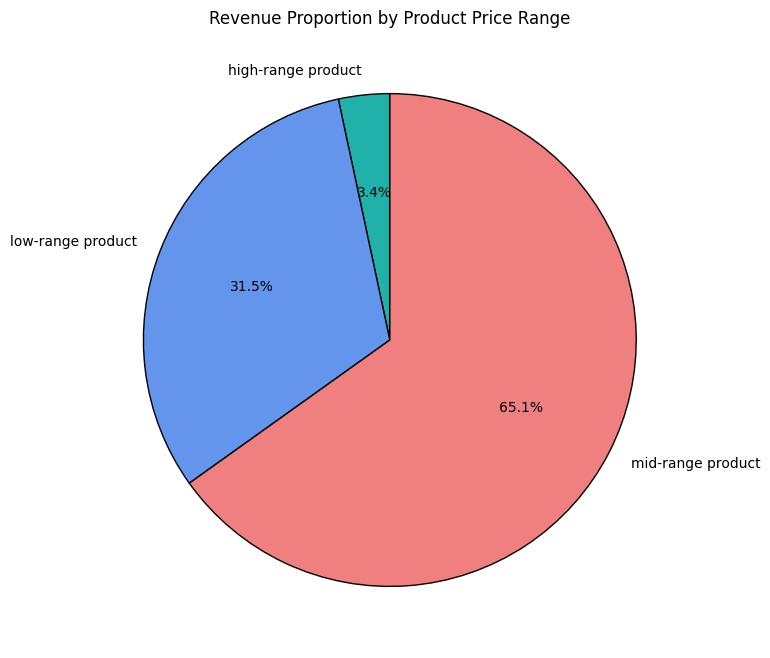

In [ ]:
# Set up color palette
colors = ['lightseagreen','cornflowerblue','lightcoral','yellowgreen','peachpuff']

# Calculate order volume for each income group
total_revenue_by_price = cus_profile.groupby('price_range')['payment_per_order'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))

# Access the values of the series using .values instead of indexing with a column name
plt.pie(total_revenue_by_price.values,
        labels=total_revenue_by_price.index, # Use .index to get the income groups
        autopct='%1.1f%%', startangle=90,wedgeprops={'edgecolor':'black'},colors=colors)

# Customize the chart
plt.title('Revenue Proportion by Product Price Range')

# Export the pie
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '7h_revenue_by_price_rangel_pie.png' ), dpi=300 , bbox_inches='tight')

### 8.Popularity of Product Department

#### *8a. Top 10 product sales by department - Bar*

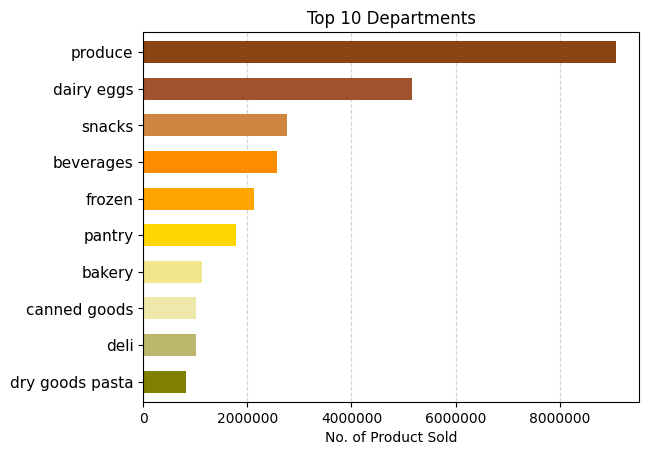

In [ ]:
# Set up color palette
colors = ['olive','darkkhaki','palegoldenrod','khaki','gold','orange','darkorange','peru','sienna','saddlebrown']

# Plot a bar
top_10_dept = df['department'].value_counts(dropna=False, ascending=False).head(10)
top_10_dept_bar = top_10_dept.sort_values().plot.barh(width=0.6, color=colors)

# Formatting

plt.title('Top 10 Departments')
plt.xlabel('No. of Product Sold')
plt.xticks(np.arange(0,10000000,2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,10000000,2000000)])
plt.ylabel('')
plt.yticks(fontsize=11)
plt.gca().set_axisbelow(True)
plt.grid(axis = 'x', color = 'lightgray', linestyle = 'dashed')

# Export the figure

plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10', '8a_Top_10_department_sales.png'), dpi=300, bbox_inches='tight')

#### *8b. Top 3 department sales by region - Bar/ Pie*

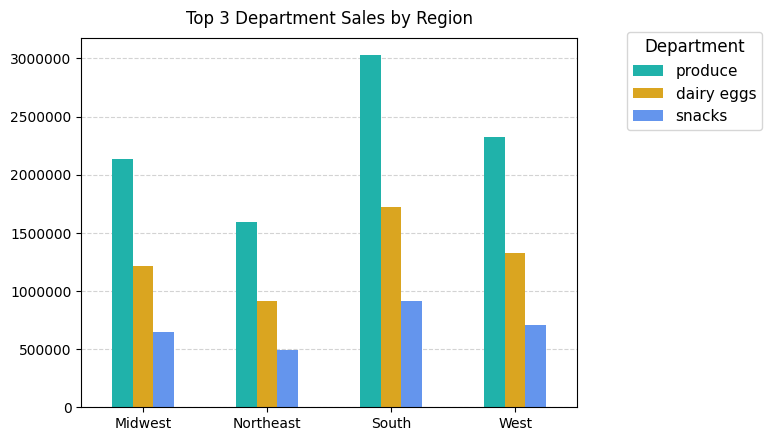

In [ ]:
# Set up color palette
colors = ['lightseagreen','goldenrod','cornflowerblue','lightcoral','yellowgreen','peachpuff']


# Plot a bar
top_3_dept = df.groupby(df['region'])['department'].value_counts().groupby('region').head(3).unstack().plot.bar(
    color=colors)

# Adjust legend
leg = plt.legend(loc=(1.1,0.75),title='Department', title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.title('Top 3 Department Sales by Region',pad=10)
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('')
plt.yticks(np.arange(0,3500000,500000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,3500000,500000)])
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'lightgray', linestyle = 'dashed')

# Export the figure
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '8b_top_3_dept_by_region_bar.png'), dpi=300, bbox_inches='tight')

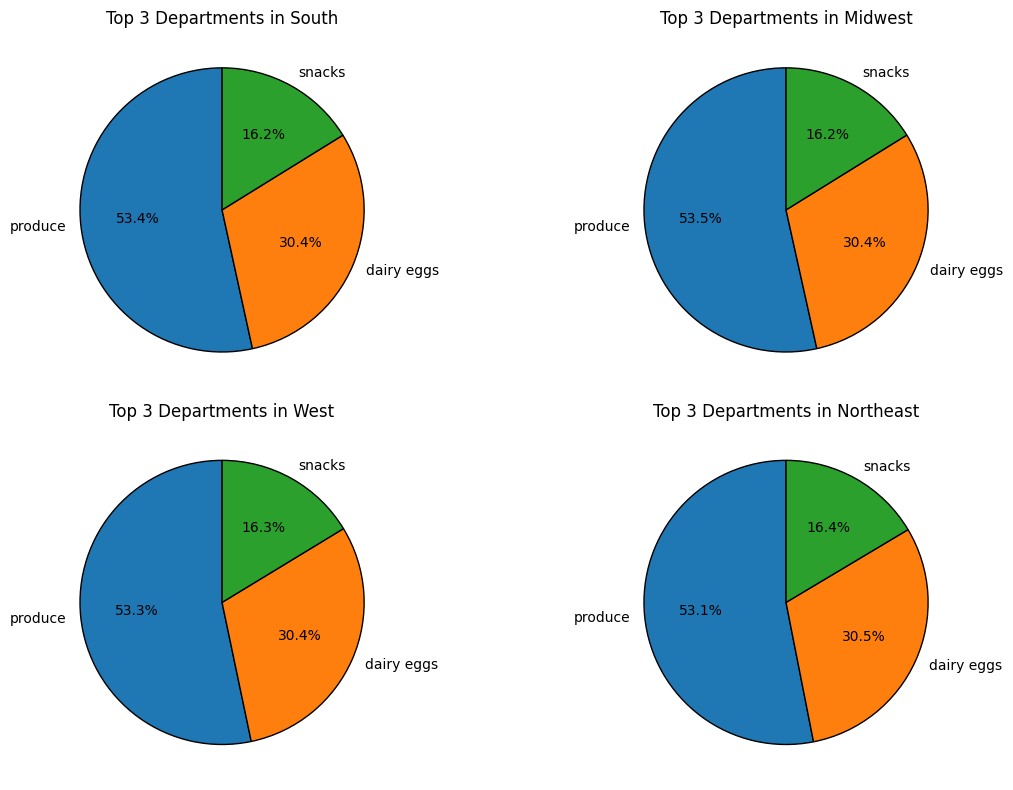

In [ ]:
# Get unique regions
regions = df['region'].unique()

# Create a figure and axes for the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten for easier iteration
axes = axes.flatten()

# Iterate through regions and plot pie charts
for i, region in enumerate(regions):
    # Filter data for the current region
    region_data = df[df['region'] == region]

    # Get top 3 departments by count in the region
    top_3_departments = region_data['department'].value_counts().nlargest(3).index

    # Filter data for the top 3 departments in the region
    top_3_data = region_data[region_data['department'].isin(top_3_departments)]

    # Count occurrences of each department in the region
    department_counts = top_3_data['department'].value_counts()

    # Plot the pie chart
    axes[i].pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'},startangle=90)
    axes[i].set_title(f'Top 3 Departments in {region}')

# Adjust layout and display
plt.tight_layout()
plt.show()

### 9.Order traffic (Day of week)

#### *9a. Busiest day of week - Histogram/Bar*

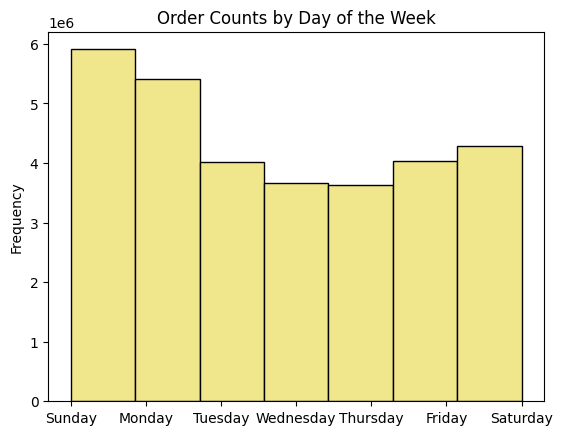

In [ ]:
# Set up color
colors = ['khaki']

# Create a histogram showing busiest days of the week
order_day_hist = df['order_day_of_the_week'].plot.hist(bins=7,edgecolor='black',color=colors)

# Formatting

plt.title('Order Counts by Day of the Week')
plt.xticks([0,1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

# Export the histogram

order_day_hist.figure.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10', '9a_busiest_days_of_week_hist.png'), dpi=300, bbox_inches='tight')

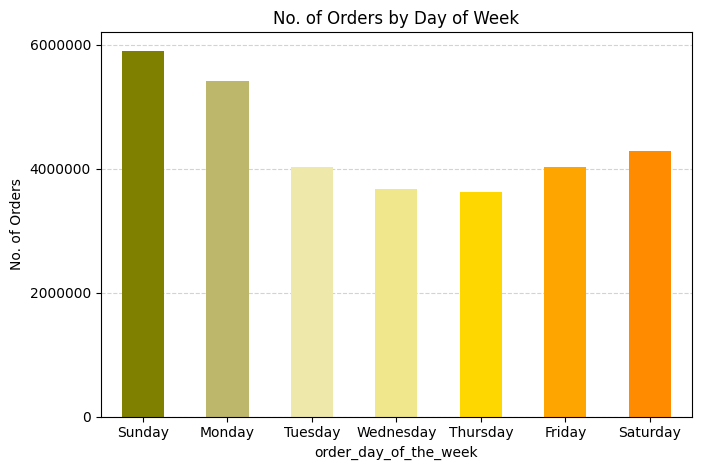

In [ ]:
# Set color palette
colors = ['olive','darkkhaki','palegoldenrod','khaki','gold','orange','darkorange','peru','sienna','saddlebrown']

# Create a bar chart showing busiest days of the week
order_day_bar = df['order_day_of_the_week'].value_counts().sort_index().plot.bar(color=colors)

# Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')


# Formatting
plt.title('No. of Orders by Day of Week')
plt.xticks(rotation=0,fontsize=10)
plt.tight_layout()
plt.ylabel('No. of Orders')
plt.yticks(np.arange(0,8000000,2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,8000000,2000000)])
plt.xticks([0,1,2,3,4,5,6],['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday'], rotation=0)

# Export the bar
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10', '9a_busiest_days_of_week_bar.png'), dpi=300, bbox_inches='tight')

#### *9b. Order volume in DOW by region - Line*

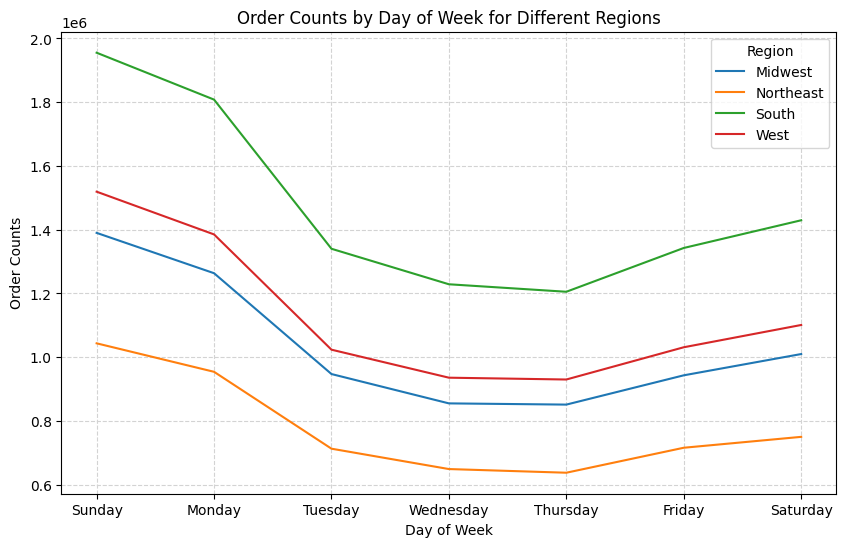

In [ ]:
# Group data by region and day of week, and count orders
region_day_counts = df.groupby(['region', 'order_day_of_the_week'])['order_id'].count().reset_index()

# Rename the 'order_id' column to 'order_counts'
region_day_counts.rename(columns={'order_id': 'order_counts'}, inplace=True)

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_day_of_the_week', y='order_counts', hue='region', data=region_day_counts)

# Customize the format
plt.title('Order Counts by Day of Week for Different Regions')
plt.xlabel('Day of Week')
plt.xticks([0,1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday', 'Saturday'])
plt.ylabel('Order Counts')
plt.legend(title='Region')
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')

# Export the plot
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10', '9b_order_volume_DOW_by_region_line.png'), dpi=300, bbox_inches='tight')

#### *9c. Order volume in DOW by age - Line*

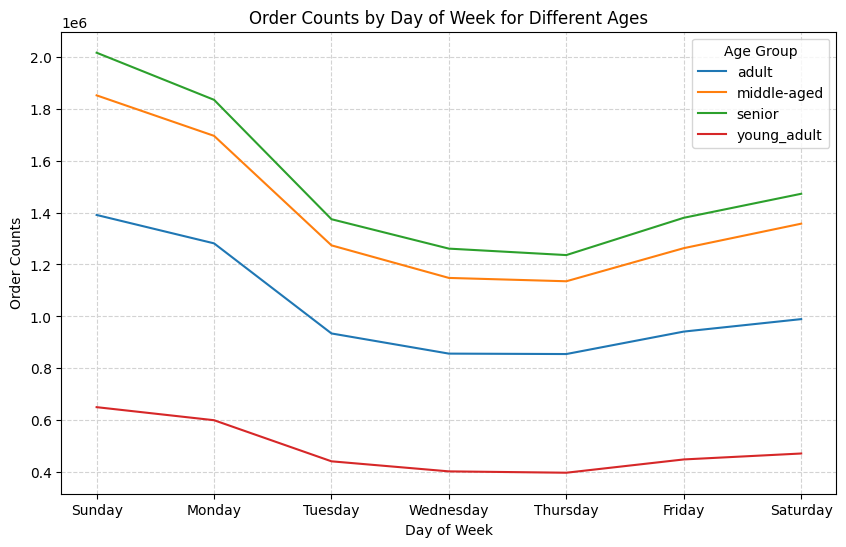

In [ ]:
# Group data by age and day of week, and count orders
age_day_counts = df.groupby(['age_group', 'order_day_of_the_week'])['order_id'].count().reset_index()

# Rename the 'order_id' column to 'order_counts'
age_day_counts.rename(columns={'order_id': 'order_counts'}, inplace=True)

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_day_of_the_week', y='order_counts', hue='age_group', data=age_day_counts)

# Customize the format
plt.title('Order Counts by Day of Week for Different Ages')
plt.xlabel('Day of Week')
plt.xticks([0,1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday', 'Saturday'])
plt.ylabel('Order Counts')
plt.legend(title='Age Group')
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')

# Export the plot
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10', '9c_order_volume_DOW_by_age_line.png'), dpi=300, bbox_inches='tight')

#### *9d. Order volume in DOW by income - Line*

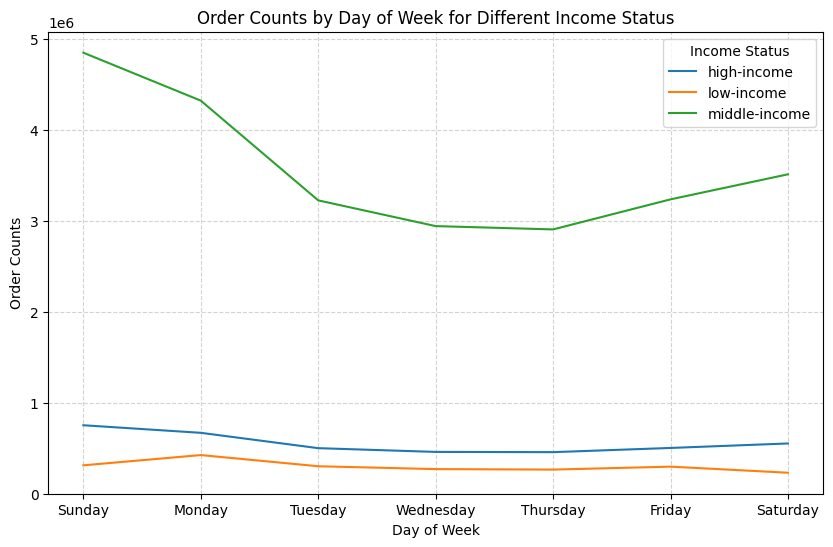

In [ ]:
# Group data by income and day of week, and count orders
income_day_counts = df.groupby(['income_group', 'order_day_of_the_week'])['order_id'].count().reset_index()

# Rename the 'order_id' column to 'order_counts'
income_day_counts.rename(columns={'order_id': 'order_counts'}, inplace=True)

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_day_of_the_week', y='order_counts', hue='income_group', data=income_day_counts)

# Customize the format
plt.title('Order Counts by Day of Week for Different Income Status')
plt.xlabel('Day of Week')
plt.xticks([0,1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday', 'Saturday'])
plt.ylabel('Order Counts')
plt.legend(title='Income Status')
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')

# Export the plot
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10', '9d_order_volume_DOW_by_income_line.png'), dpi=300, bbox_inches='tight')

#### *9e. Order volume in DOW by family status - Line*

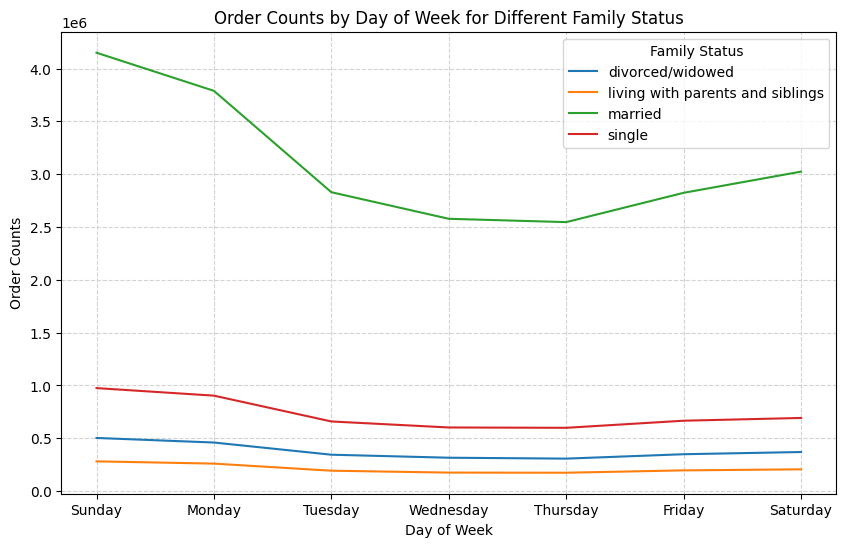

In [ ]:
# Group data
marital_day_counts = df.groupby(['marital_status', 'order_day_of_the_week'])['order_id'].count().reset_index()

# Rename the 'order_id' column to 'order_counts'
marital_day_counts.rename(columns={'order_id': 'order_counts'}, inplace=True)

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_day_of_the_week', y='order_counts', hue='marital_status', data=marital_day_counts)

# Customize the format
plt.title('Order Counts by Day of Week for Different Family Status')
plt.xlabel('Day of Week')
plt.xticks([0,1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday', 'Saturday'])
plt.ylabel('Order Counts')
plt.legend(title='Family Status')
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')

# Export the plot
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10', '9e_order_volume_DOW_by_marital_line.png'), dpi=300, bbox_inches='tight')

#### *9f. Order volume in DOW by dependant status - Line*

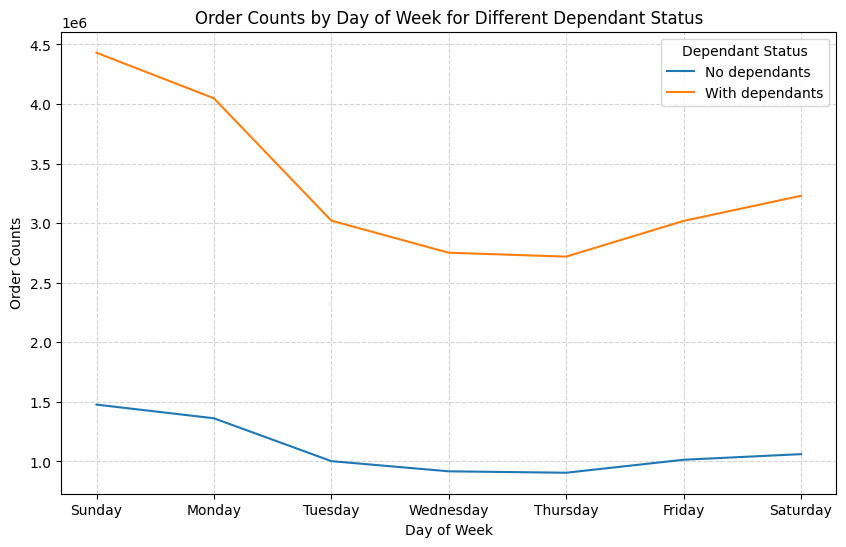

In [ ]:
# Group data
depend_day_counts = df.groupby(['dependants_flag', 'order_day_of_the_week'])['order_id'].count().reset_index()

# Rename the 'order_id' column to 'order_counts'
depend_day_counts.rename(columns={'order_id': 'order_counts'}, inplace=True)

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_day_of_the_week', y='order_counts', hue='dependants_flag', data=depend_day_counts)

# Customize the format
plt.title('Order Counts by Day of Week for Different Dependant Status')
plt.xlabel('Day of Week')
plt.xticks([0,1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday', 'Saturday'])
plt.ylabel('Order Counts')
plt.legend(title='Dependant Status')
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')

# Export the plot
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10', '9f_order_volume_DOW_by_dependant_line.png'), dpi=300, bbox_inches='tight')

#### *9g. Order volume in DOW by brand loyalty - Line*

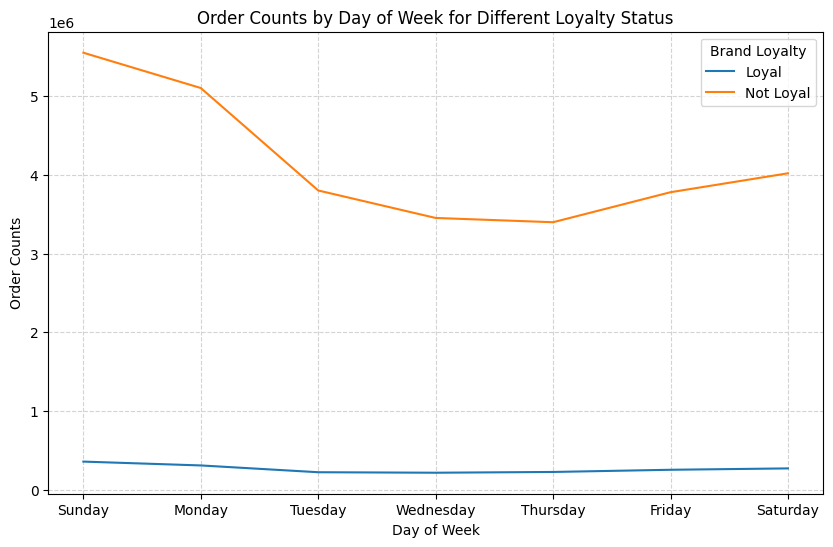

In [ ]:
# Group data
loyalty_day_counts = df.groupby(['loyalty_flag', 'order_day_of_the_week'])['order_id'].count().reset_index()

# Rename the 'order_id' column to 'order_counts'
loyalty_day_counts.rename(columns={'order_id': 'order_counts'}, inplace=True)

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_day_of_the_week', y='order_counts', hue='loyalty_flag', data=loyalty_day_counts)

# Customize the format
plt.title('Order Counts by Day of Week for Different Loyalty Status')
plt.xlabel('Day of Week')
plt.xticks([0,1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday', 'Saturday'])
plt.ylabel('Order Counts')
plt.legend(title='Brand Loyalty')
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')

# Export the plot
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10', '9g_order_volume_DOW_by_loyalty_line.png'), dpi=300, bbox_inches='tight')

#### *9h. Order volume in DOW by product price range - Line*

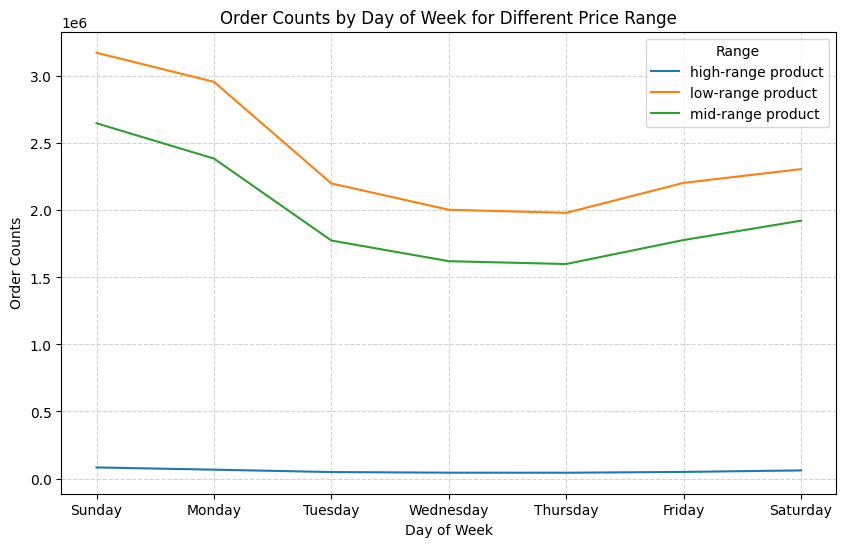

In [ ]:
# Group data
range_day_counts = df.groupby(['price_range', 'order_day_of_the_week'])['order_id'].count().reset_index()

# Rename the 'order_id' column to 'order_counts'
range_day_counts.rename(columns={'order_id': 'order_counts'}, inplace=True)

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_day_of_the_week', y='order_counts', hue='price_range', data=range_day_counts)

# Customize the format
plt.title('Order Counts by Day of Week for Different Price Range')
plt.xlabel('Day of Week')
plt.xticks([0,1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday', 'Saturday'])
plt.ylabel('Order Counts')
plt.legend(title='Range')
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')

# Export the plot
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10', '9h_order_volume_DOW_by_price_range_line.png'), dpi=300, bbox_inches='tight')

#### *9i. Order volume in DOW by spending habit - Line*

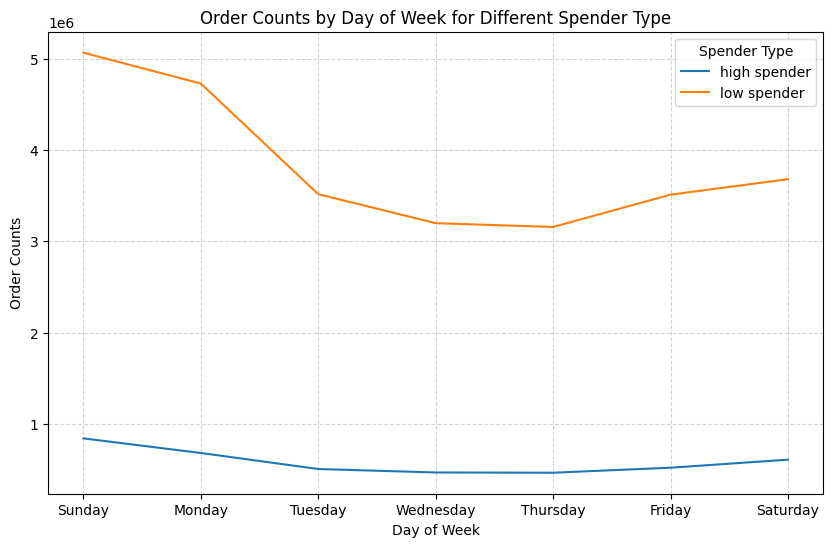

In [ ]:
# Group data
spender_day_counts = df.groupby(['spender_type', 'order_day_of_the_week'])['order_id'].count().reset_index()

# Rename the 'order_id' column to 'order_counts'
spender_day_counts.rename(columns={'order_id': 'order_counts'}, inplace=True)

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_day_of_the_week', y='order_counts', hue='spender_type', data=spender_day_counts)

# Customize the format
plt.title('Order Counts by Day of Week for Different Spender Type')
plt.xlabel('Day of Week')
plt.xticks([0,1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday', 'Saturday'])
plt.ylabel('Order Counts')
plt.legend(title='Spender Type')
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')

# Export the plot
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10', '9i_order_volume_DOW_by_spender_line.png'), dpi=300, bbox_inches='tight')

#### *9j. Order volume in DOW by consumer type - Line*

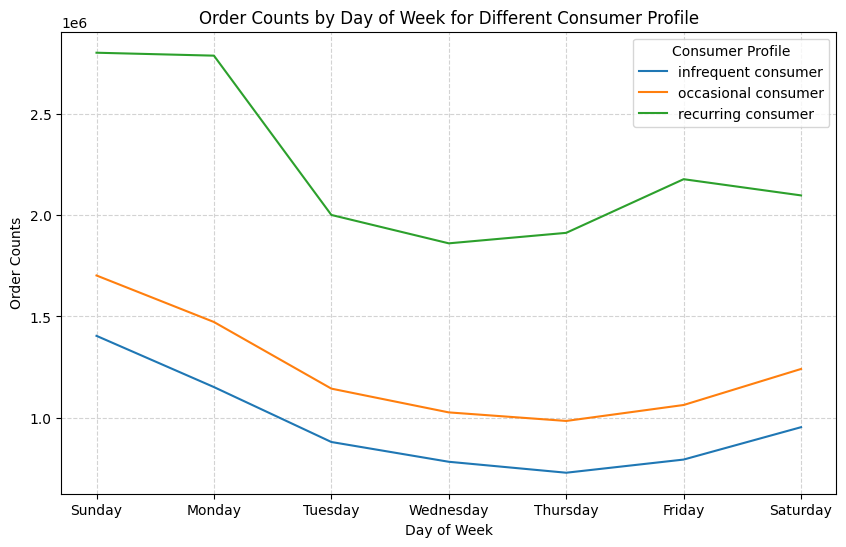

In [ ]:
# Group data
consumer_day_counts = df.groupby(['consumer_type', 'order_day_of_the_week'])['order_id'].count().reset_index()

# Rename the 'order_id' column to 'order_counts'
consumer_day_counts.rename(columns={'order_id': 'order_counts'}, inplace=True)

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_day_of_the_week', y='order_counts', hue='consumer_type', data=consumer_day_counts)

# Customize the format
plt.title('Order Counts by Day of Week for Different Consumer Profile')
plt.xlabel('Day of Week')
plt.xticks([0,1,2,3,4,5,6],['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday', 'Saturday'])
plt.ylabel('Order Counts')
plt.legend(title='Consumer Profile')
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')

# Export the plot
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10', '9j_order_volume_DOW_by_consumer_line.png'), dpi=300, bbox_inches='tight')

### 10.Order traffic (Hour of day)

#### *10a. Busiest hour of day - Histogram*

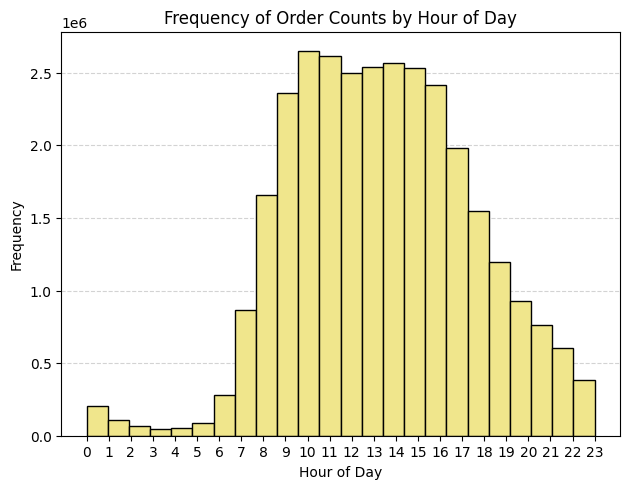

In [ ]:
# Set up color
colors = ['khaki']

# Create a bar chart showing busiest days of the week
order_hour_hist = df['order_hour_of_day'].plot.hist(bins=24, edgecolor='black',color=colors)

# Set up grid lines behind

plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Formatting

plt.title('Frequency of Order Counts by Hour of Day')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.tight_layout()
plt.ylabel('Frequency')
plt.xlabel('Hour of Day')

# Export the figure

order_hour_hist.figure.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10', '10a_busiest_hour_of_day_hist.png'), dpi=300, bbox_inches='tight')

#### *10b. Total expenditure on the hour of the day - Line*

In [ ]:
# Sampling data to plot a line chart
np.random.seed(4)

# Divide the dataframe into 2 parts with equal chance in value
dev = np.random.rand(len(df))<= 0.7

# Store 70% of the sample in the dataframe big
big = df [dev]

# Store 30% of the sample in the dataframe small
small = df [~dev]

# Cross check the output
len(df)

30959687

In [ ]:
# Confirm the length is identical
len(big) + len(small)

30959687

In [ ]:
# Group
df_2 = small.groupby(['order_hour_of_day'])['prices'].sum().reset_index()
df_2.head(4)


order_hour_of_day         prices
0                  0  488248.443359
1                  1  256606.322266
2                  2  154588.127930
3                  3  115033.049805

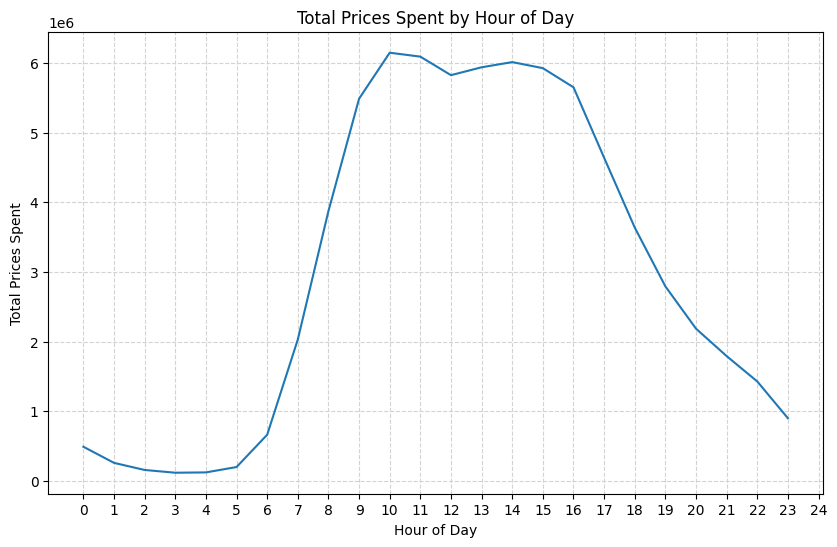

In [ ]:
# Create the line chart
plt.figure(figsize=(10, 6))

# Plot a line chart using the small sample
line = sns.lineplot(data=df_2, x = 'order_hour_of_day' , y = 'prices')

# Formatting
plt.xticks(np.arange(0,25,1),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,25,1)])
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')
plt.xlabel('Hour of Day')
plt.ylabel('Total Prices Spent')
plt.title('Total Prices Spent by Hour of Day')

# Export the chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '10b_total_expenditure_hour_of_day_line.png' ), dpi=300 , bbox_inches='tight')

#### *10c. Total expenditure on the HOD by region - Line*

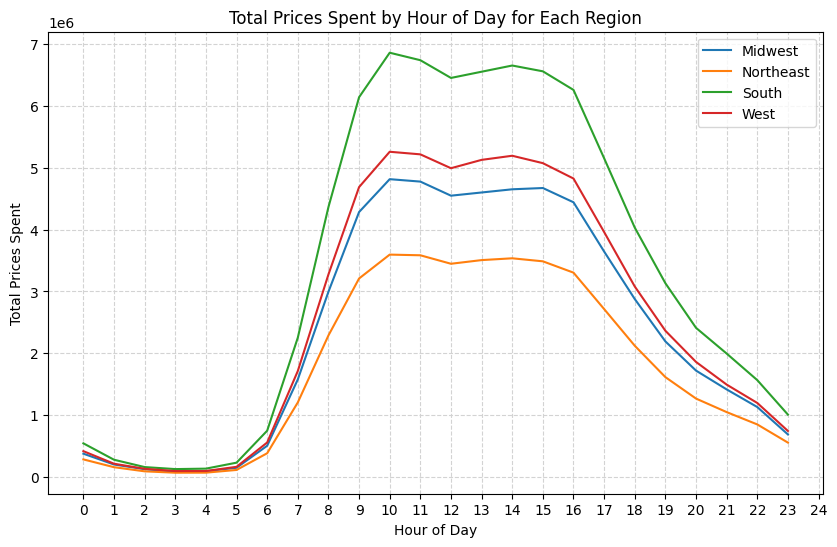

In [ ]:
# Group databy region and hour of day, and sum the prices
region_hour_prices = df.groupby(['region','order_hour_of_day'])['prices'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))

# Iterate through unique regions
for region in region_hour_prices['region'].unique():
    # Filter data for the current region
    region_data = region_hour_prices[region_hour_prices['region'] == region]
    # Plot the line for the current region
    plt.plot(region_data['order_hour_of_day'], region_data['prices'], label=f'{region}',linewidth=1.5)

# Customizing chart formatting
plt.title('Total Prices Spent by Hour of Day for Each Region')
plt.xlabel('Hour of Day')
plt.ylabel('Total Prices Spent')
plt.legend()
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')
plt.xticks(np.arange(0,25,1),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,25,1)])

# Export the chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '10c_total_expenditure_HOD_by_region_line.png' ), dpi=300 , bbox_inches='tight')

#### *10d. Total expenditure on the HOD by age - Line*

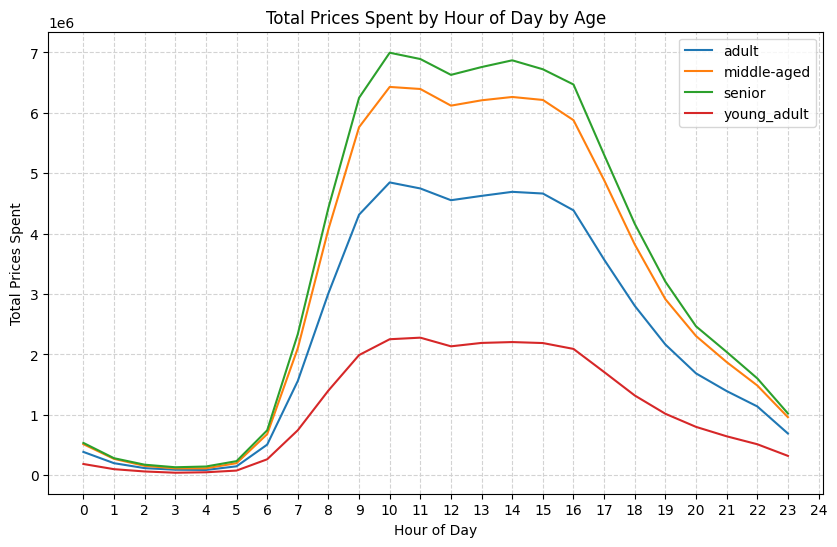

In [ ]:
# Group data by age and hour of day, and sum the prices
age_hour_prices = df.groupby(['age_group','order_hour_of_day'])['prices'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))

# Iterate through unique age
for age in age_hour_prices['age_group'].unique():
    # Filter data for the current age group
    age_data = age_hour_prices[age_hour_prices['age_group'] == age]
    # Plot the line for the current age group
    plt.plot(age_data['order_hour_of_day'], age_data['prices'], label=f'{age}', linewidth=1.5)

# Customizing chart formatting
plt.title('Total Prices Spent by Hour of Day by Age')
plt.xlabel('Hour of Day')
plt.ylabel('Total Prices Spent')
plt.legend()
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')
plt.xticks(np.arange(0,25,1),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,25,1)])

# Export the chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '10d_total_expenditure_HOD_by_age_line.png' ), dpi=300 , bbox_inches='tight')

#### *10e. Total expenditure on the HOD by income - Line*

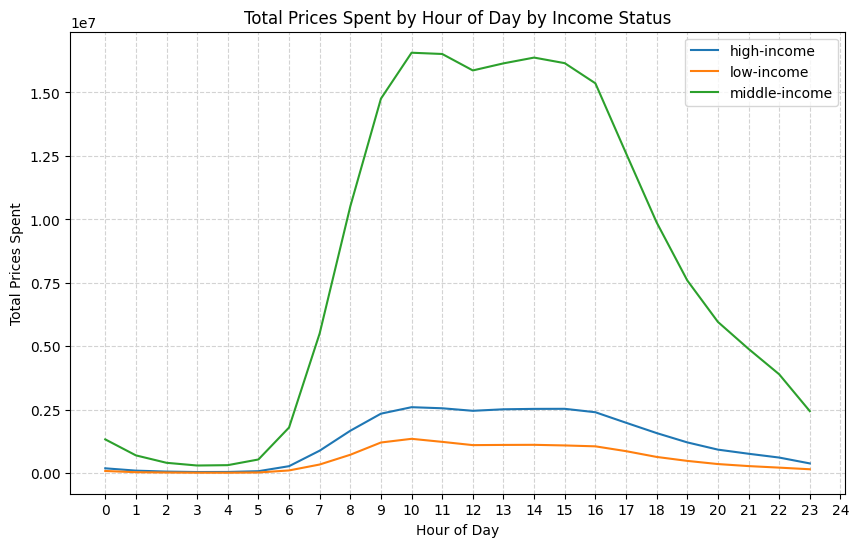

In [ ]:
# Group data by income and hour of day, and sum the prices
income_hour_prices = df.groupby(['income_group','order_hour_of_day'])['prices'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))

# Iterate through unique age
for income in income_hour_prices['income_group'].unique():
    # Filter data for the current income group
    income_data = income_hour_prices[income_hour_prices['income_group'] == income]
    # Plot the line for the current age group
    plt.plot(income_data['order_hour_of_day'], income_data['prices'], label=f'{income}')

# Customizing chart formatting
plt.title('Total Prices Spent by Hour of Day by Income Status')
plt.xlabel('Hour of Day')
plt.ylabel('Total Prices Spent')
plt.legend()
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')
plt.xticks(np.arange(0,25,1),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,25,1)])

# Export the chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '10e_total_expenditure_HOD_by_income_line.png' ), dpi=300 , bbox_inches='tight')

#### *10f. Total expenditure on the HOD by family - Line*

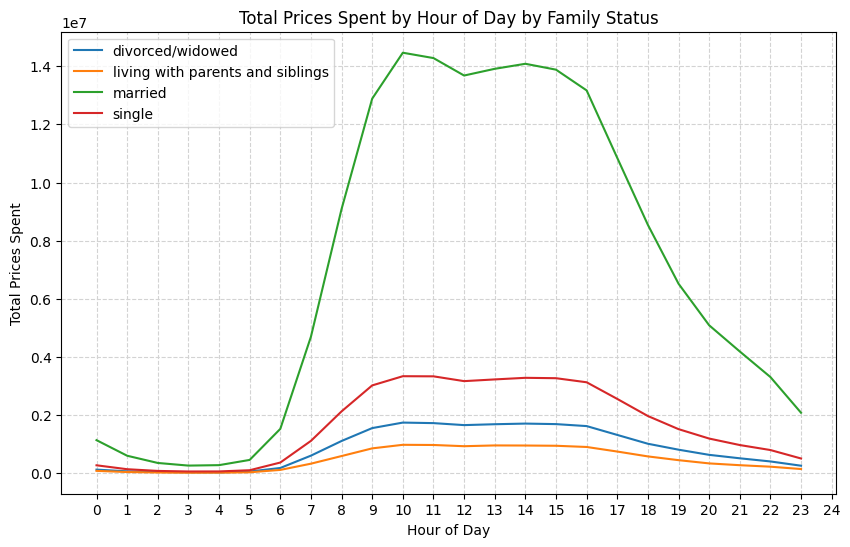

In [ ]:
# Group data by marital and hour of day, and sum the prices
family_hour_prices = df.groupby(['marital_status','order_hour_of_day'])['prices'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))

# Iterate through unique age
for family in family_hour_prices['marital_status'].unique():
    # Filter data for the current income group
    family_data = family_hour_prices[family_hour_prices['marital_status'] == family]
    # Plot the line for the current age group
    plt.plot(family_data['order_hour_of_day'], family_data['prices'], label=f'{family}')

# Customizing chart formatting
plt.title('Total Prices Spent by Hour of Day by Family Status')
plt.xlabel('Hour of Day')
plt.ylabel('Total Prices Spent')
plt.legend()
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')
plt.xticks(np.arange(0,25,1),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,25,1)])

# Export the chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '10f_total_expenditure_HOD_by_marital_line.png' ), dpi=300 , bbox_inches='tight')

#### *10g. Total expenditure on the HOD by dependant status - Line*

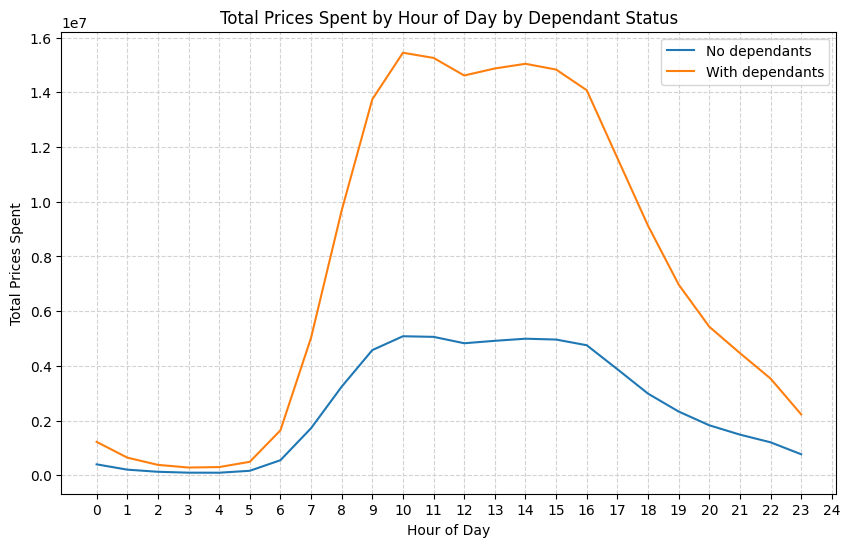

In [ ]:
# Group data by dependant and hour of day, and sum the prices
dependant_hour_prices = df.groupby(['dependants_flag','order_hour_of_day'])['prices'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))

# Iterate through unique age
for dependant in dependant_hour_prices['dependants_flag'].unique():
    # Filter data for the current income group
    dependant_data = dependant_hour_prices[dependant_hour_prices['dependants_flag'] == dependant]
    # Plot the line for the current age group
    plt.plot(dependant_data['order_hour_of_day'], dependant_data['prices'], label=f'{dependant}')

# Customizing chart formatting
plt.title('Total Prices Spent by Hour of Day by Dependant Status')
plt.xlabel('Hour of Day')
plt.ylabel('Total Prices Spent')
plt.legend()
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')
plt.xticks(np.arange(0,25,1),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,25,1)])

# Export the chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '10g_total_expenditure_HOD_by_dependant_line.png' ), dpi=300 , bbox_inches='tight')

#### *10h. Total expenditure on the HOD by consumer type - Line*

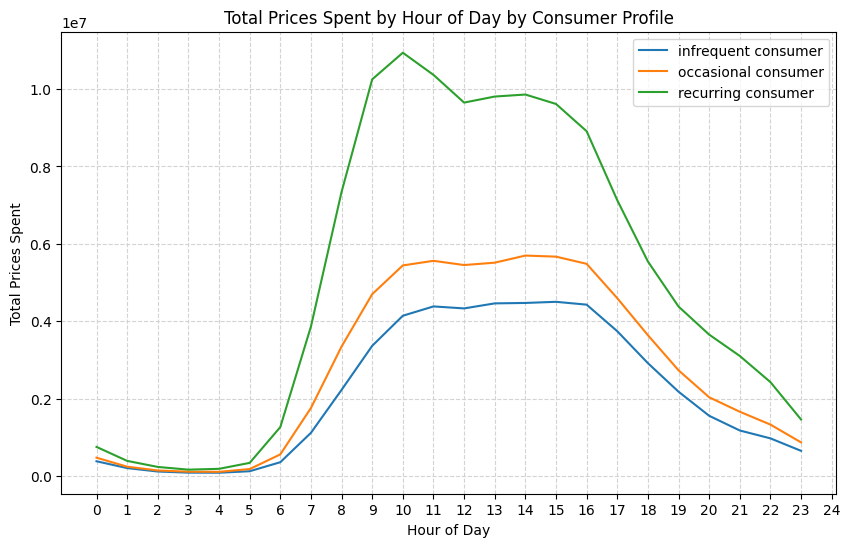

In [ ]:
# Group data by dependant and hour of day, and sum the prices
consumer_hour_prices = df.groupby(['consumer_type','order_hour_of_day'])['prices'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))

# Iterate through unique age
for consumer in consumer_hour_prices['consumer_type'].unique():
    # Filter data for the current income group
    consumer_data = consumer_hour_prices[consumer_hour_prices['consumer_type'] == consumer]
    # Plot the line for the current age group
    plt.plot(consumer_data['order_hour_of_day'], consumer_data['prices'], label=f'{consumer}')

# Customizing chart formatting
plt.title('Total Prices Spent by Hour of Day by Consumer Profile')
plt.xlabel('Hour of Day')
plt.ylabel('Total Prices Spent')
plt.legend()
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')
plt.xticks(np.arange(0,25,1),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,25,1)])

# Export the chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '10h_total_expenditure_HOD_by_consumer_line.png' ), dpi=300 , bbox_inches='tight')

#### *10i. HOD vs product price range - Bar*

<Figure size 1500x1000 with 0 Axes>

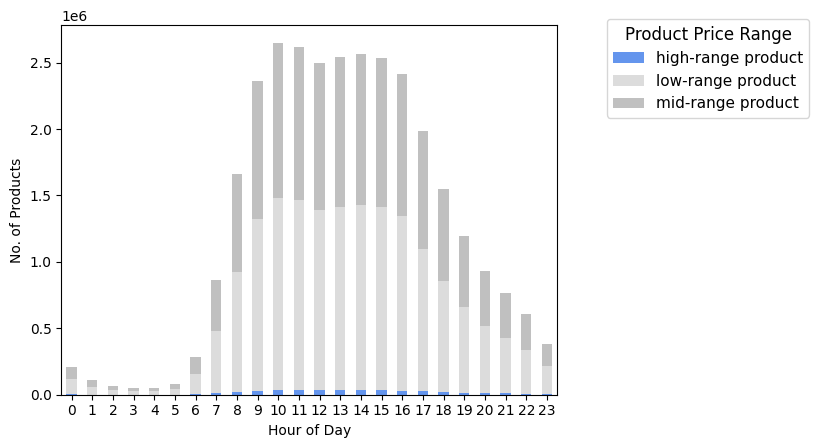

In [ ]:
# Plot a bar with crosstab

plt.figure(figsize=(15,10))
order_hod_price_range_cross = pd.crosstab(df['order_hour_of_day'] , df['price_range'], dropna = False).plot.bar(
    stacked=True, color= ['cornflowerblue','gainsboro','silver'])

# Setting up legend
leg = plt.legend(loc=(1.1,0.75),title='Product Price Range',title_fontsize=12,fontsize=11)
for text in leg.get_texts():
    text.set_color('black')

# Formatting
plt.xlabel('Hour of Day')
plt.xticks(rotation=0)
plt.ylabel('No. of Products')


# Export the figure
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '10i_hour_price_range_bar.png'), dpi=300 , bbox_inches='tight')

#### *10j. Total expenditure HOD by loyalty - Line*

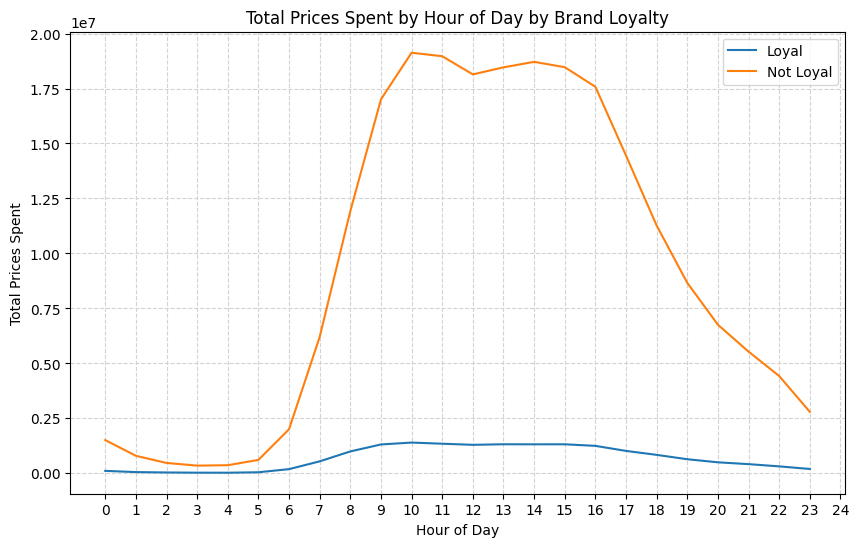

In [ ]:
# Group data by dependant and hour of day, and sum the prices
loyalty_hour_prices = df.groupby(['loyalty_flag','order_hour_of_day'])['prices'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))

# Iterate through unique loyalty flag
for loyalty in loyalty_hour_prices['loyalty_flag'].unique():
    # Filter data for the current income group
    loyalty_data = loyalty_hour_prices[loyalty_hour_prices['loyalty_flag'] == loyalty]
    # Plot the line for the current age group
    plt.plot(loyalty_data['order_hour_of_day'], loyalty_data['prices'], label=f'{loyalty}')

# Customizing chart formatting
plt.title('Total Prices Spent by Hour of Day by Brand Loyalty')
plt.xlabel('Hour of Day')
plt.ylabel('Total Prices Spent')
plt.legend()
plt.gca().set_axisbelow(True)
plt.grid(axis='both', color='lightgray', linestyle='dashed')
plt.xticks(np.arange(0,25,1),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,25,1)])

# Export the chart
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10', '10j_total_expenditure_HOD_by_loyalty_line.png' ), dpi=300 , bbox_inches='tight')

### 11.Age group and income status - scatterplots

#### *11a. Age group vs income status - scatterplots*

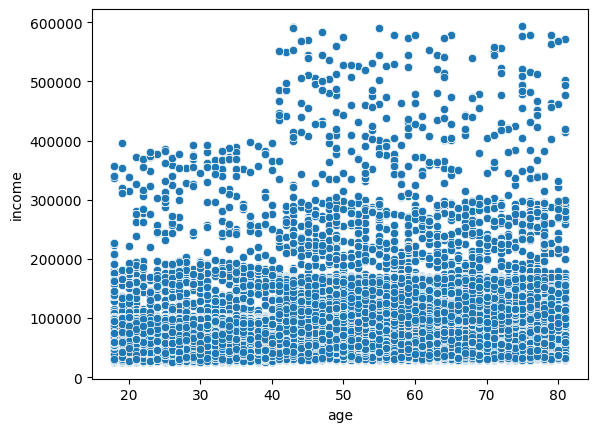

In [ ]:
# Set up color palette
colors = ['lightseagreen','goldenrod','cornflowerblue','lightcoral','yellowgreen','peachpuff']

# Create a scatterpot
scatterplot = sns.scatterplot(x = 'age' , y = 'income', data = df)

# Export the plot
plt.savefig(os.path.join(
    path,'04 Analysis','Visualizations','4.10', '11a_age_income_scatter.png'), dpi=300, bbox_inches='tight')


### 12.Price distribution - Histogram

<Axes: ylabel='Frequency'>

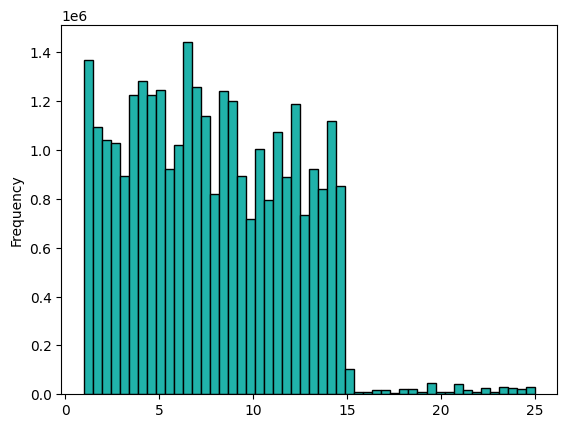

In [ ]:
# Set up color palette
colors = ['lightseagreen','goldenrod','cornflowerblue','lightcoral','yellowgreen','peachpuff']

df['prices'].plot.hist(bins=50, edgecolor='black',color=colors)

### 13.For brand loyalty

#### *13a. Spender type distribution - Pie*

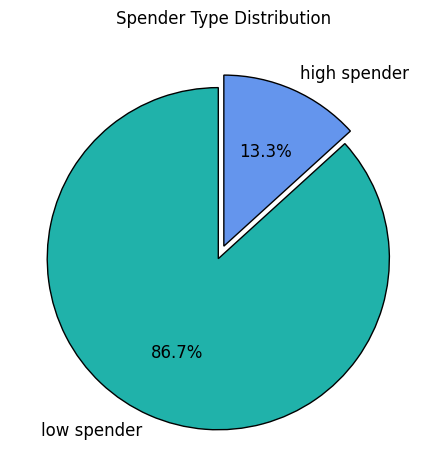

In [ ]:
# Set up color palette
colors = ['lightseagreen','cornflowerblue','yellowgreen','peachpuff']
explode = [0.08, 0 ]

# Plot a pie
price_range_distribution_pie = df['spender_type'].value_counts(dropna=False).plot.pie(
    autopct='%1.1f%%', wedgeprops={'edgecolor':'black'},
    explode = explode,
    startangle=90,fontsize=12, colors=colors)

# Formatting
plt.ylabel('')
plt.title('Spender Type Distribution')
plt.tight_layout()

# Export the chart
price_range_distribution_pie.figure.savefig(os.path.join(
    path, '04 Analysis','Visualizations', '4.10', '13a_spender_type_distribution_pie.png'), dpi=300 , bbox_inches='tight')

#### *13b. loyalty distribution- Pie*

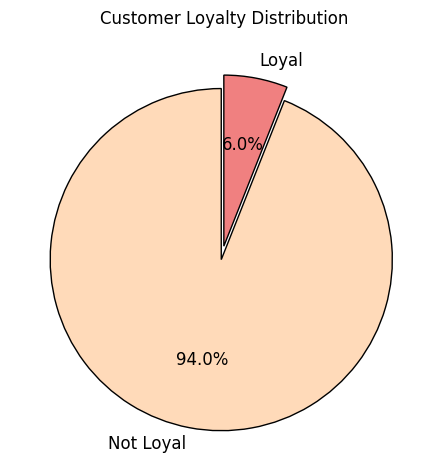

In [ ]:
# Set up color palette
colors = ['peachpuff','lightcoral','lightseagreen','cornflowerblue','yellowgreen']
explode = [0.08, 0 ]

# Plot a pie
loyalty_distribution_pie = df['loyalty_flag'].value_counts(dropna=False).plot.pie(
    autopct='%1.1f%%', wedgeprops={'edgecolor':'black'},
    explode = explode,
    startangle=90,fontsize=12, colors=colors)

# Formatting
plt.ylabel('')
plt.title('Customer Loyalty Distribution')
plt.tight_layout()

# Export the chart
loyalty_distribution_pie.figure.savefig(os.path.join(
    path, '04 Analysis','Visualizations', '4.10', '13b_loyalty_distribution_pie.png'), dpi=300 , bbox_inches='tight')

#### 13c. Order frequency vs loyalty -Bar*

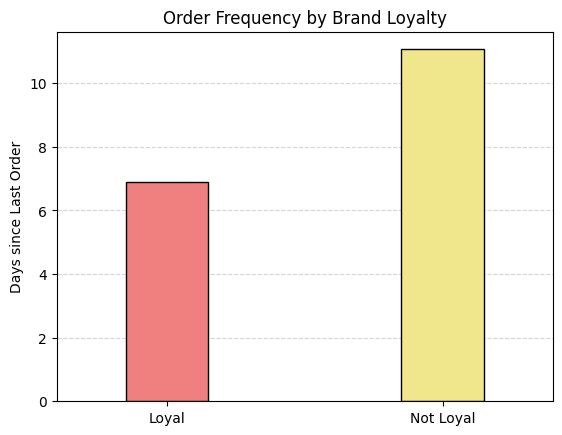

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
loyalty_avg_usage_bar =df.groupby('loyalty_flag')['days_since_last_order'].mean().plot.bar(
    edgecolor='black',legend=False,width=0.3,color=colors)

# Formatting
plt.title('Order Frequency by Brand Loyalty')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Days since Last Order')

plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'lightgray', linestyle = 'dashed')

# Export the bar
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '13c_order_frequency_by_loyalty_bar.png'), dpi=300 , bbox_inches='tight')

#### *13d. Average expenditure vs loyalty - Bar*

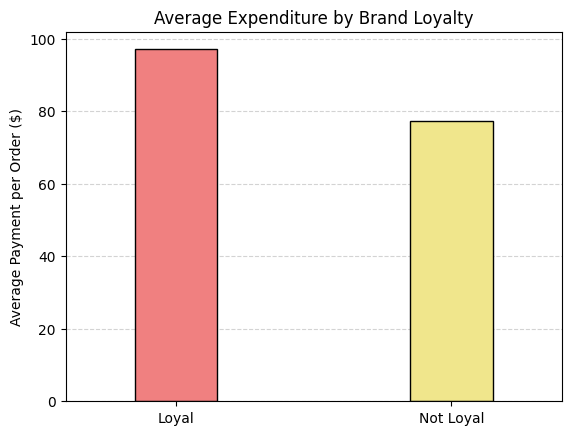

In [ ]:
# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
loyalty_avg_expense = cus_profile.groupby(['loyalty_flag'])['payment_per_order'].mean()
loyalty_avg_expense.plot.bar(edgecolor='black',width=0.3, color=colors)


# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Formatting
plt.title('Average Expenditure by Brand Loyalty')
plt.ylabel('Average Payment per Order ($)')
plt.xlabel('',weight='black')
plt.xticks(rotation=0)
plt.yticks(fontsize=10)

# Export the bar chart

plt.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , '4.10', '13d_avg_expense_by_loyalty.png') , dpi=300, bbox_inches='tight')

#### *13e. Order volume distribution - Pie*

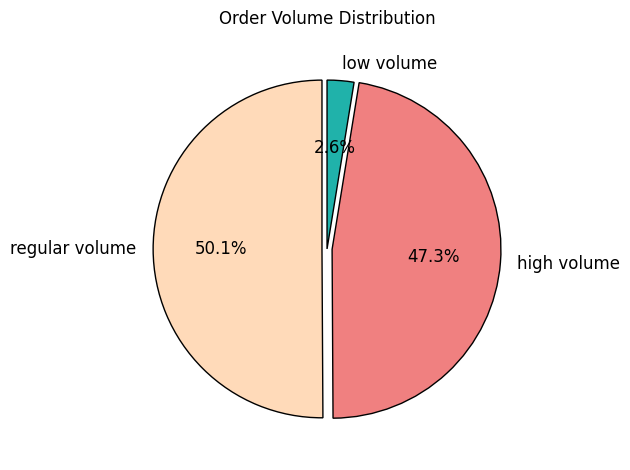

In [ ]:
# Set up color palette
colors = ['peachpuff','lightcoral','lightseagreen','cornflowerblue','yellowgreen']
explode = [0.03 ,0.03, 0]

# Plot a pie
order_volume_distribution_pie = df['order_volume_flag'].value_counts(dropna=False).plot.pie(
    autopct='%1.1f%%', wedgeprops={'edgecolor':'black'},
    explode = explode,
    startangle=90,fontsize=12, colors=colors)

# Formatting
plt.ylabel('')
plt.title('Order Volume Distribution',pad=10)
plt.tight_layout()

# Export the chart
order_volume_distribution_pie.figure.savefig(os.path.join(
    path, '04 Analysis','Visualizations', '4.10', '13e_order_volume_distribution_pie.png'), dpi=300 , bbox_inches='tight')

#### *13f. Top 3 department for loyal customer - Bar*

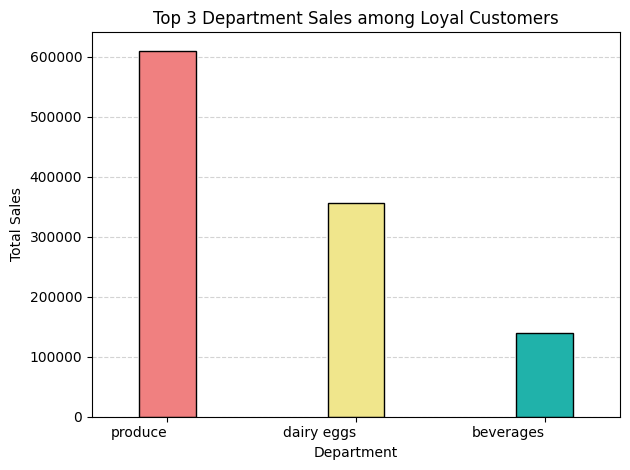

In [ ]:
# Filter loyal customer
loyal_customers = df[df['loyalty_flag'] == 'Loyal']

# Count department sales
department_sales = loyal_customers['department'].value_counts(ascending=False).head(3)

# Set up color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']

# Plot a bar
department_sales.plot.bar(
    edgecolor='black',legend=False,width=0.3,color=colors)

# Set up a grid behind the bars
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')

# Formatting
plt.title('Top 3 Department Sales among Loyal Customers')
plt.xlabel('Department')
plt.ylabel('Total Sales')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Export the figure
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '13f_top_3_department_sales_in_loyal.png'), dpi=300 , bbox_inches='tight')

#### *13g. Loyal customer distribution by region - Pie*

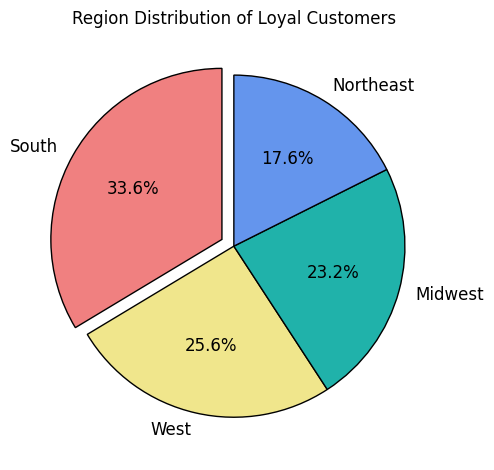

In [ ]:
# Set color palette
colors = ['lightcoral','khaki','lightseagreen','cornflowerblue','yellowgreen','peachpuff']
explode = [0.08, 0 , 0, 0 ]

# Plot a pie
loyal_customers['region'].value_counts(dropna=False).plot.pie(
    autopct='%1.1f%%', wedgeprops={'edgecolor':'black'},
    explode = explode,
    startangle=90,fontsize=12, colors=colors)

# Formatting
plt.ylabel('')
plt.title('Region Distribution of Loyal Customers')
plt.tight_layout()

# Export the chart
plt.savefig(os.path.join(
    path, '04 Analysis','Visualizations', '4.10', '13g_region_distribution_in_loyal.png'), dpi=300 , bbox_inches='tight')

### 14.Total expenditure by

#### *14a. Total expenditure by age and depend - Bar*

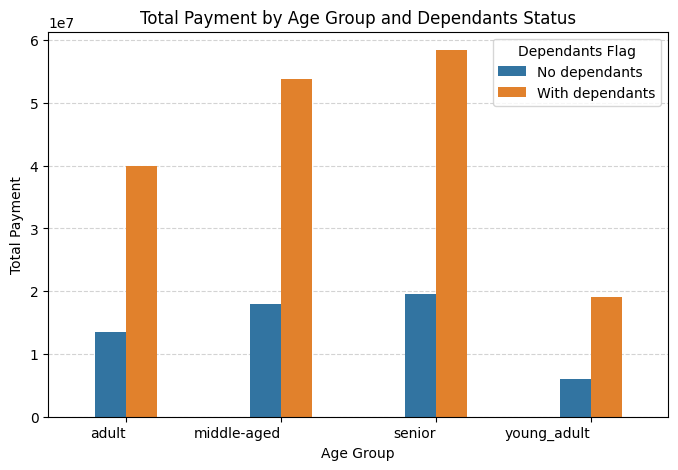

In [ ]:

# Group data by age_group and dependants_flag and calculate the total payment per order
age_dependants_payment = cus_profile.groupby(['age_group', 'dependants_flag'])['payment_per_order'].sum().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='age_group', y='payment_per_order', hue='dependants_flag', data=age_dependants_payment, width=0.4)

# Customize the chart
plt.title('Total Payment by Age Group and Dependants Status')
plt.xlabel('Age Group')
plt.ylabel('Total Payment')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Dependants Flag')
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y', color = 'lightgray', linestyle = 'dashed')

# Export the plot
plt.savefig(os.path.join(
    path, '04 Analysis' , 'Visualizations' , '4.10' , '14a_total_payment_by_age_dependants.png'), dpi=300 , bbox_inches='tight')